In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("datos_finales.csv")

In [3]:
df

Estación   Año  Mes  Dia  Hora  Dióxido de Azufre  \
0               4  2013    7    1   1.0                5.0   
1               4  2013    7    1   2.0                5.0   
2               4  2013    7    1   3.0                4.0   
3               4  2013    7    1   4.0                3.0   
4               4  2013    7    1   5.0                3.0   
...           ...   ...  ...  ...   ...                ...   
2319499        60  2024   12   31  20.0                0.0   
2319500        60  2024   12   31  21.0                0.0   
2319501        60  2024   12   31  22.0                0.0   
2319502        60  2024   12   31  23.0                0.0   
2319503        60  2024   12   31  24.0                0.0   

         Monóxido de Carbono  Monóxido de Nitrógeno  Dióxido de Nitrógeno  \
0                        0.5                   48.0                 112.0   
1                        0.6                   79.0                 116.0   
2                        0.3                    6.0                  47.0   
3                        0.2                    3.0                  25.0   
4                        0.2                    3.0                  10.0   
...                      ...                    ...                   ...   
2319499                  0.0                   16.0                  65.0   
2319500                  0.0                   33.0                  77.0   
2319501                  0.0                   29.0                  68.0   
2319502                  0.0                    7.0                  47.0   
2319503                  0.0                    3.0                  36.0   

         Partículas<2.5  ...  HidrocarburosNoMet  Temperatura  PuntoRocio  \
0                   0.0  ...                 0.0        16.99        7.98   
1                   0.0  ...                 0.0        15.90        7.93   
2                   0.0  ...                 0.0        15.09        7.93   
3                   0.0  ...                 0.0        14.45        8.01   
4                   0.0  ...                 0.0        15.28        8.31   
...                 ...  ...                 ...          ...         ...   
2319499             0.0  ...                 0.0         2.58       -1.86   
2319500             0.0  ...                 0.0         1.92       -2.30   
2319501             0.0  ...                 0.0         1.45       -2.50   
2319502             0.0  ...                 0.0         1.00       -2.44   
2319503             0.0  ...                 0.0         1.00       -2.44   

         TempHumeda  HumedadRelativa  Precipitacion  Presion  VelViento  \
0             12.48            55.35            0.0    92.79       1.04   
1             11.92            59.08            0.0    92.78       1.11   
2             11.51            62.16            0.0    92.79       1.26   
3             11.23            65.06            0.0    92.81       1.48   
4             11.80            63.04            0.0    92.83       2.28   
...             ...              ...            ...      ...        ...   
2319499        0.36            72.42            0.0    93.83       1.26   
2319500       -0.19            73.36            0.0    93.85       1.28   
2319501       -0.52            74.79            0.0    93.88       1.26   
2319502       -0.72            77.49            0.0    93.90       1.26   
2319503       -0.72            77.49            0.0    93.90       1.26   

         DirViento  Intensidad  
0            118.0      374.25  
1            115.6      402.50  
2            107.6      243.00  
3            100.5      174.50  
4             97.3      187.25  
...            ...         ...  
2319499       26.4       54.50  
2319500       40.9       49.00  
2319501       54.7        9.75  
2319502       67.5       21.50  
2319503       67.5         NaN  

[2319504 rows x 28 columns]

In [5]:
df["Intensidad"] = df.groupby(["Estación","Hora"])['Intensidad'].transform(lambda x: x.fillna(x.mean()))

In [6]:
df["Intensidad2"] = df.Intensidad.shift(1)*0.85

In [7]:
df.loc[df["Hora"] == 24, "Intensidad"] = df.loc[df["Hora"] == 24, "Intensidad2"]

In [49]:
df = df.drop(columns="Intensidad2")

In [8]:
df.head(24)

Estación   Año  Mes  Dia  Hora  Dióxido de Azufre  Monóxido de Carbono  \
0          4  2013    7    1   1.0                5.0                  0.5   
1          4  2013    7    1   2.0                5.0                  0.6   
2          4  2013    7    1   3.0                4.0                  0.3   
3          4  2013    7    1   4.0                3.0                  0.2   
4          4  2013    7    1   5.0                3.0                  0.2   
5          4  2013    7    1   6.0                3.0                  0.2   
6          4  2013    7    1   7.0                3.0                  0.2   
7          4  2013    7    1   8.0                4.0                  0.3   
8          4  2013    7    1   9.0                5.0                  0.4   
9          4  2013    7    1  10.0                5.0                  0.4   
10         4  2013    7    1  11.0                5.0                  0.3   
11         4  2013    7    1  12.0                4.0                  0.3   
12         4  2013    7    1  13.0                4.0                  0.3   
13         4  2013    7    1  14.0                4.0                  0.2   
14         4  2013    7    1  15.0                4.0                  0.2   
15         4  2013    7    1  16.0                4.0                  0.3   
16         4  2013    7    1  17.0                3.0                  0.2   
17         4  2013    7    1  18.0                3.0                  0.3   
18         4  2013    7    1  19.0                4.0                  0.4   
19         4  2013    7    1  20.0                3.0                  0.3   
20         4  2013    7    1  21.0                3.0                  0.3   
21         4  2013    7    1  22.0                3.0                  0.4   
22         4  2013    7    1  23.0                3.0                  0.2   
23         4  2013    7    1  24.0                3.0                  0.2   

    Monóxido de Nitrógeno  Dióxido de Nitrógeno  Partículas<2.5  ...  \
0                    48.0                 112.0             0.0  ...   
1                    79.0                 116.0             0.0  ...   
2                     6.0                  47.0             0.0  ...   
3                     3.0                  25.0             0.0  ...   
4                     3.0                  10.0             0.0  ...   
5                     5.0                  13.0             0.0  ...   
6                     3.0                  19.0             0.0  ...   
7                    12.0                  50.0             0.0  ...   
8                    25.0                  64.0             0.0  ...   
9                    29.0                  65.0             0.0  ...   
10                   26.0                  57.0             0.0  ...   
11                   27.0                  57.0             0.0  ...   
12                   18.0                  45.0             0.0  ...   
13                   13.0                  42.0             0.0  ...   
14                    7.0                  30.0             0.0  ...   
15                   12.0                  40.0             0.0  ...   
16                    9.0                  32.0             0.0  ...   
17                   15.0                  42.0             0.0  ...   
18                   28.0                  72.0             0.0  ...   
19                   15.0                  61.0             0.0  ...   
20                    7.0                  45.0             0.0  ...   
21                   11.0                  60.0             0.0  ...   
22                    5.0                  30.0             0.0  ...   
23                    4.0                  21.0             0.0  ...   

    Temperatura  PuntoRocio  TempHumeda  HumedadRelativa  Precipitacion  \
0         16.99        7.98       12.48            55.35           0.00   
1         15.90        7.93       11.92            59.08           0.00   
2         15.09        7.93

In [15]:
df.groupby(["Estación"])["Intensidad"].apply(lambda x: x.isna().sum())

Estación
4     0
8     0
11    0
16    0
17    0
18    0
24    0
27    0
35    0
36    0
38    0
39    0
40    0
47    0
48    0
49    0
50    0
54    0
55    0
56    0
57    0
59    0
60    0
Name: Intensidad, dtype: int64

In [41]:
col_contaminantes = df.columns[5:19]

In [45]:
dic_contaminantes = {}
for estacion in df.Estación.unique():
    lista = []
    for col in col_contaminantes:
        if df[df.Estación==estacion][col].mean() != 0:
            lista.append(col)
        else:
            None
    dic_contaminantes[estacion]=lista

In [47]:
#Tras escoger las columnas de contaminantes en el dataframe y las estaciones, hago un bucle for para crear un diccionario en el que para cada estación
#Esten almacenados los contaminantes que mide
dic_contaminantes

{4: ['Dióxido de Azufre',
  'Monóxido de Carbono',
  'Monóxido de Nitrógeno',
  'Dióxido de Nitrógeno',
  'Óxidos de Nitrógeno'],
 8: ['Dióxido de Azufre',
  'Monóxido de Carbono',
  'Monóxido de Nitrógeno',
  'Dióxido de Nitrógeno',
  'Partículas<2.5',
  'Partículas<10',
  'Óxidos de Nitrógeno',
  'Ozono',
  'Tolueno',
  'Benceno',
  'Etilbenceno',
  'HidrocarburosTot',
  'Metano',
  'HidrocarburosNoMet'],
 11: ['Monóxido de Nitrógeno',
  'Dióxido de Nitrógeno',
  'Óxidos de Nitrógeno',
  'Tolueno',
  'Benceno',
  'Etilbenceno'],
 16: ['Monóxido de Carbono',
  'Monóxido de Nitrógeno',
  'Dióxido de Nitrógeno',
  'Óxidos de Nitrógeno',
  'Ozono'],
 17: ['Dióxido de Azufre',
  'Monóxido de Nitrógeno',
  'Dióxido de Nitrógeno',
  'Óxidos de Nitrógeno',
  'Ozono'],
 18: ['Dióxido de Azufre',
  'Monóxido de Carbono',
  'Monóxido de Nitrógeno',
  'Dióxido de Nitrógeno',
  'Partículas<10',
  'Óxidos de Nitrógeno',
  'Ozono',
  'Tolueno',
  'Benceno',
  'Etilbenceno'],
 24: ['Dióxido de Azufr

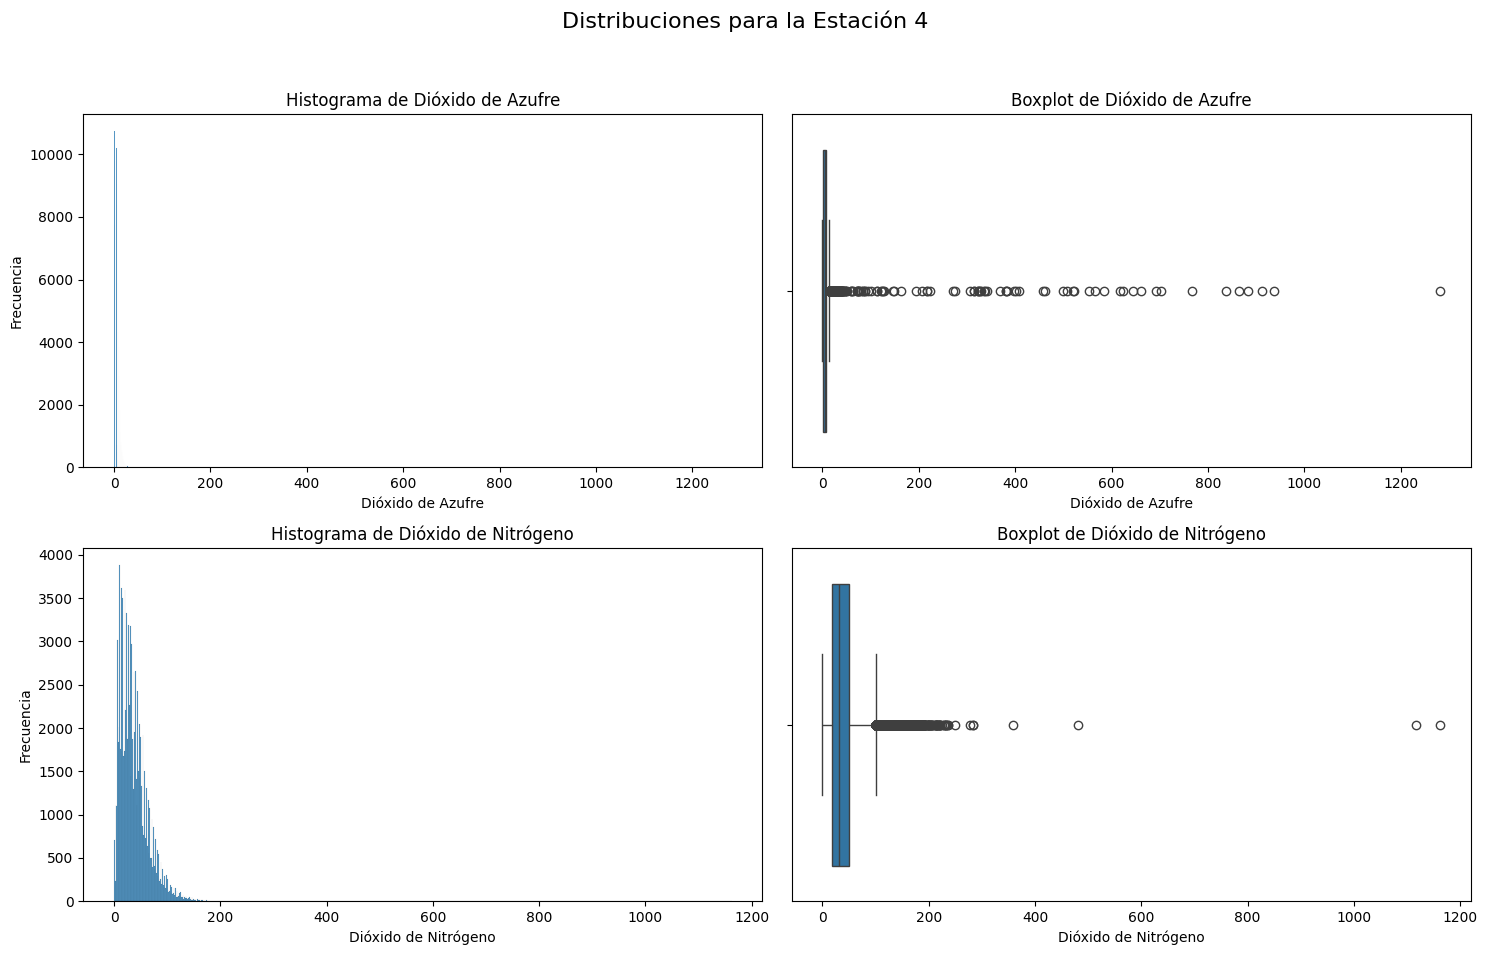

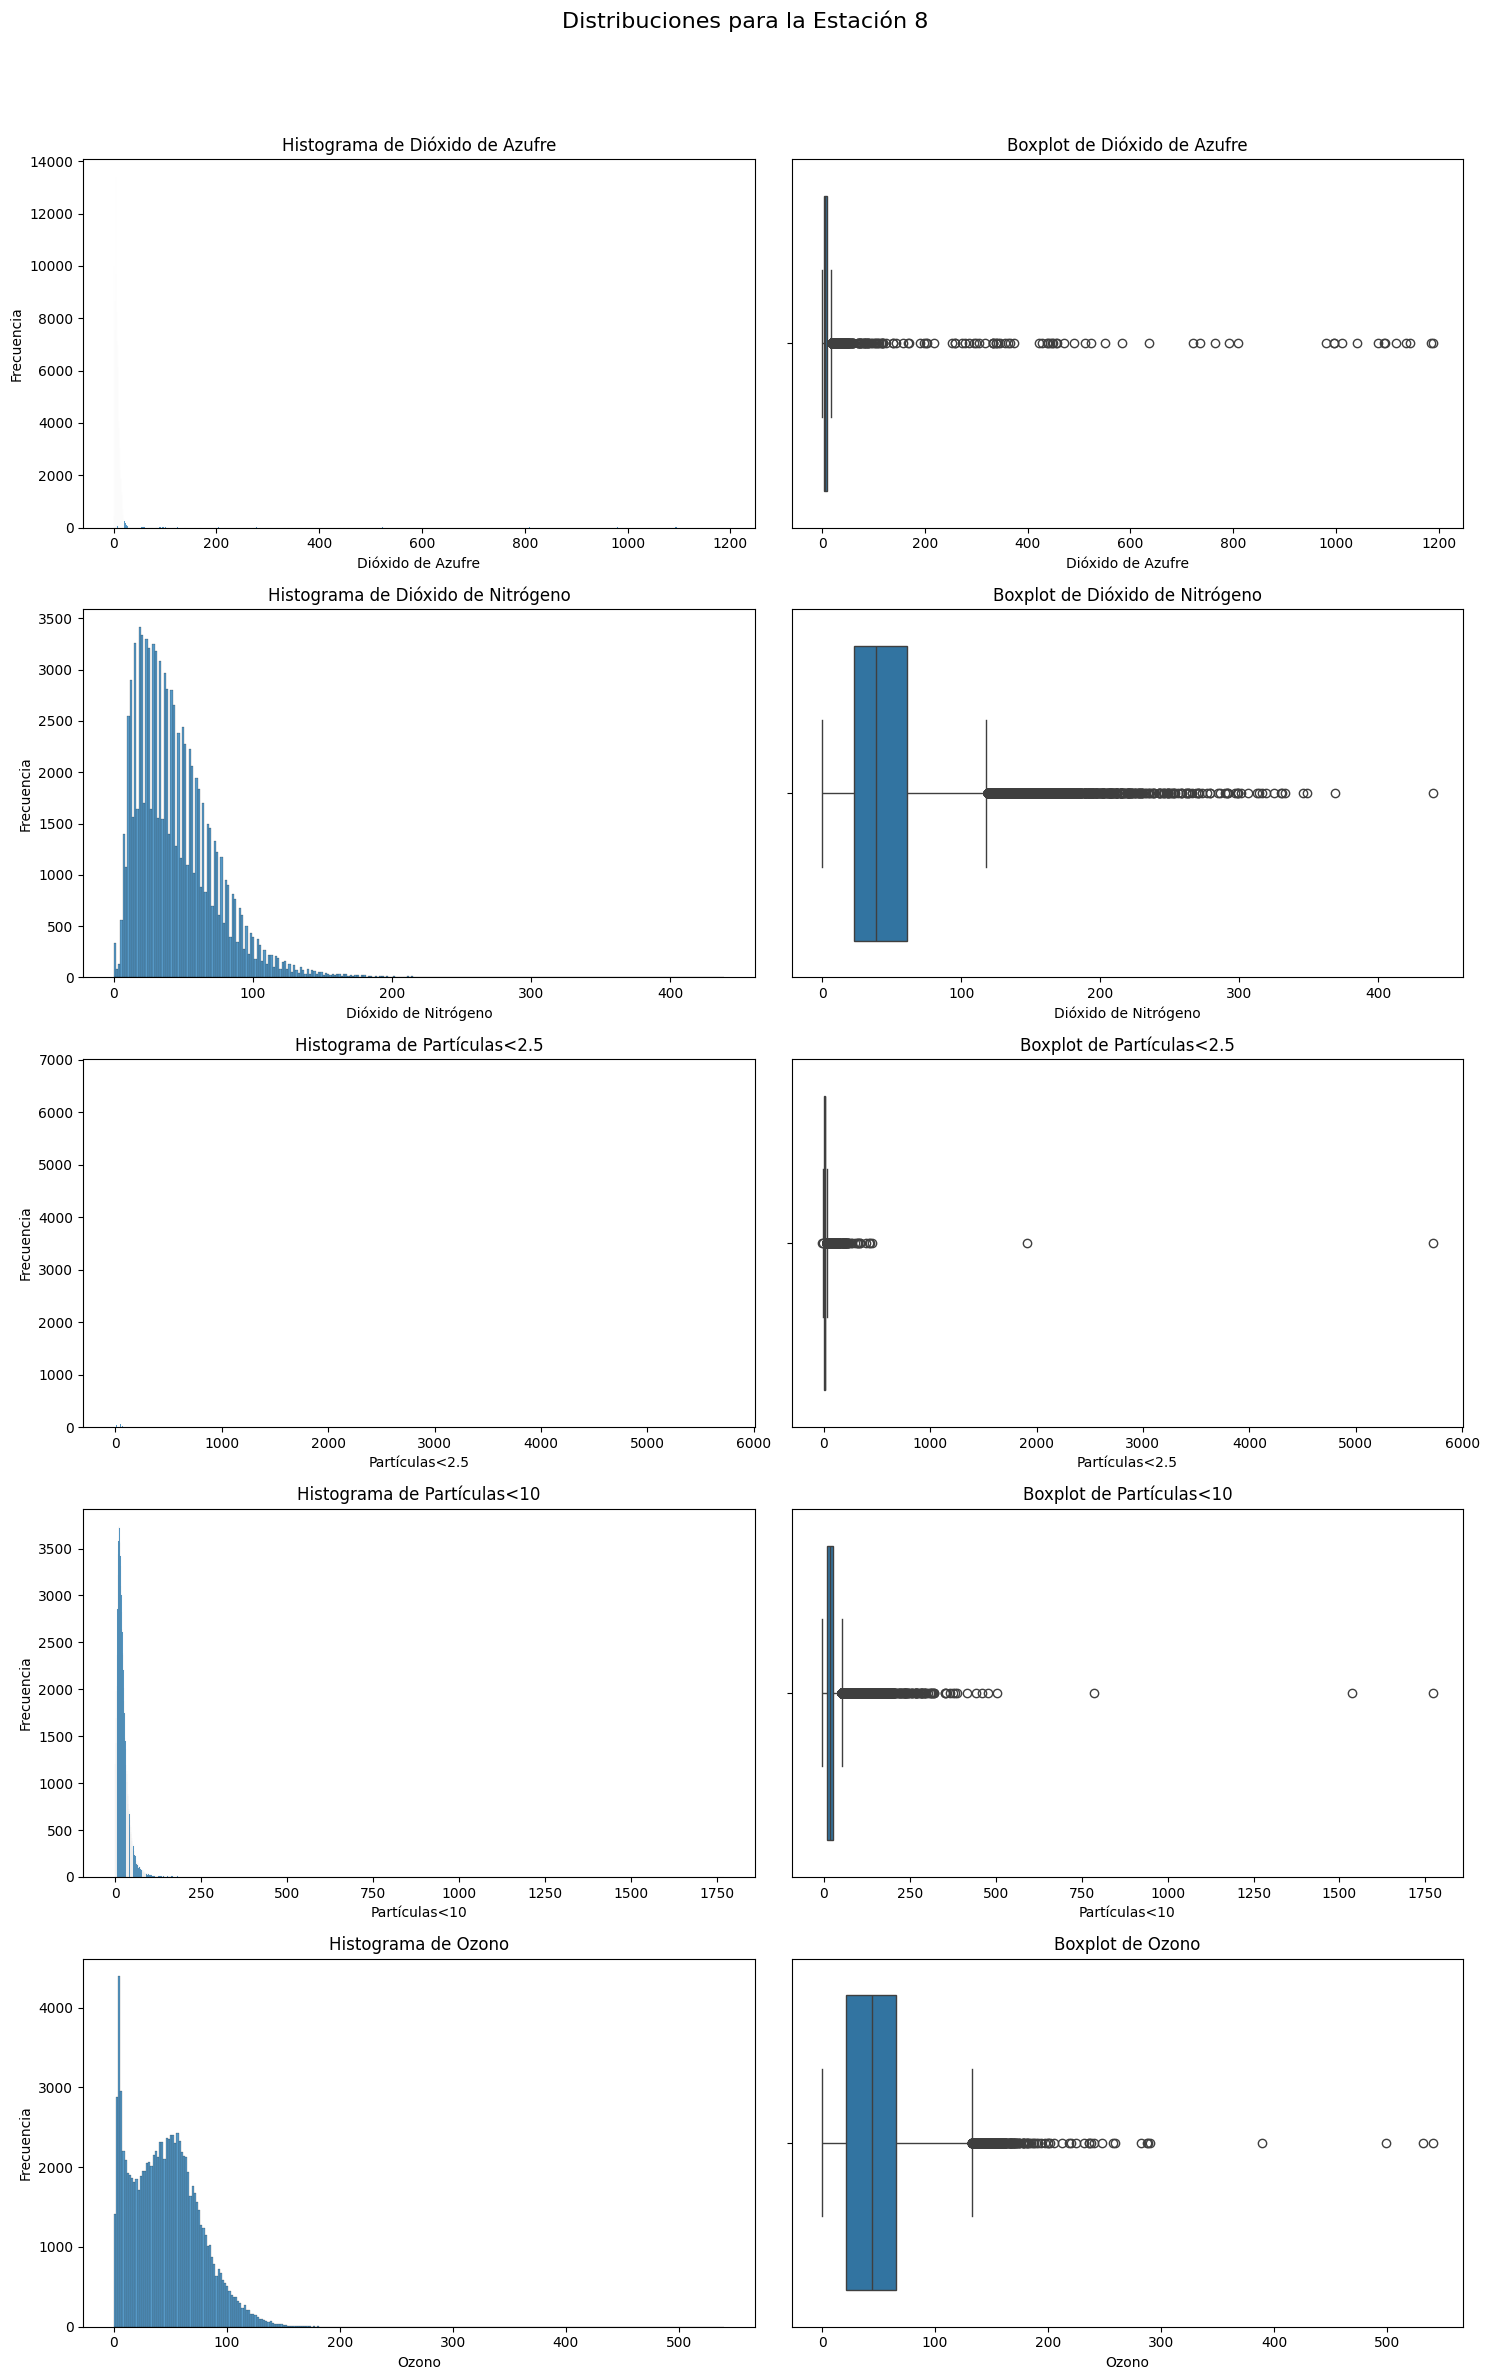

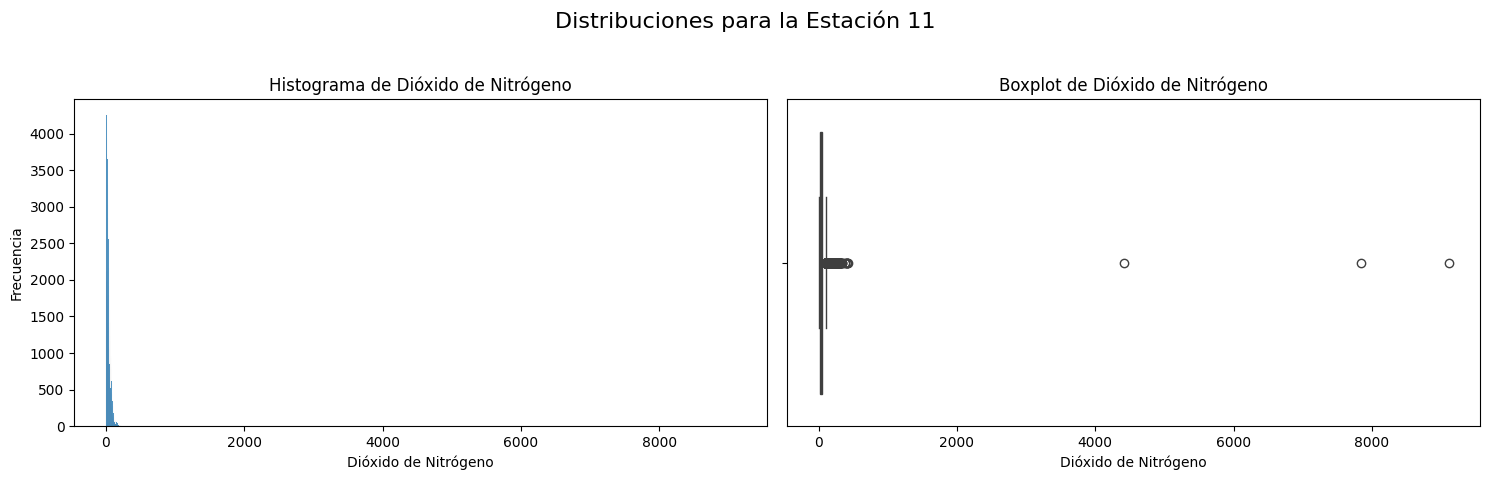

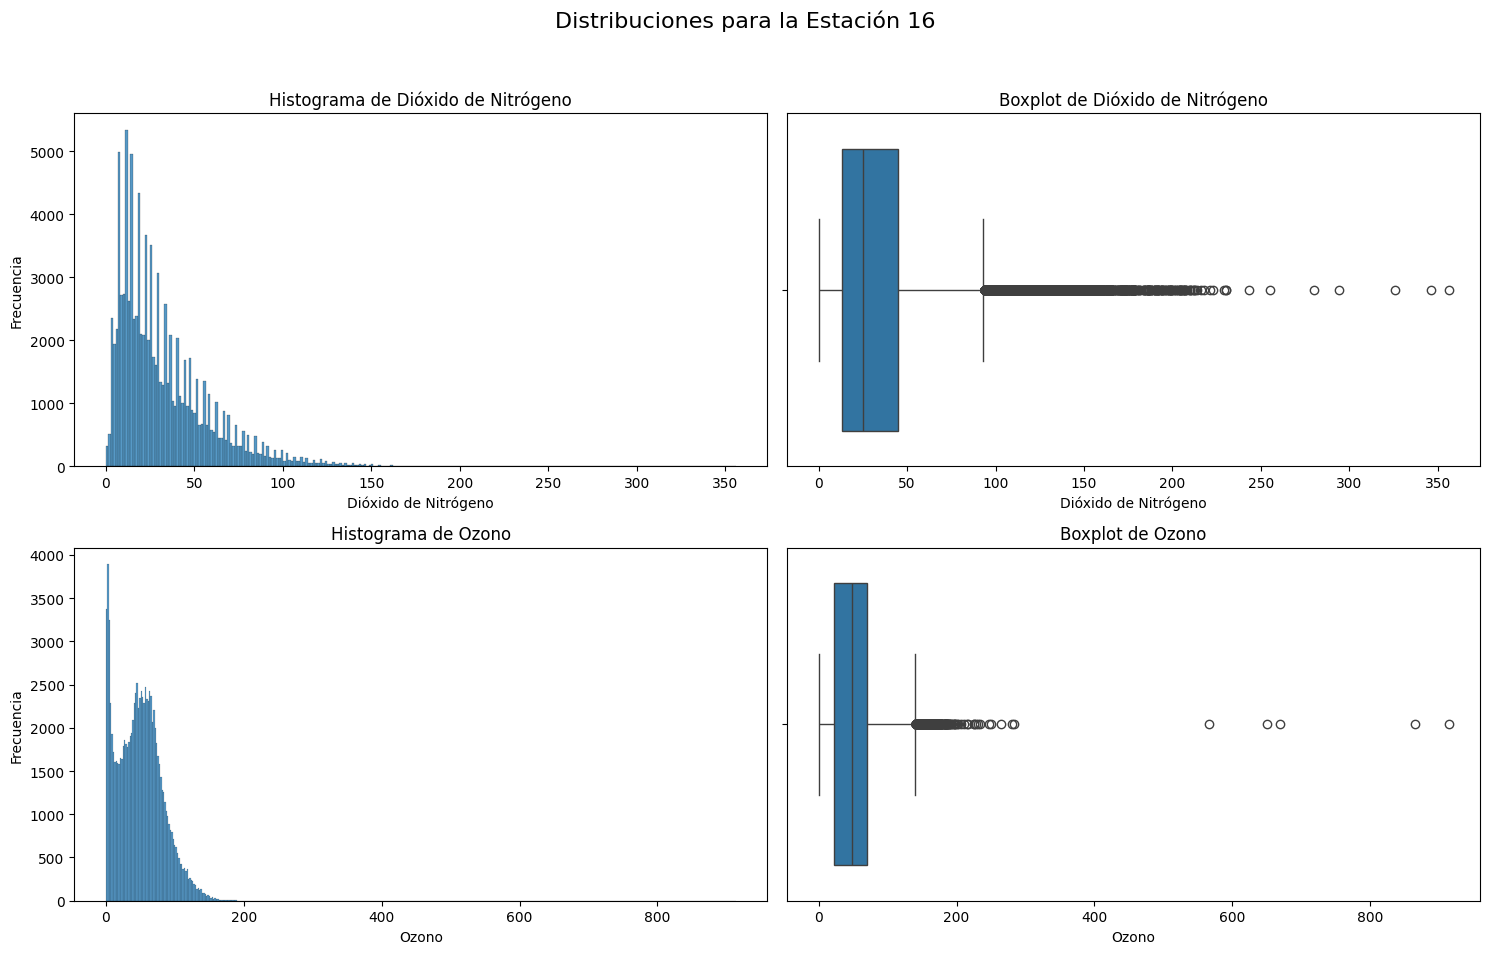

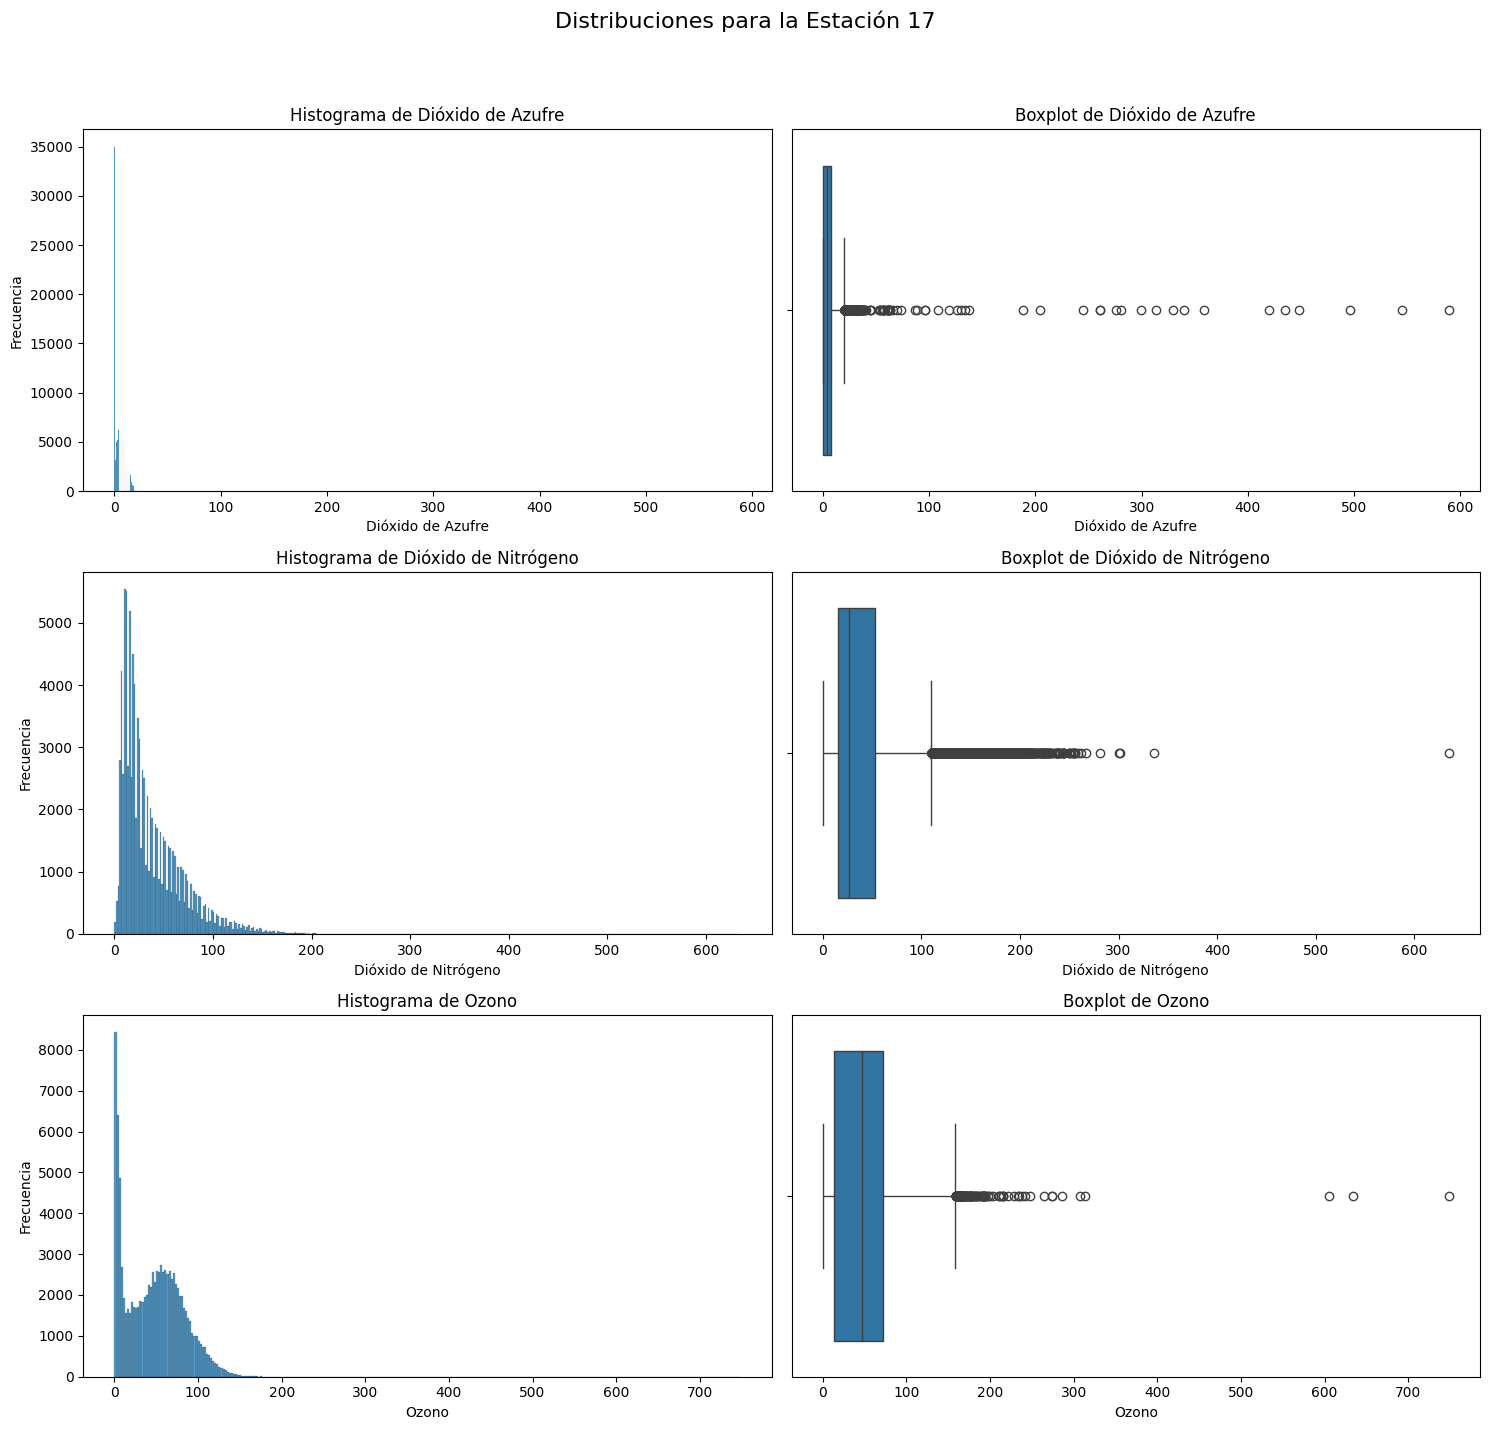

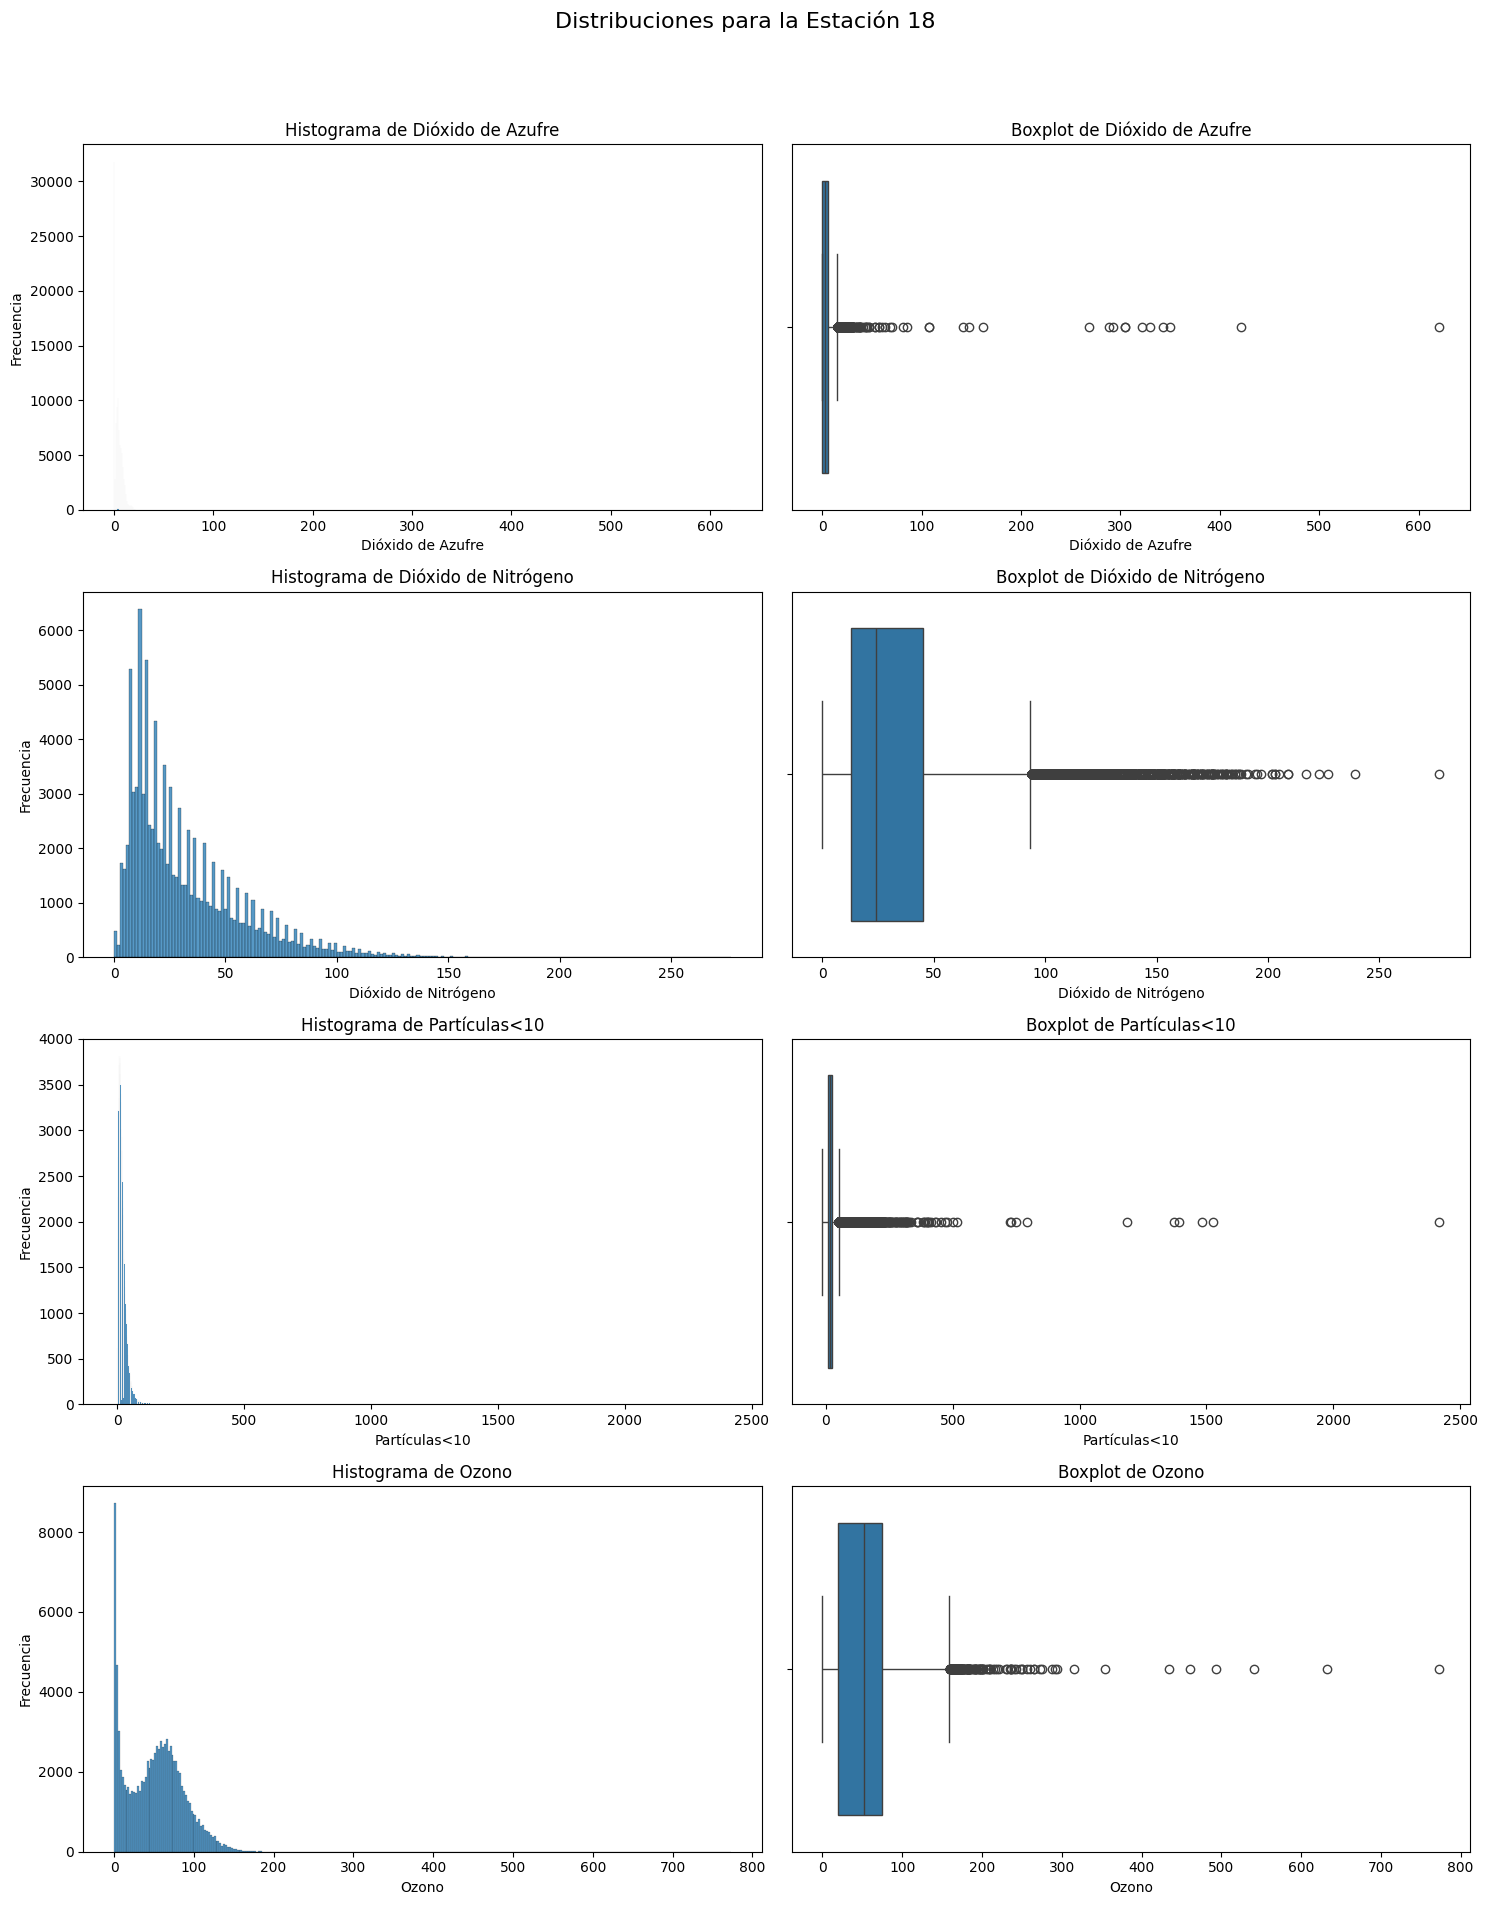

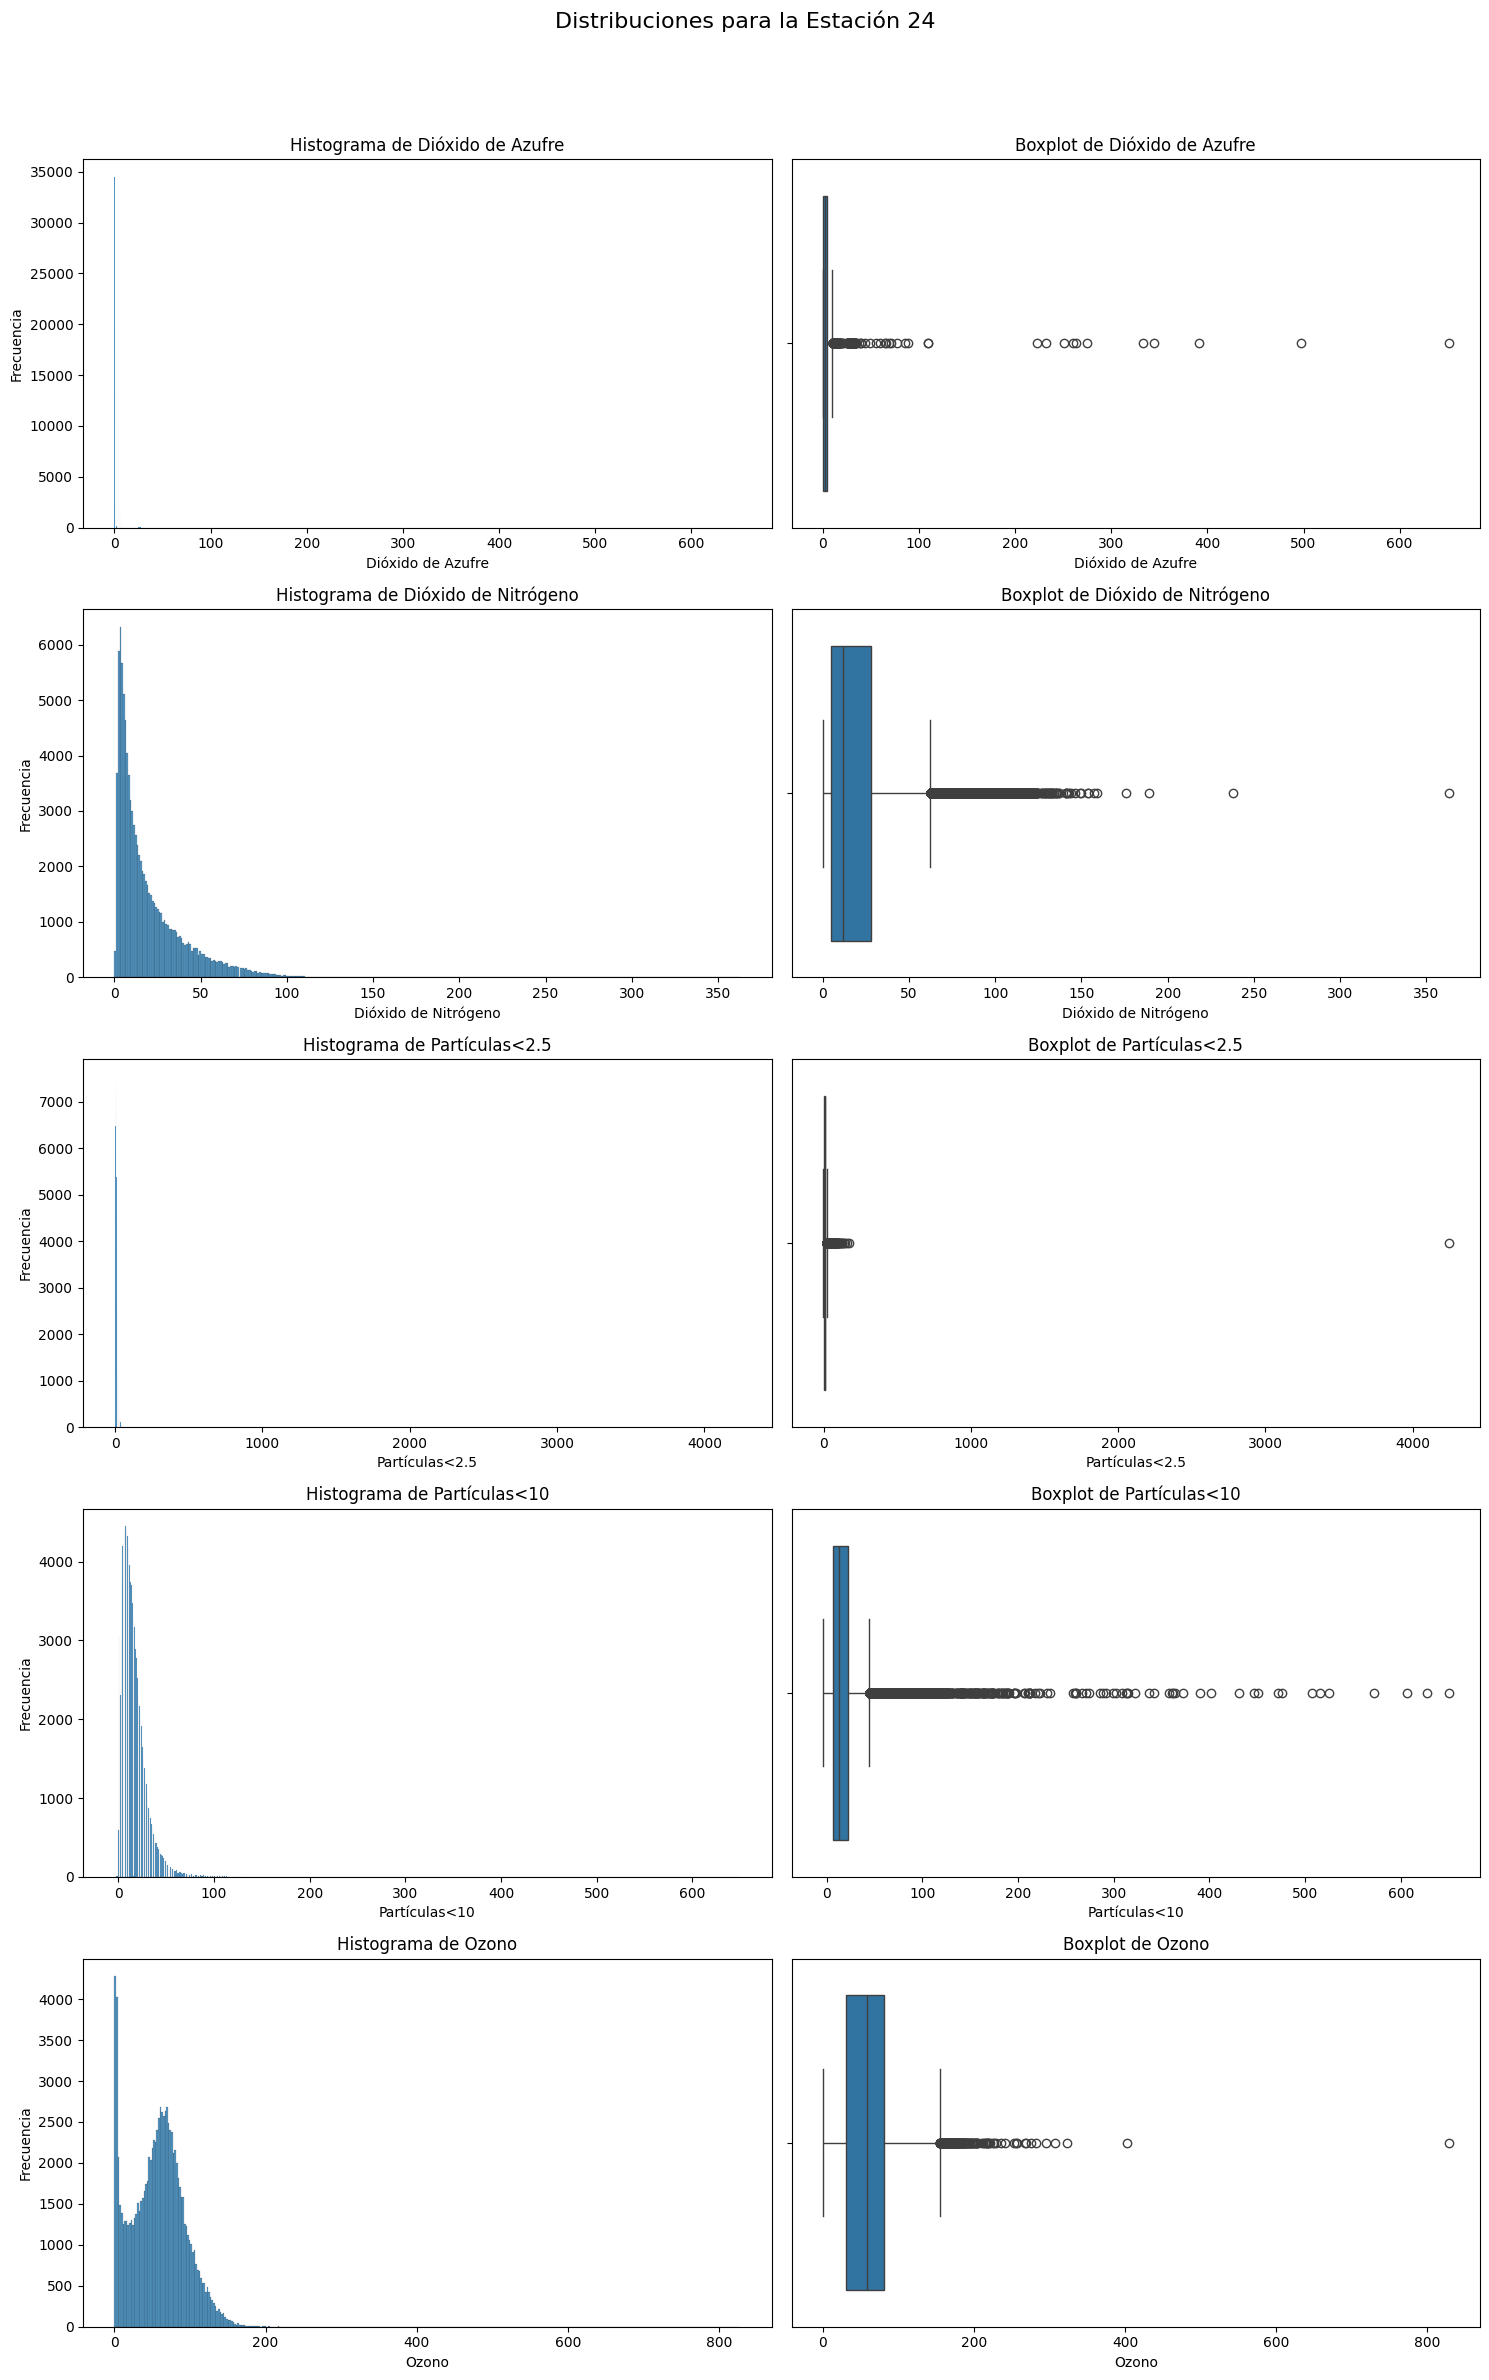

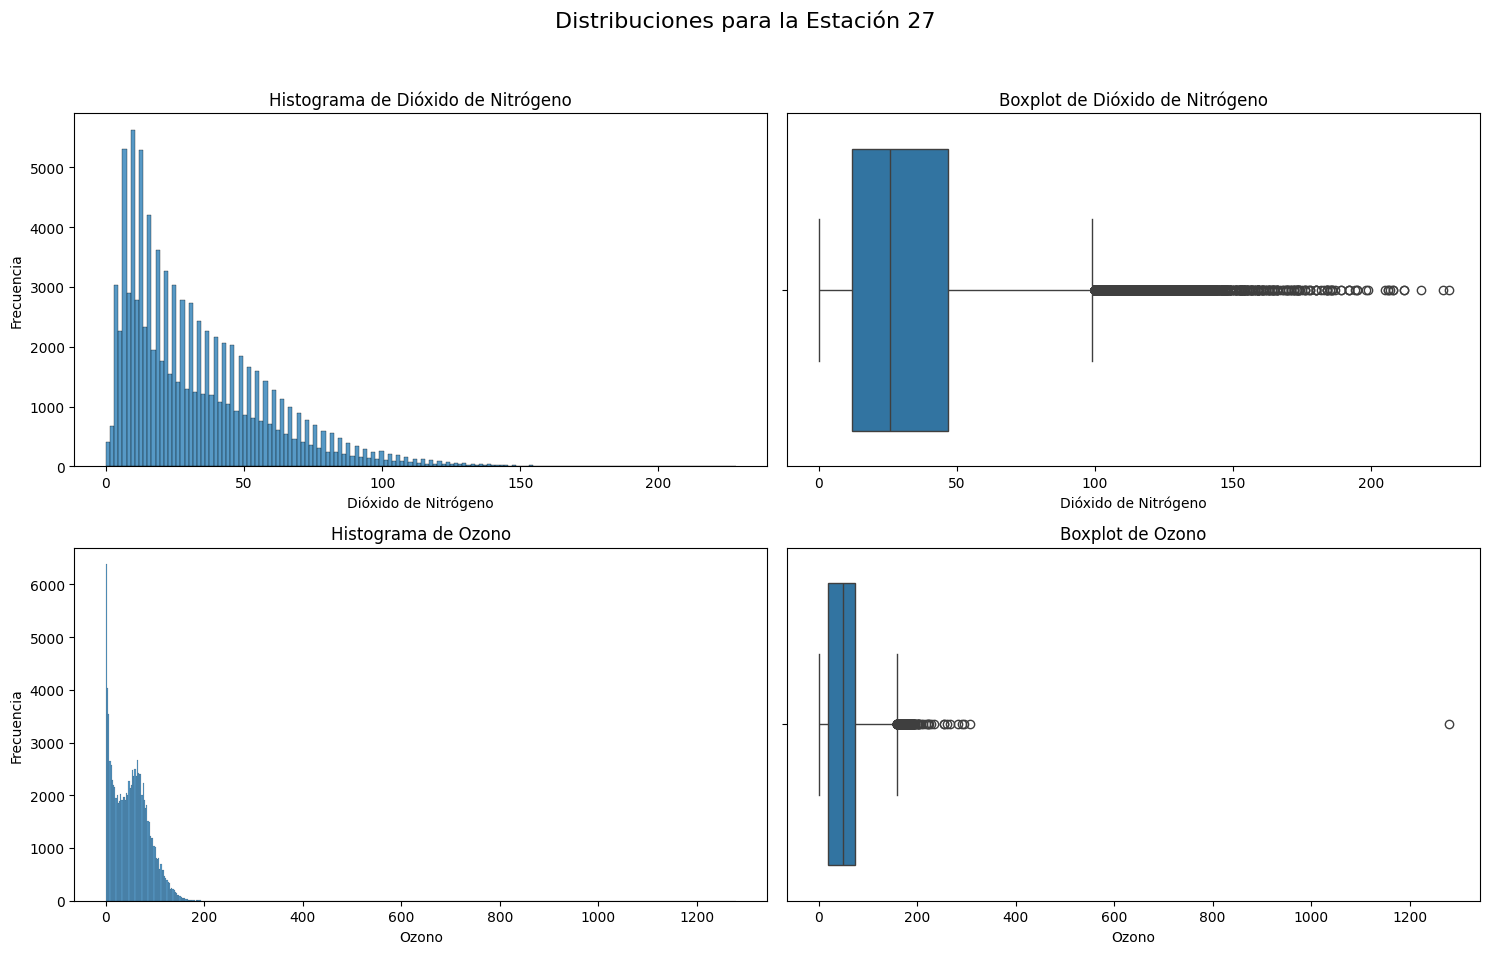

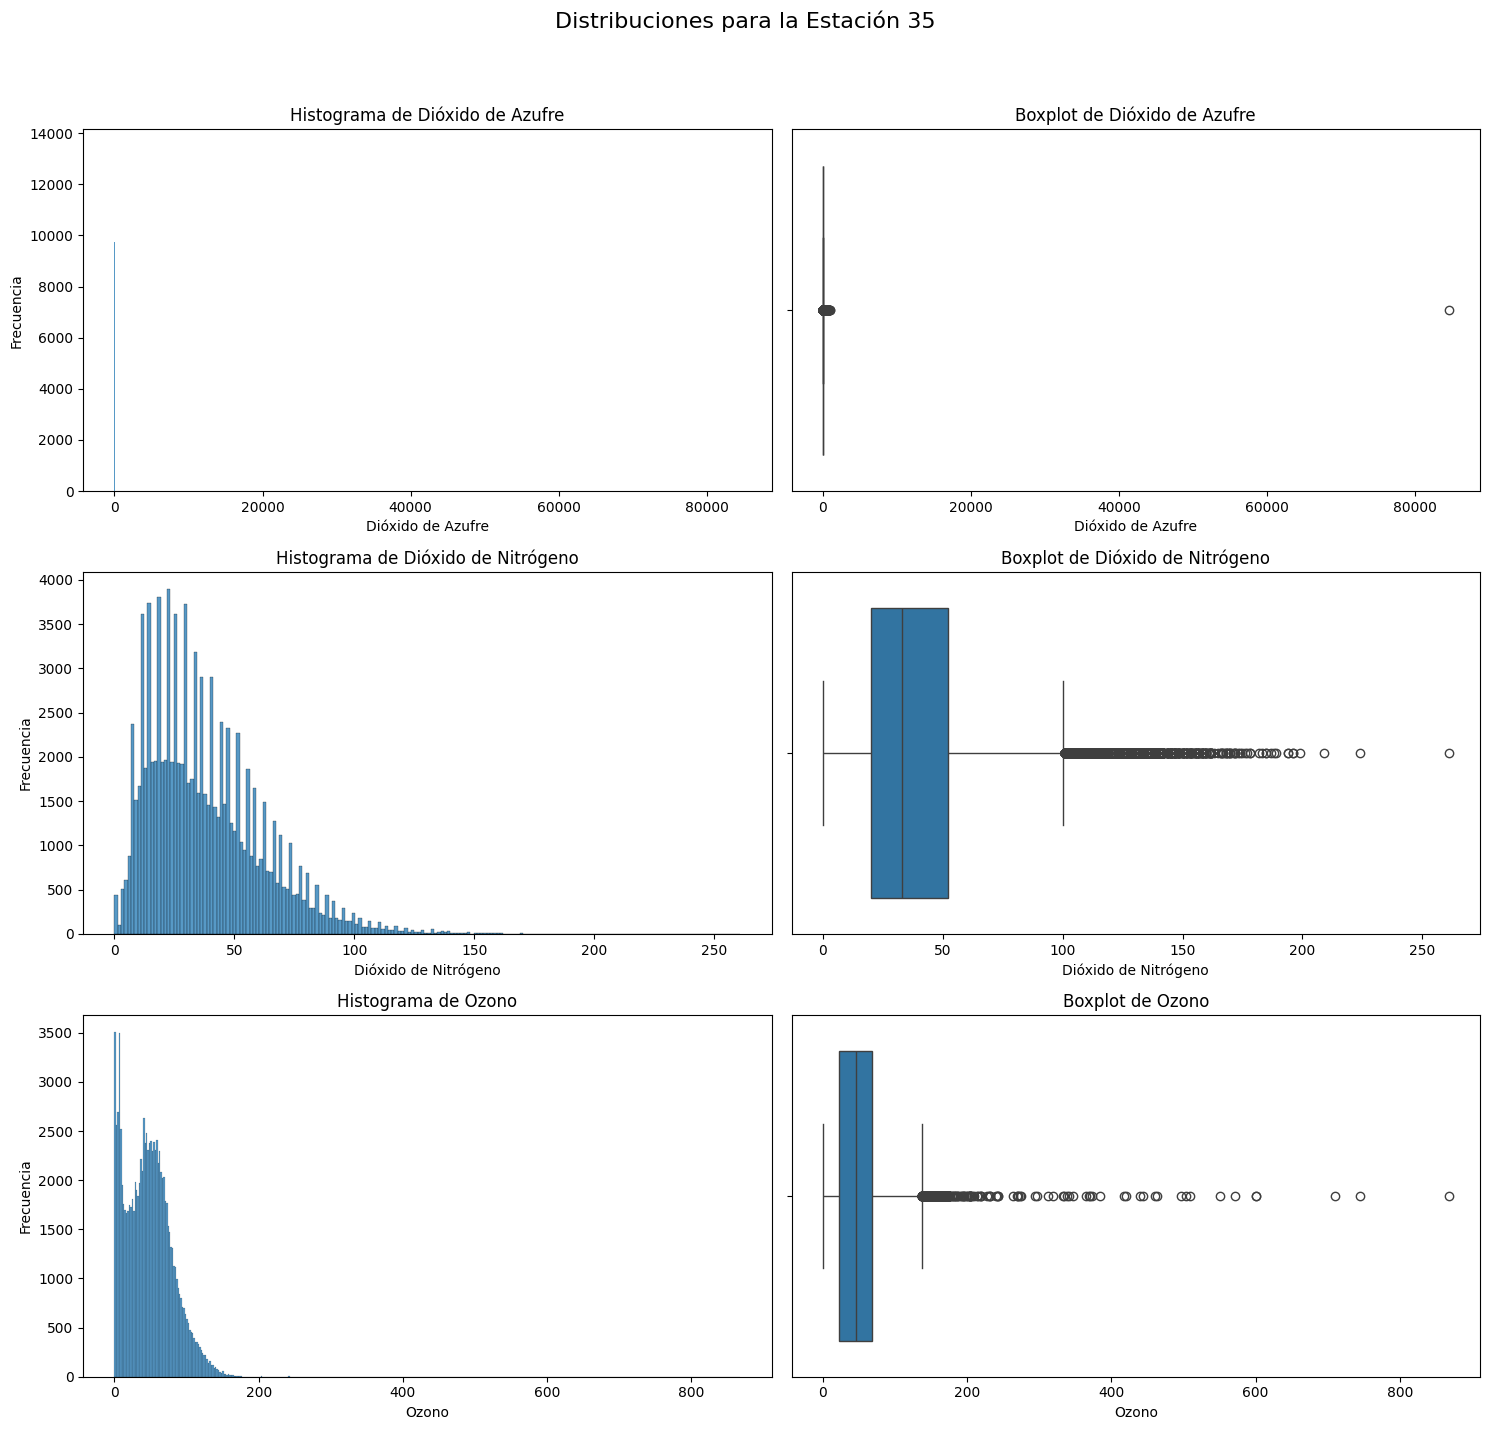

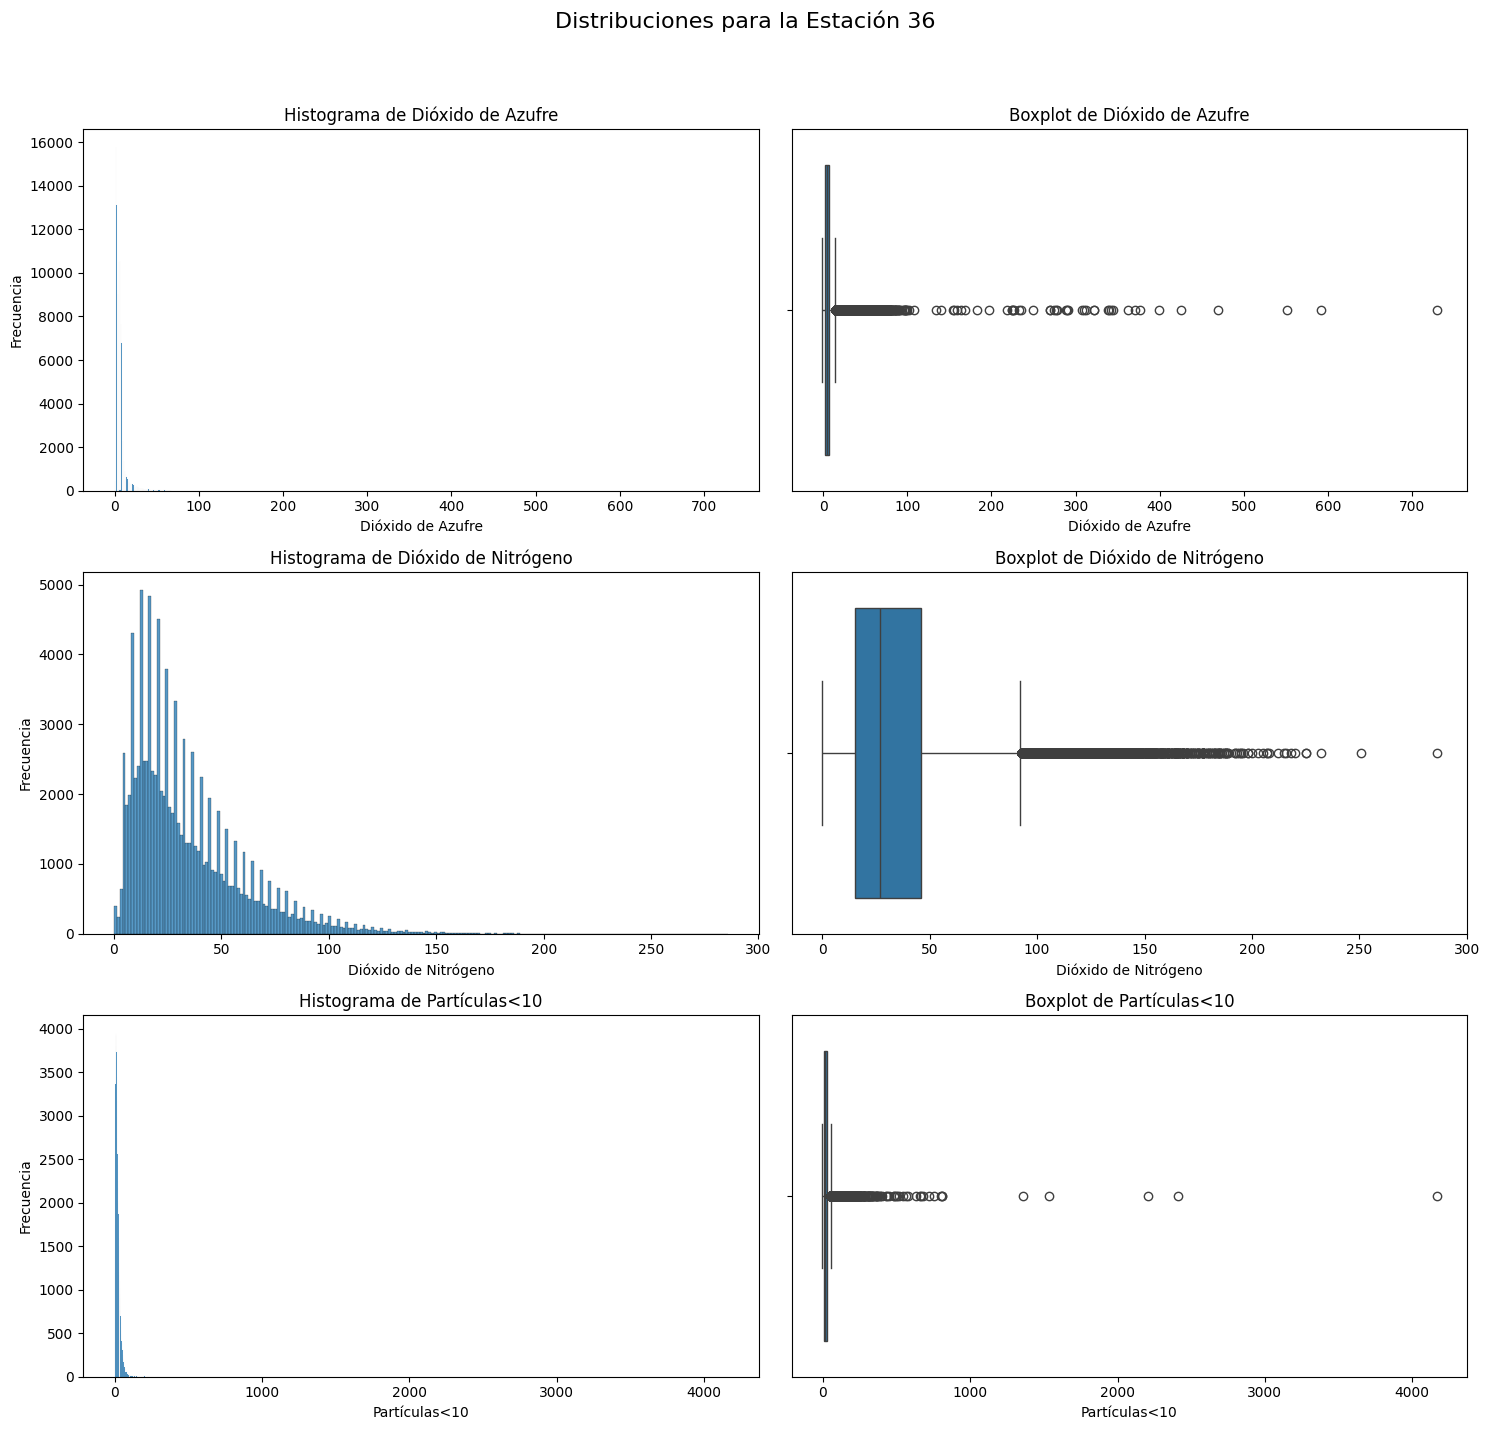

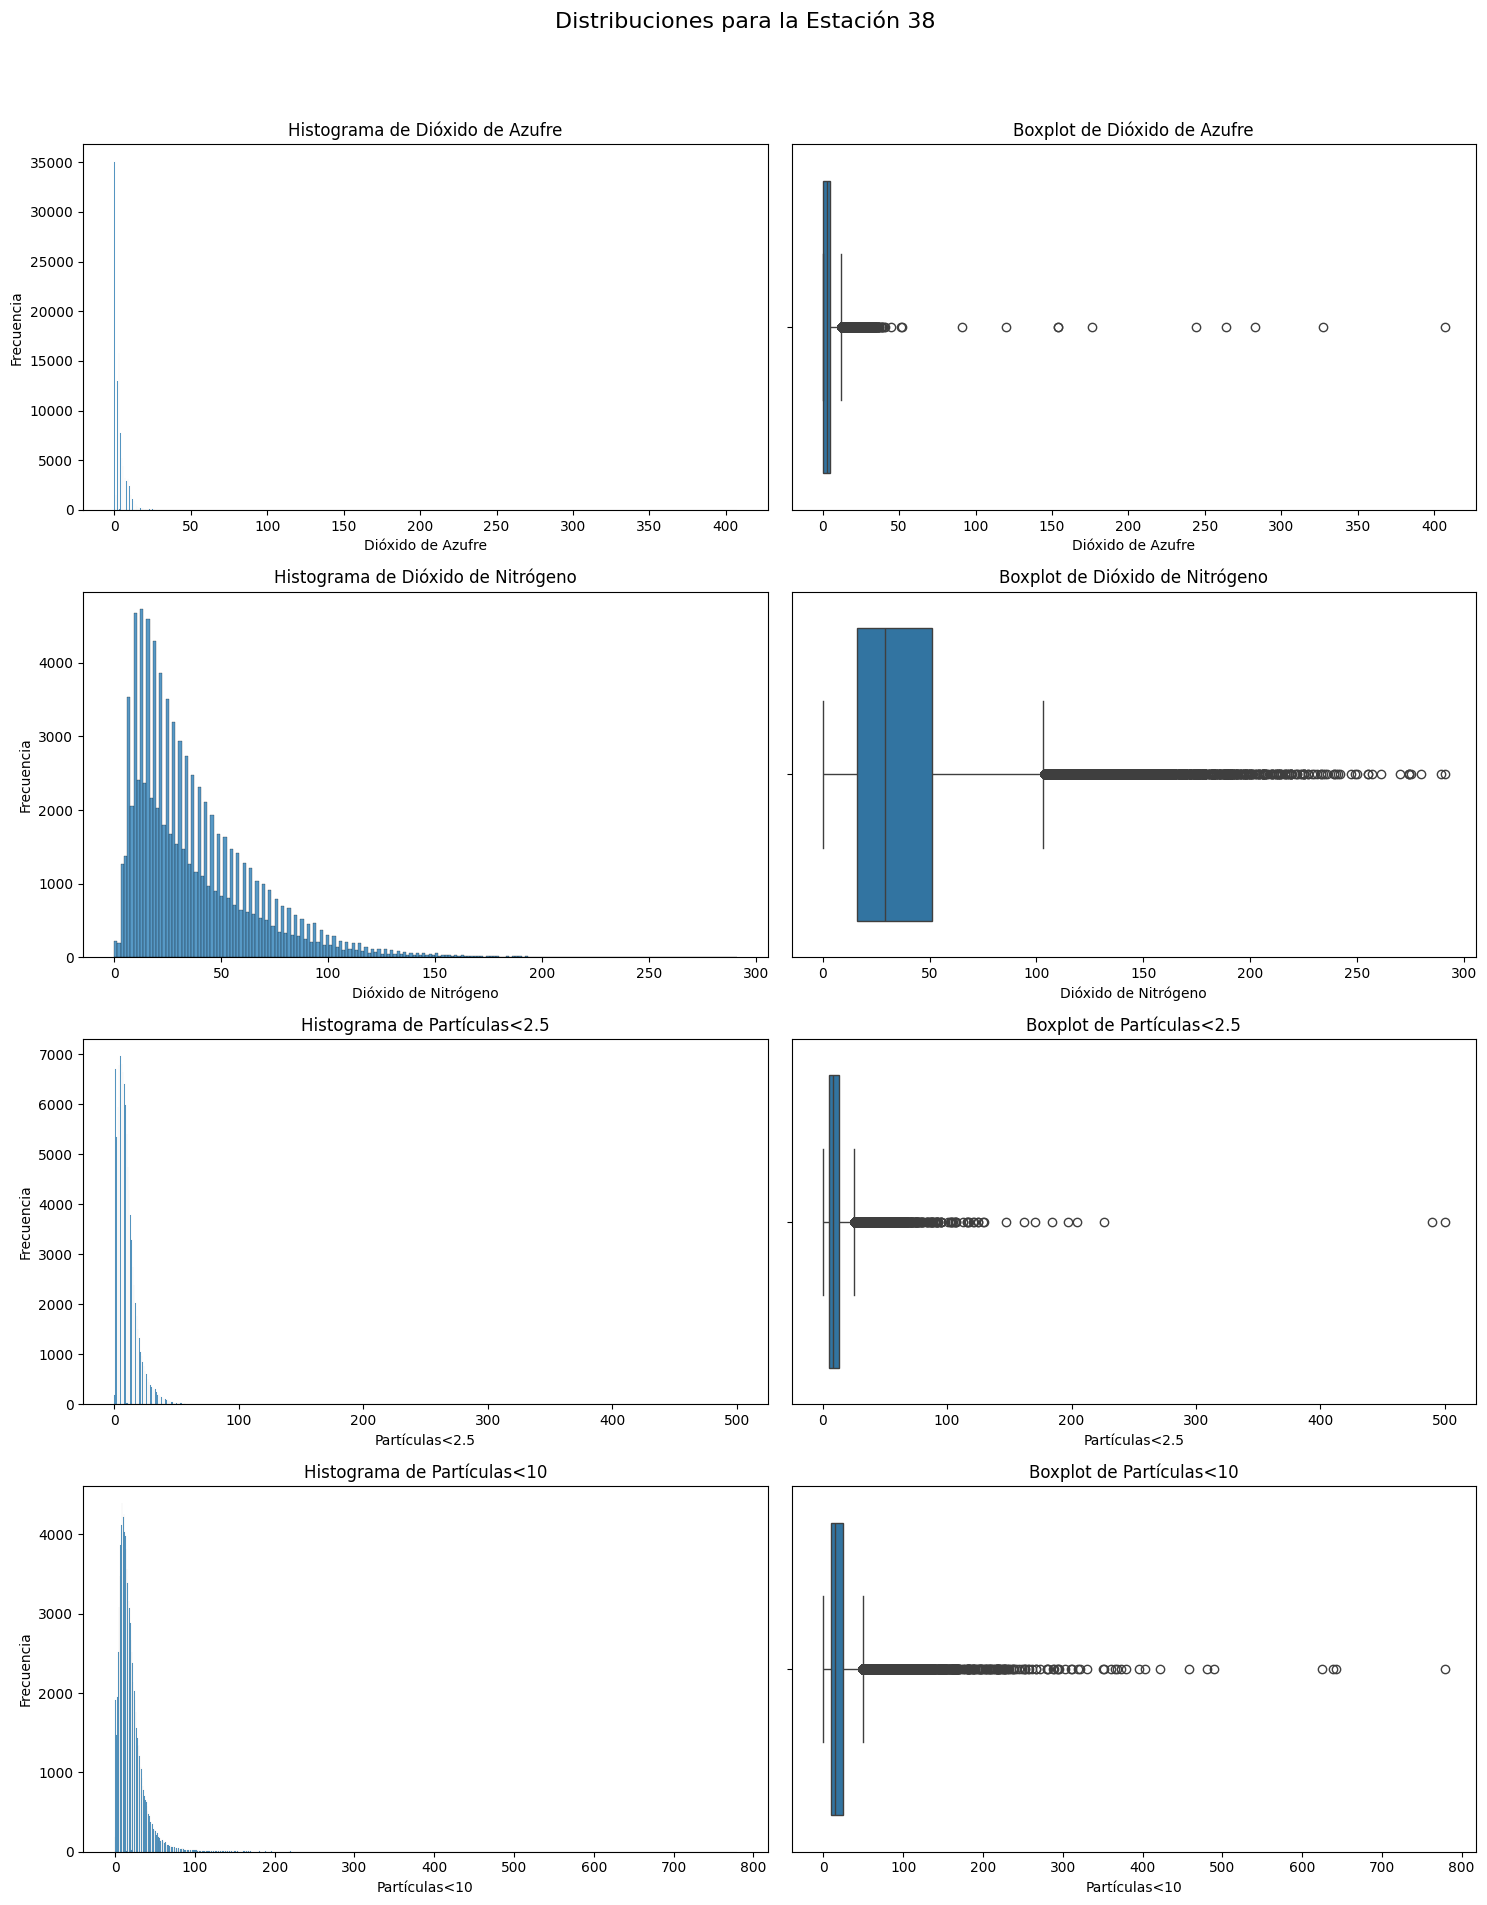

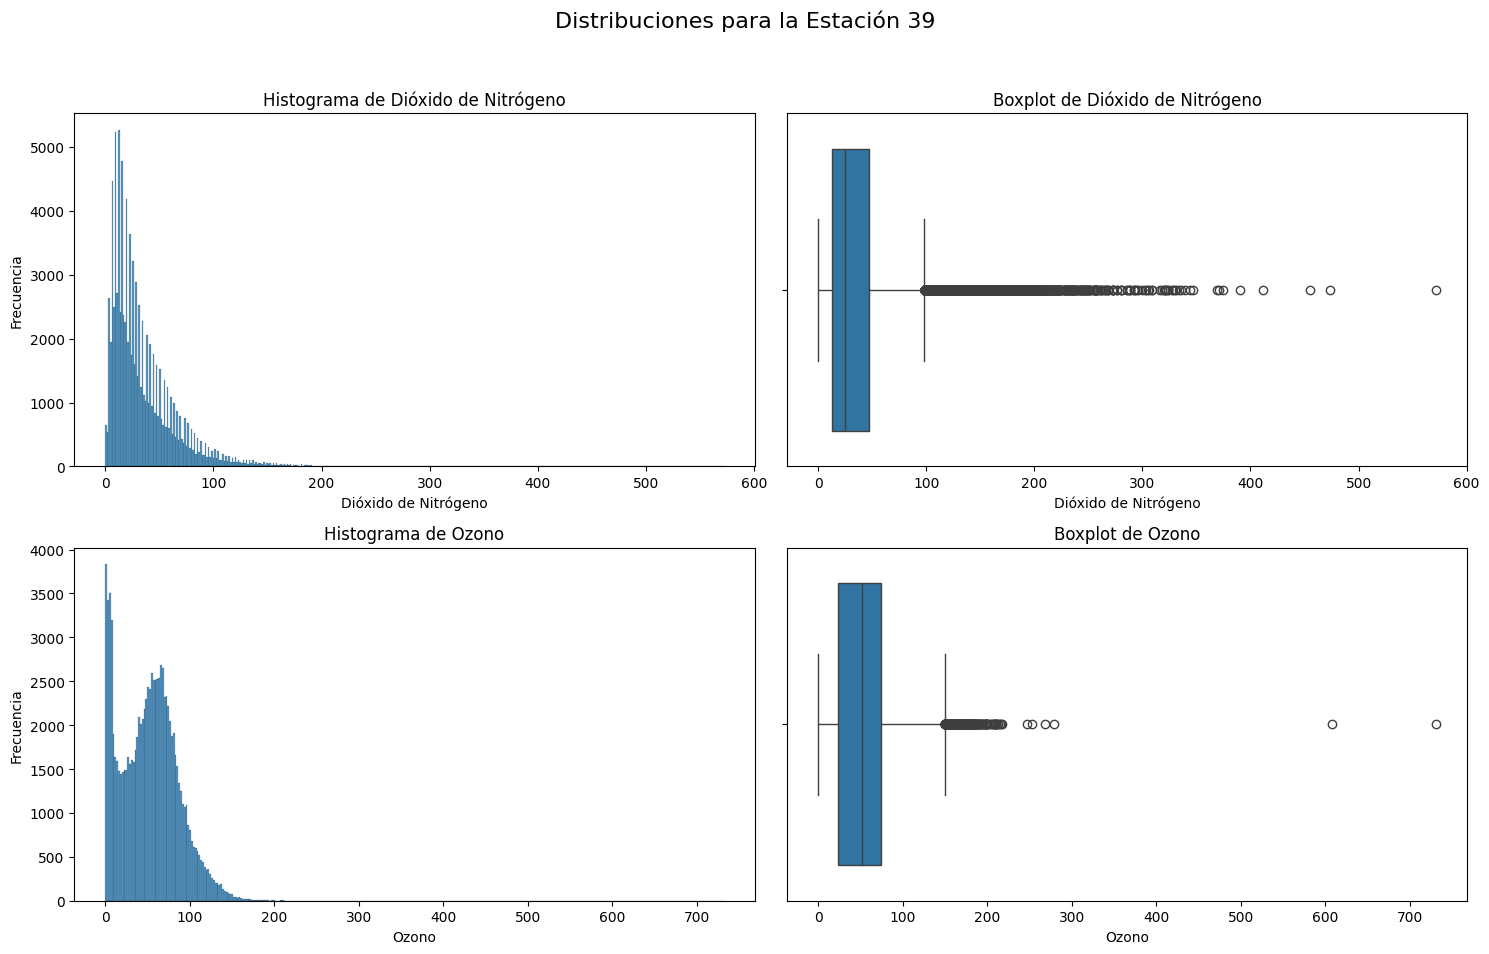

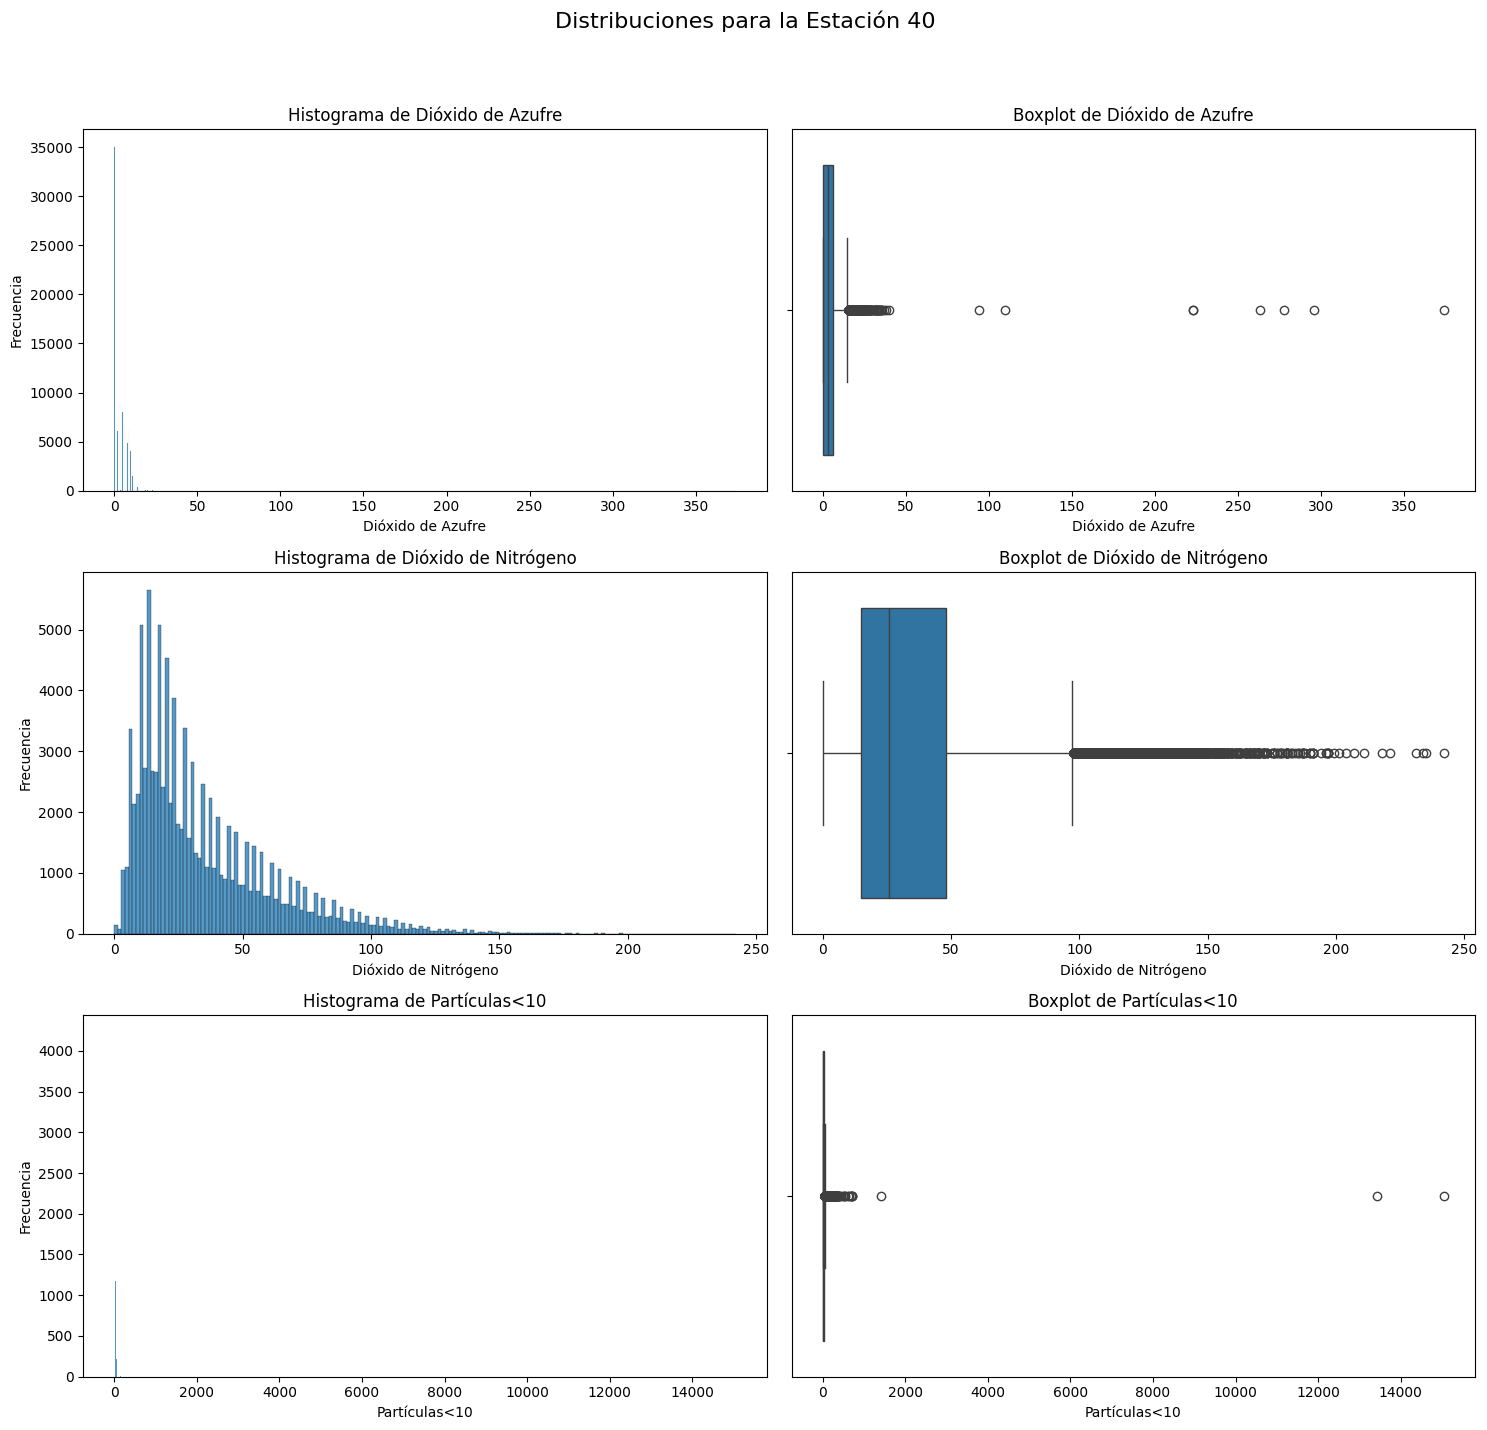

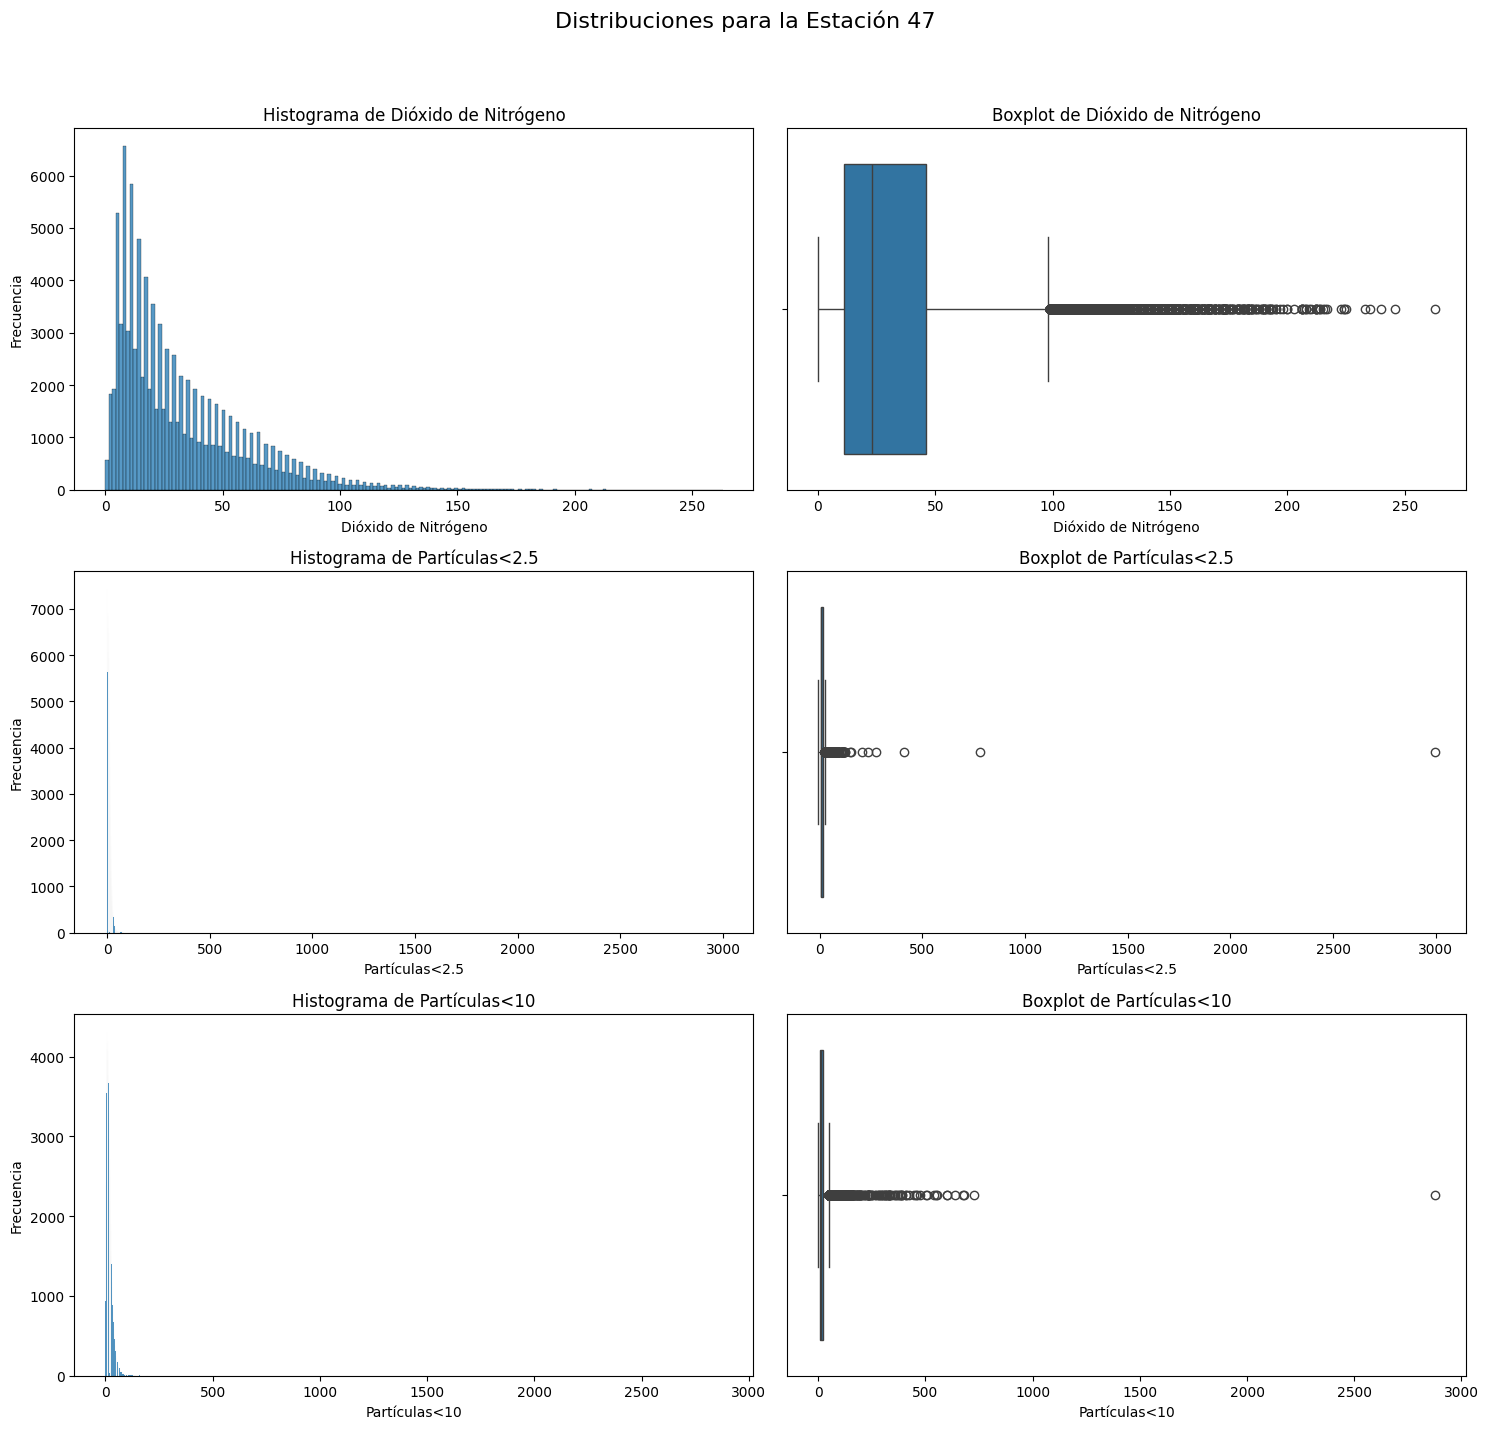

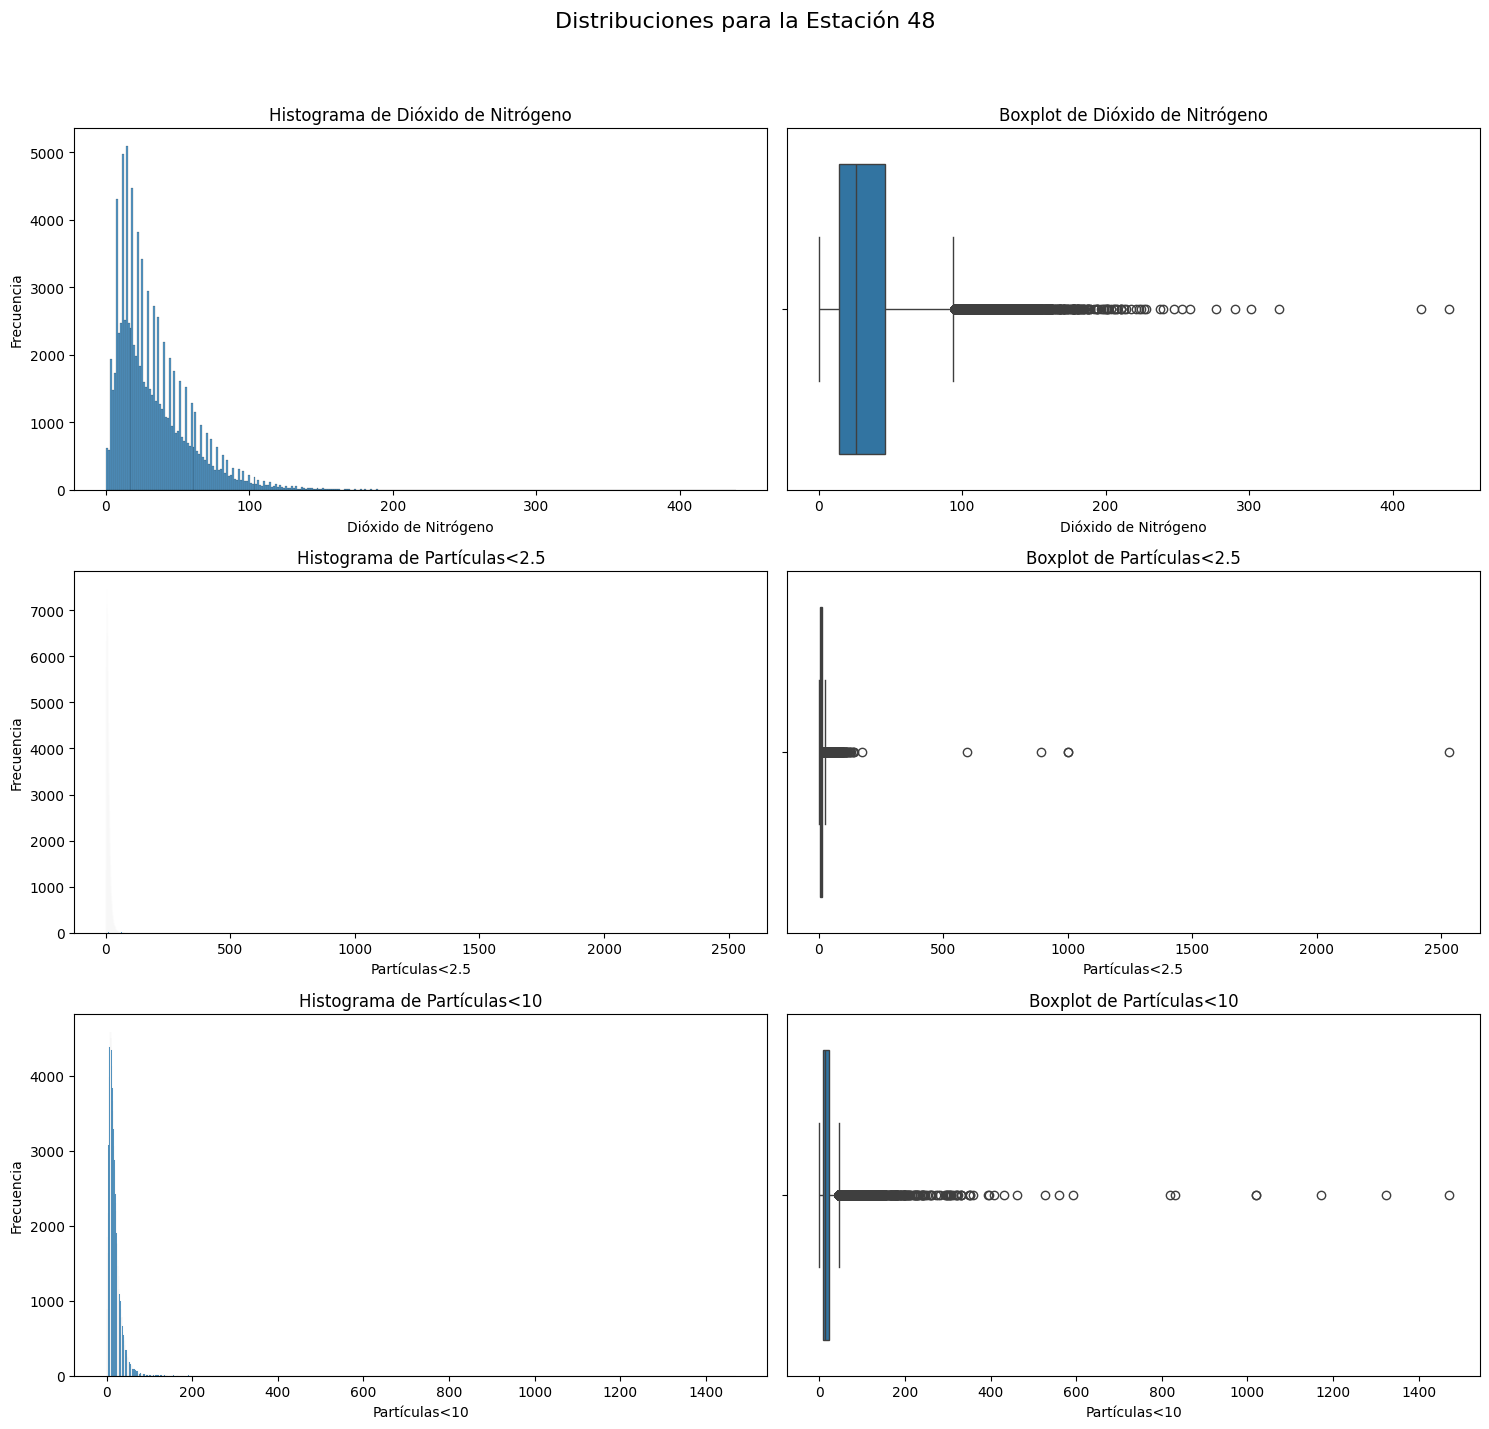

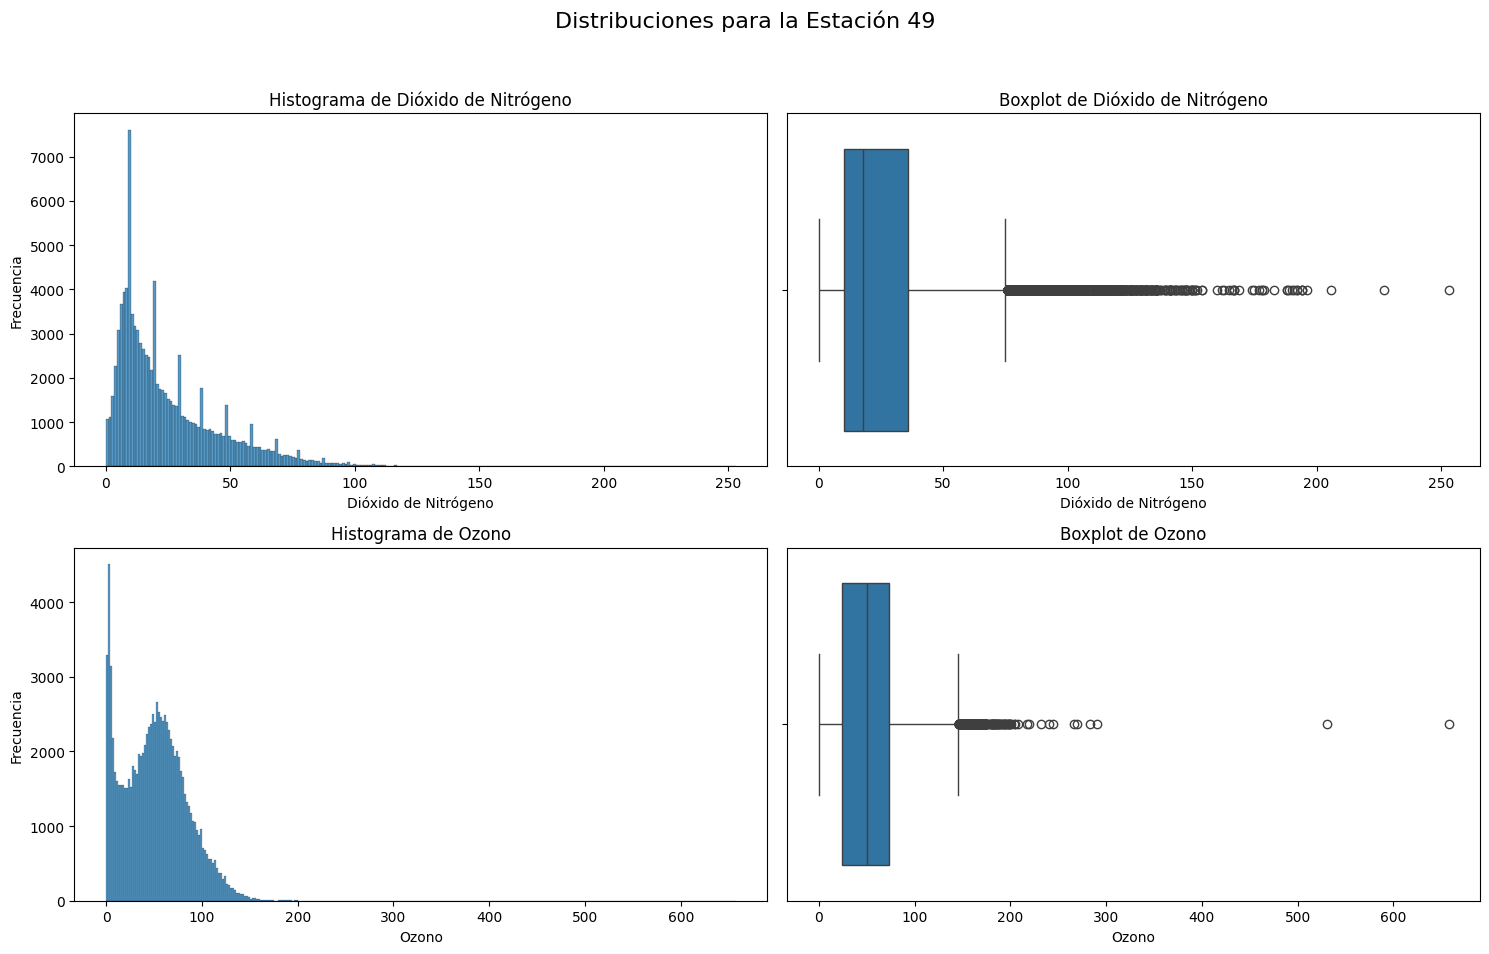

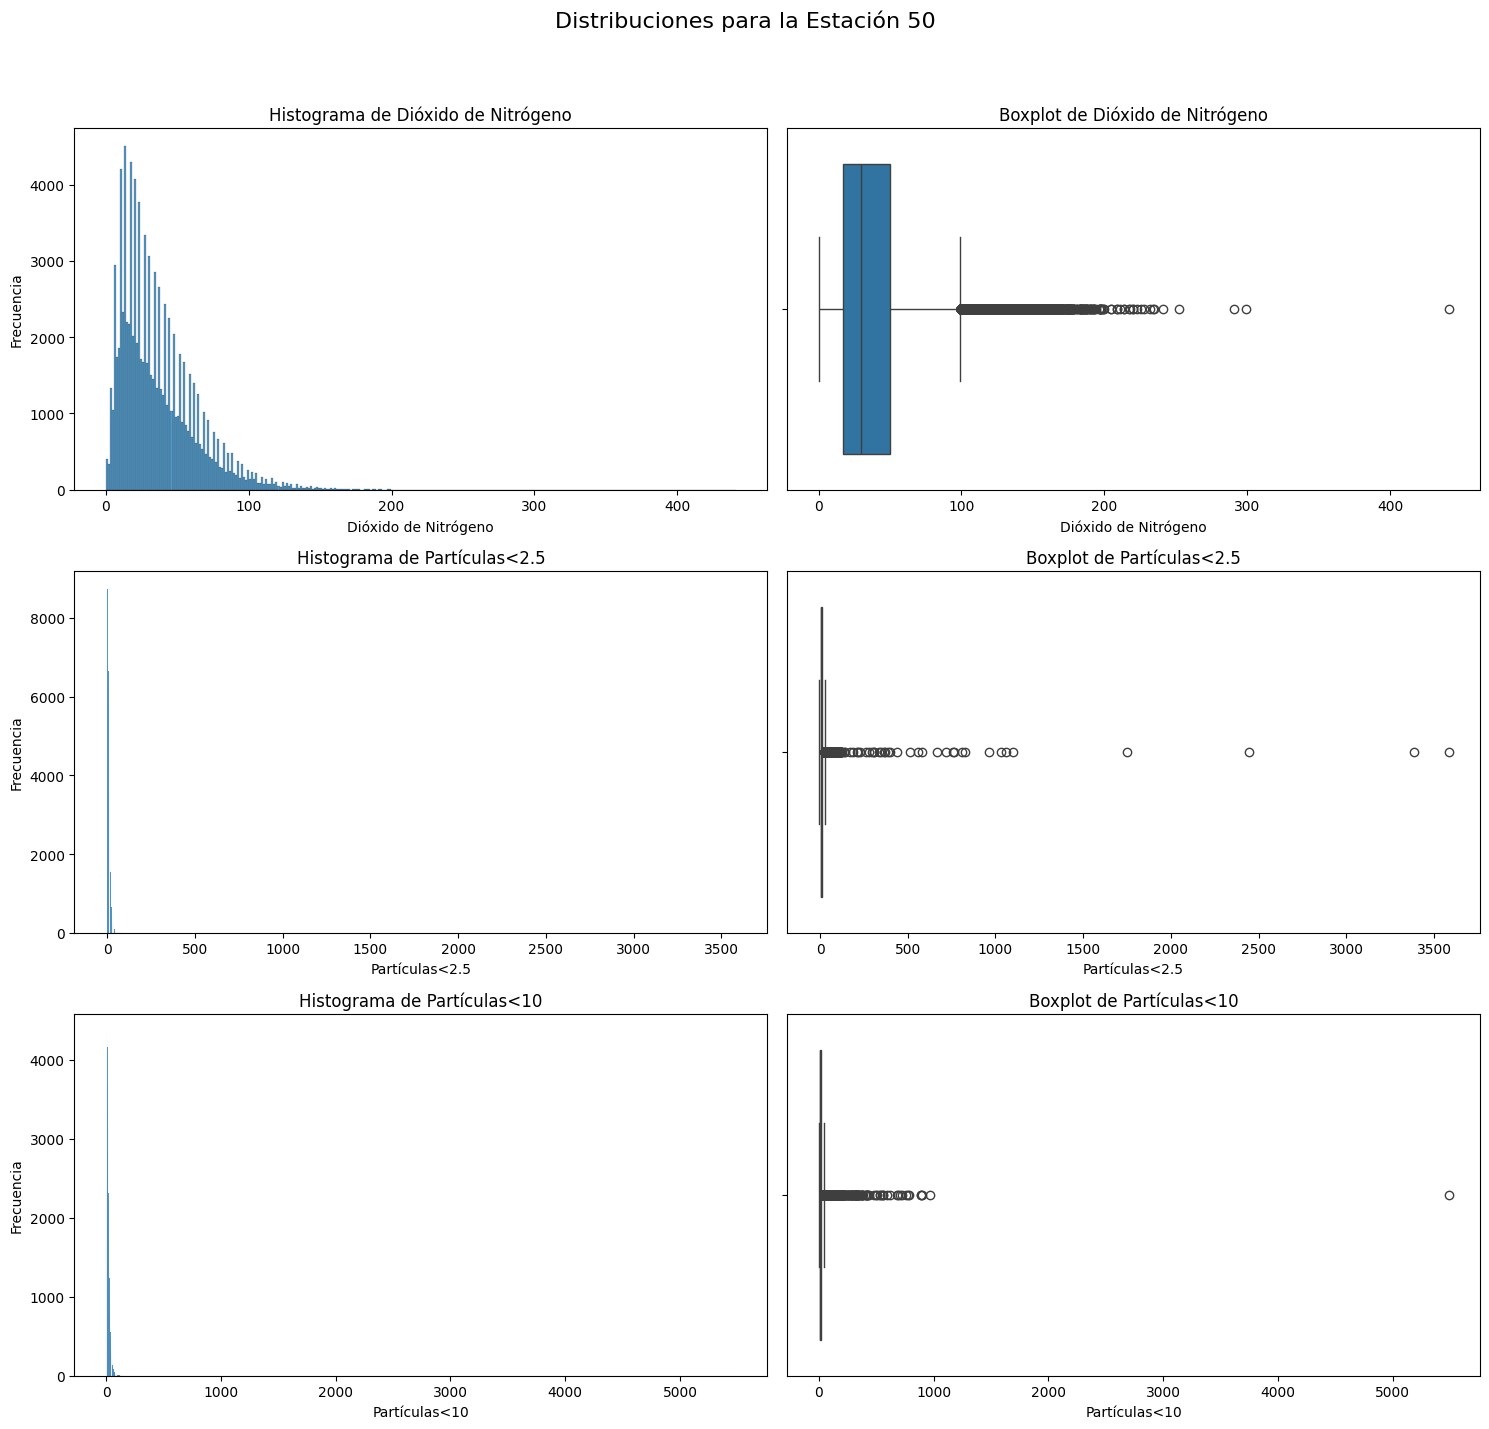

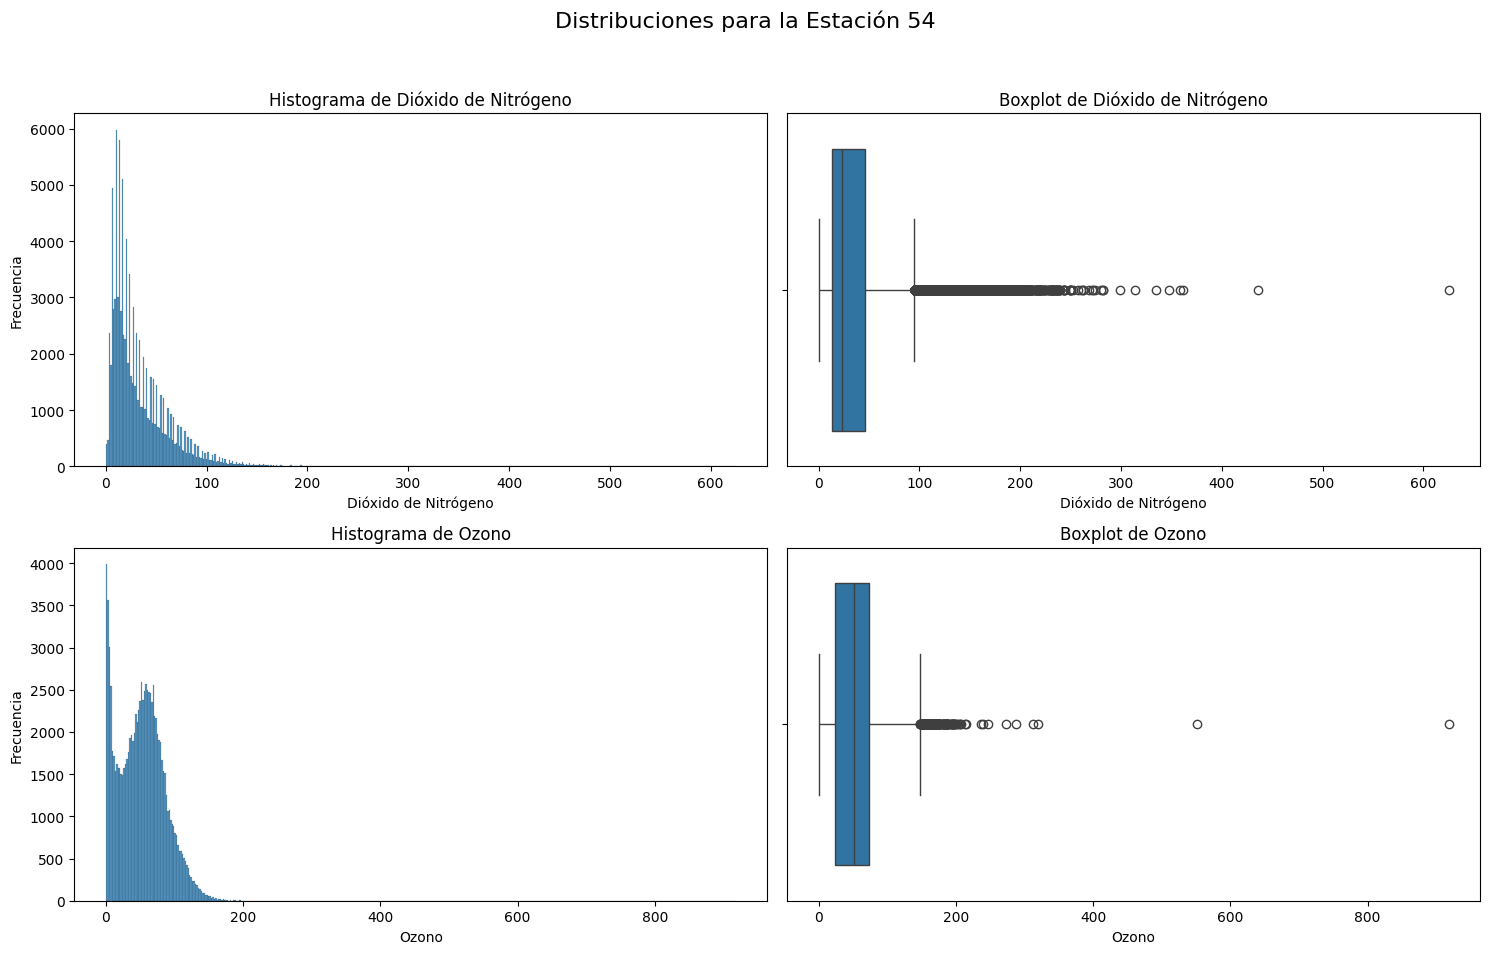

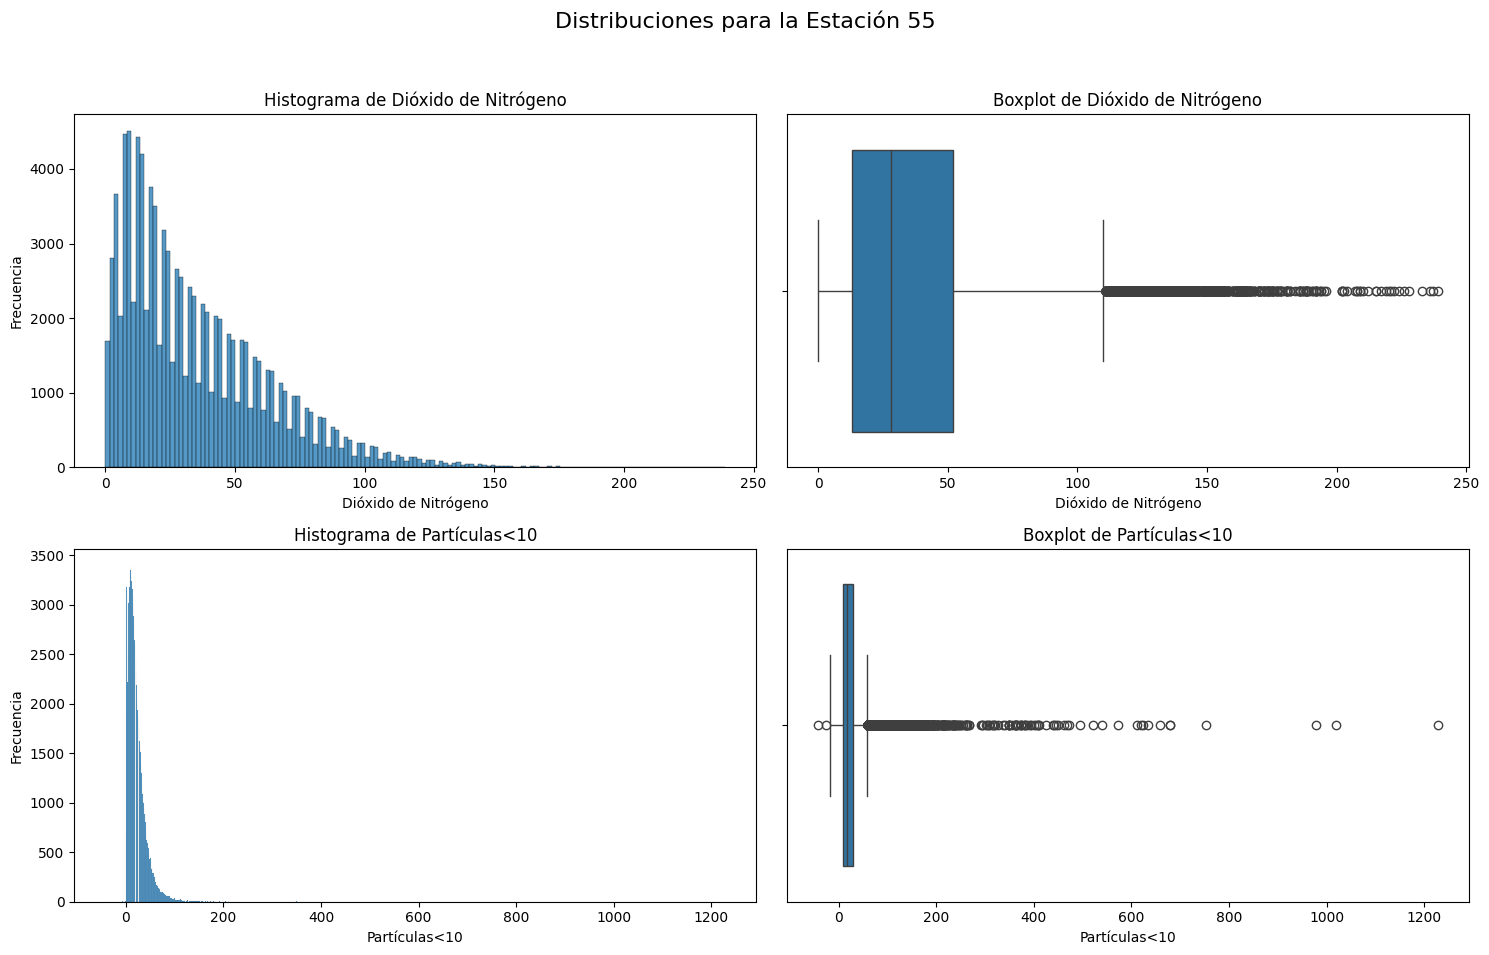

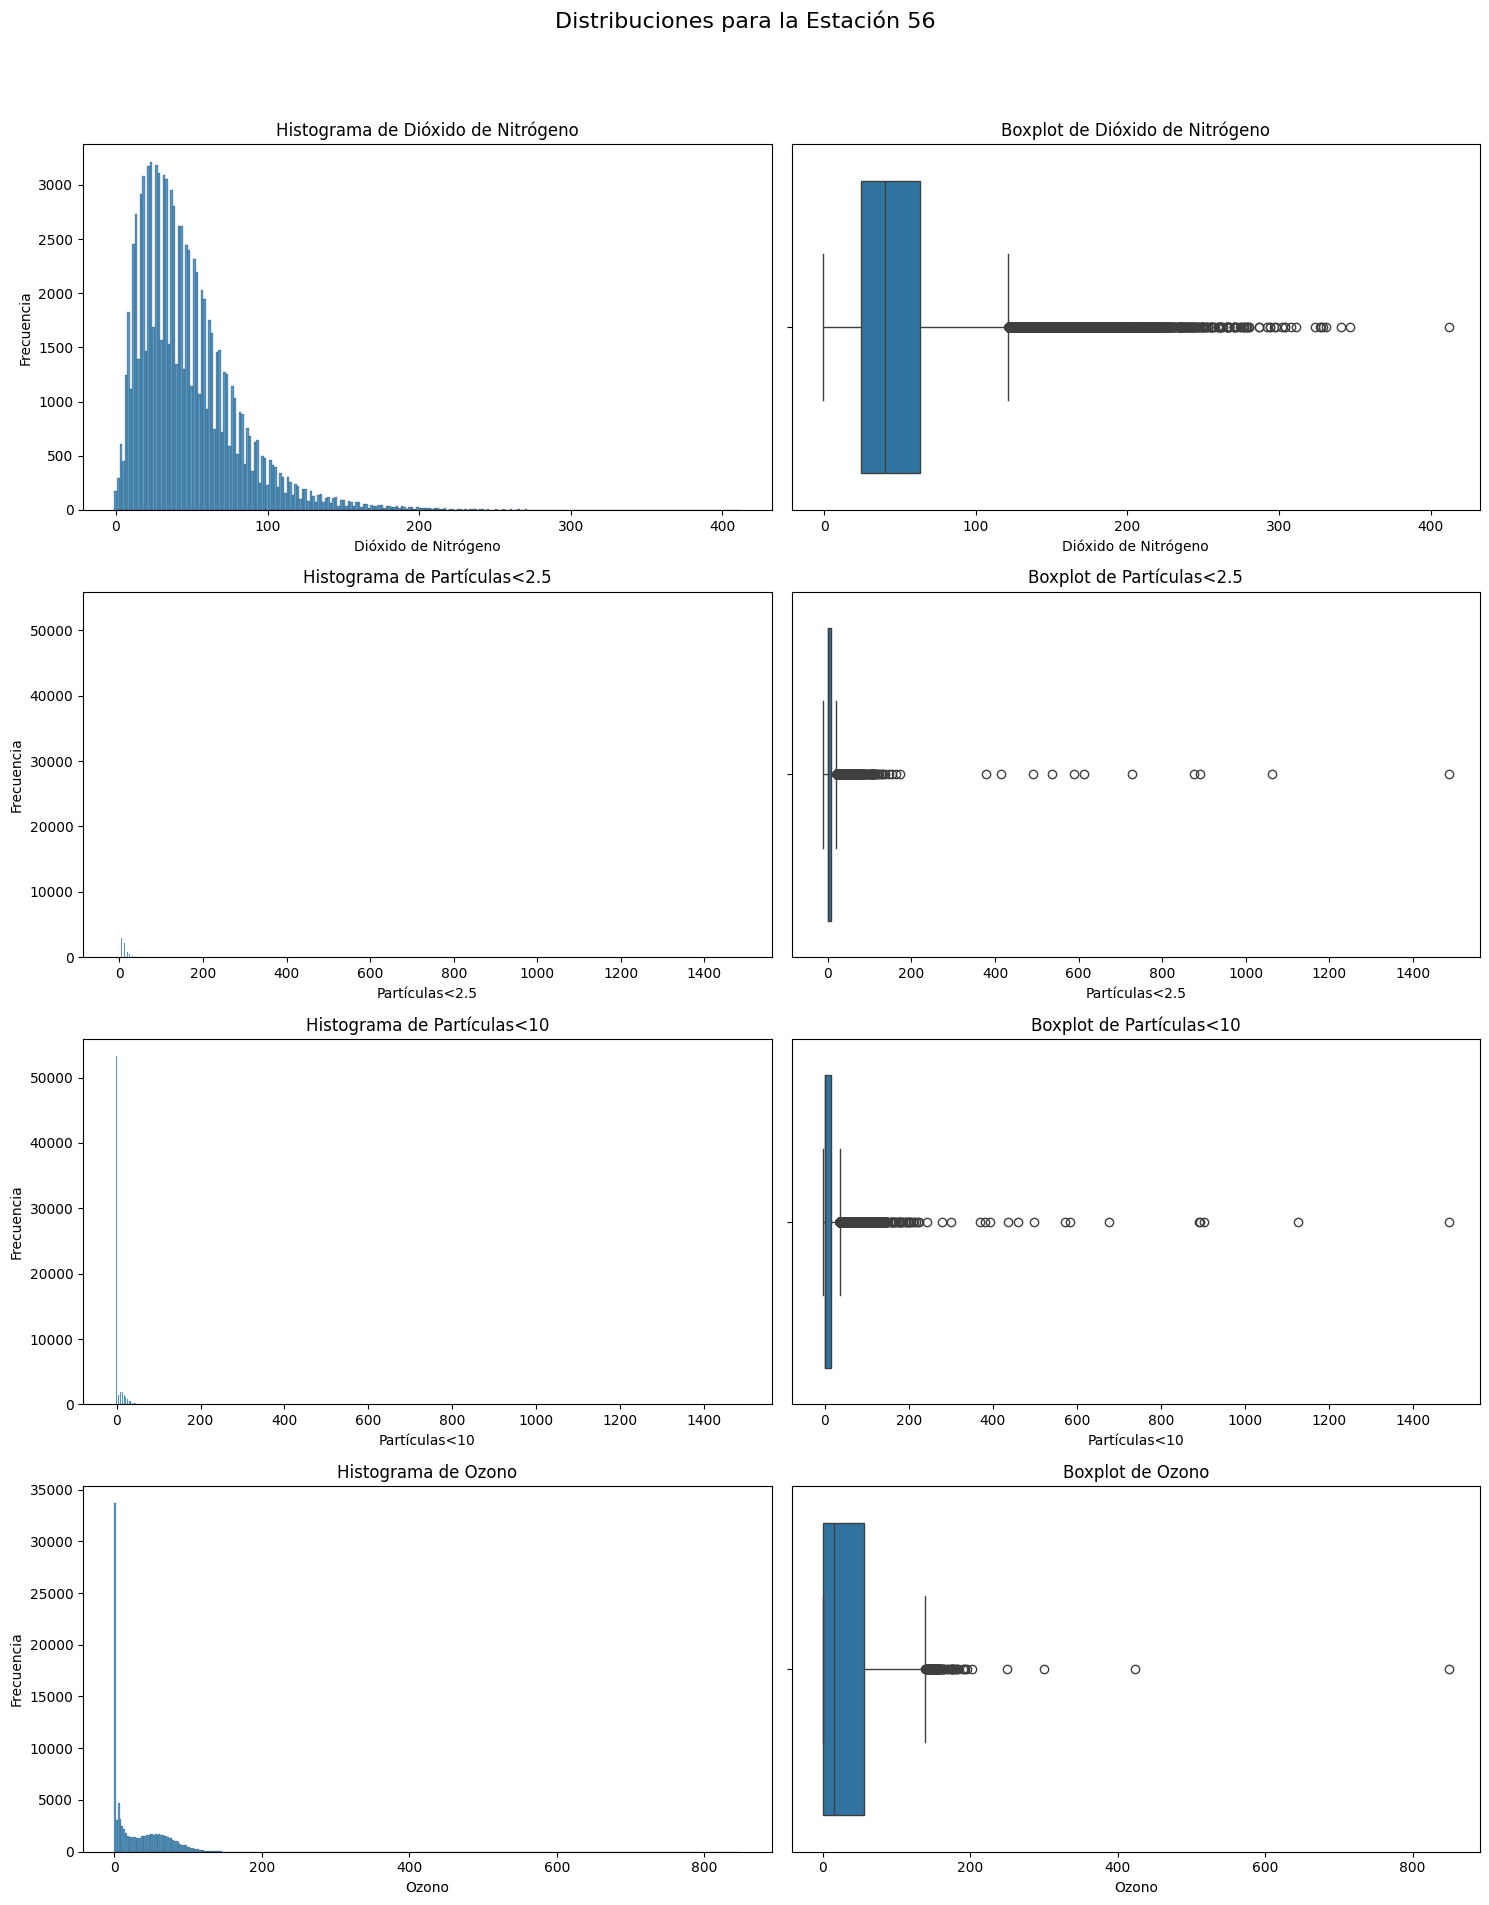

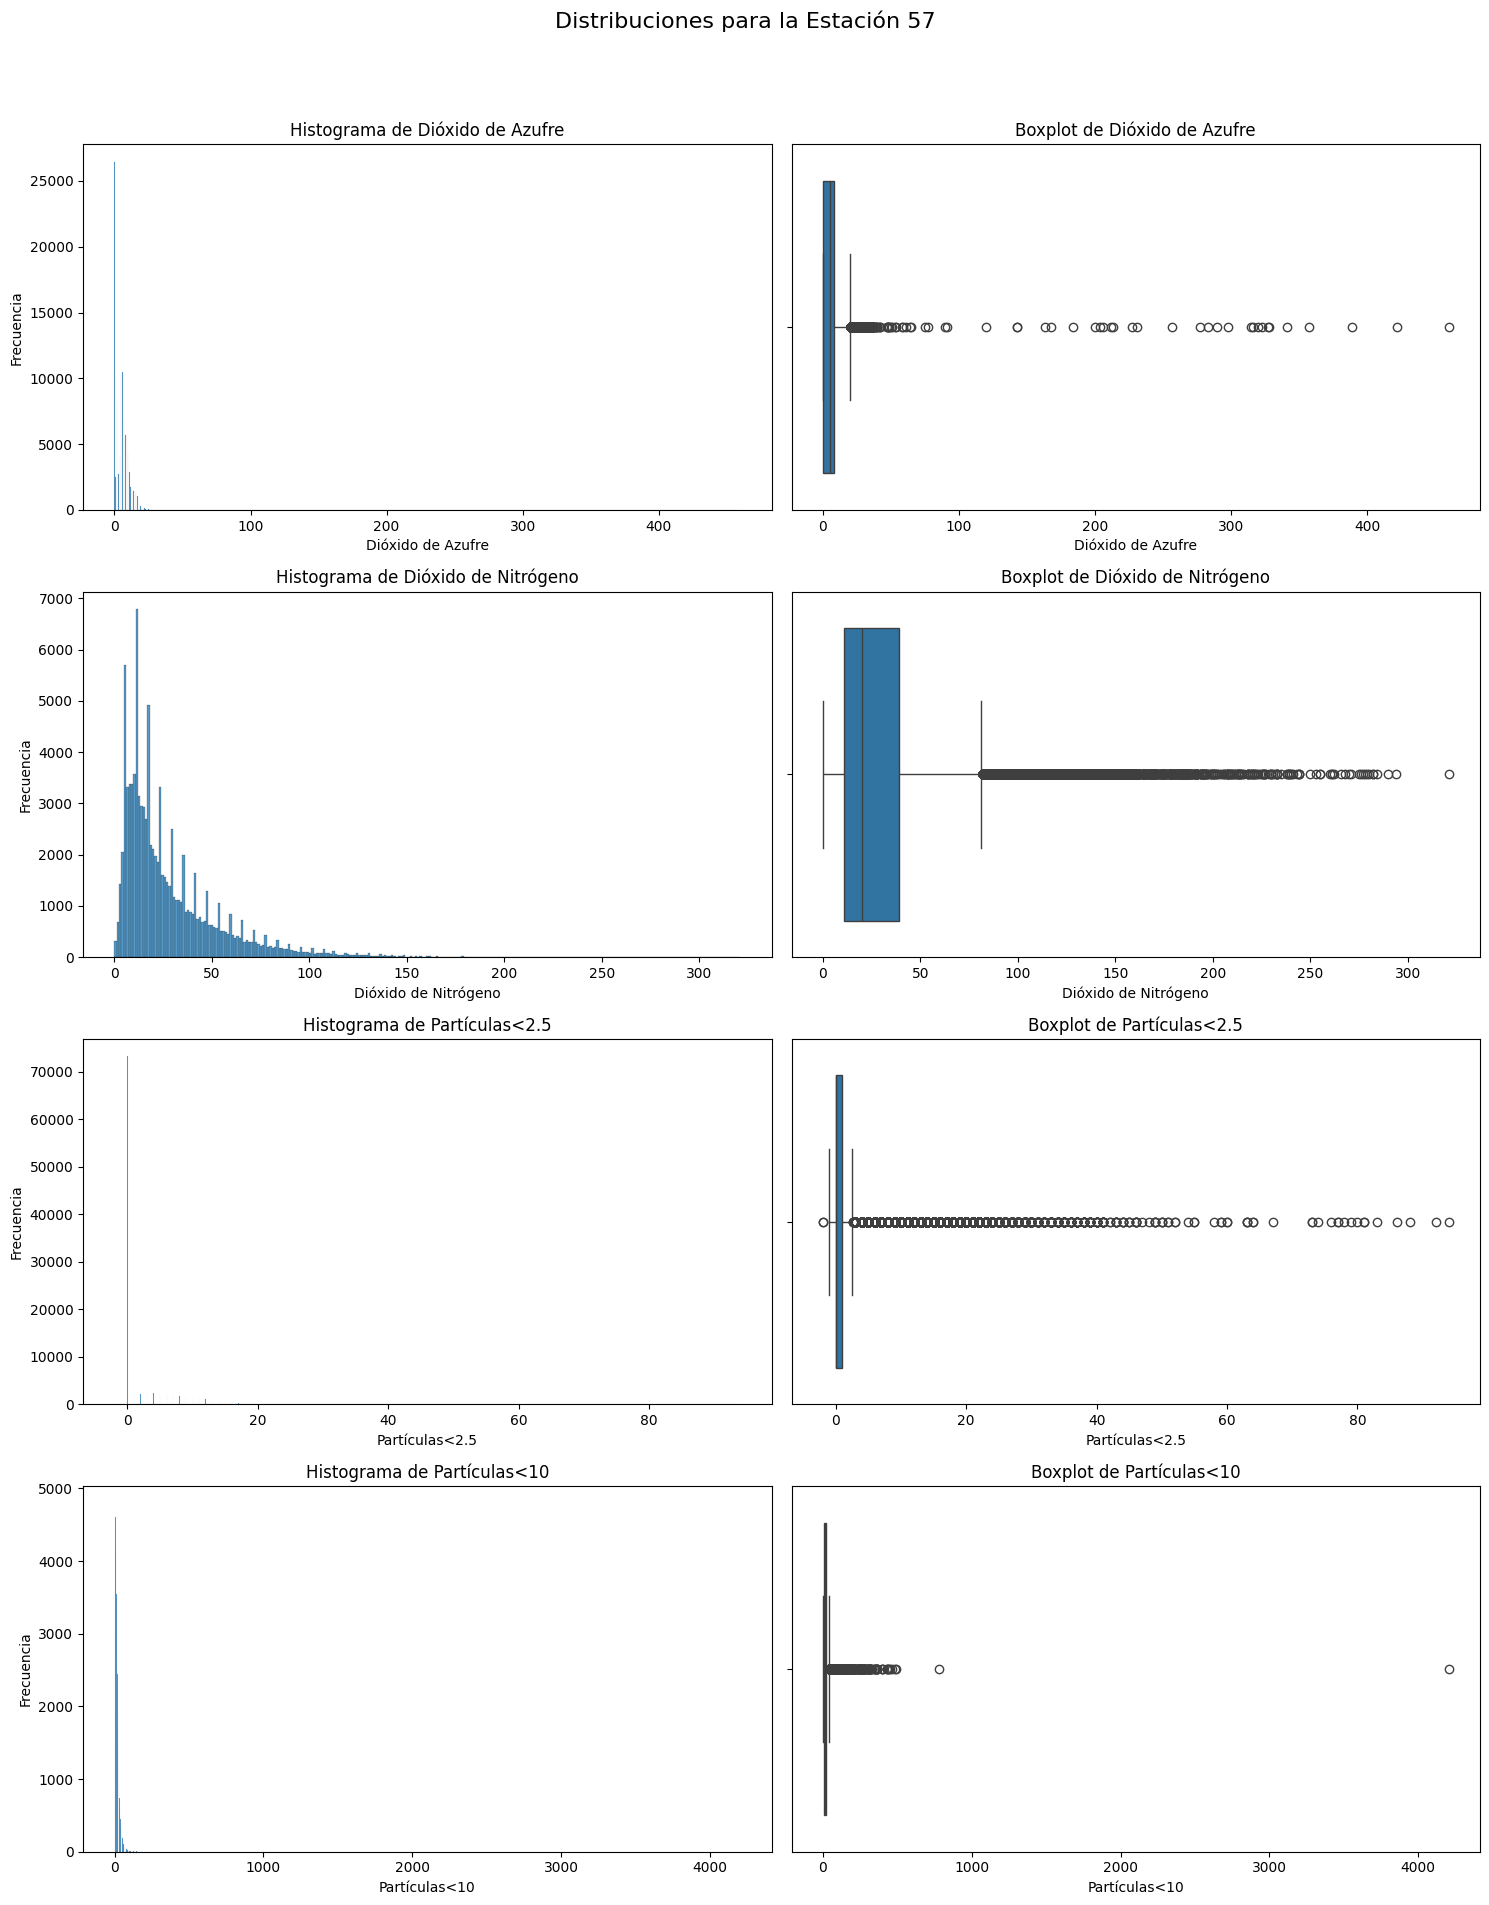

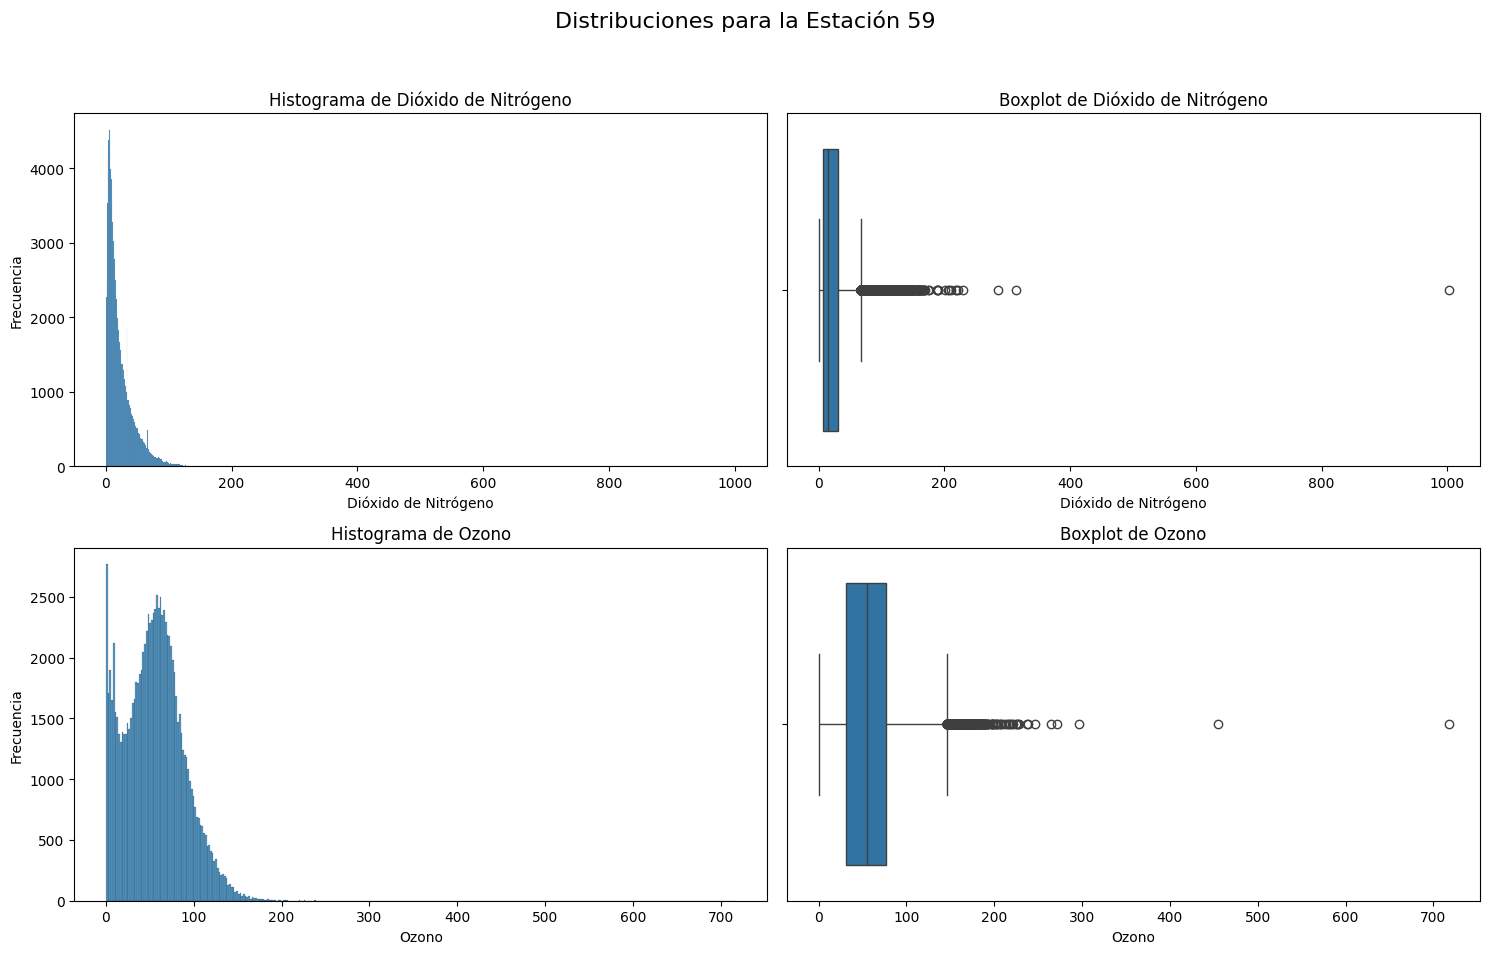

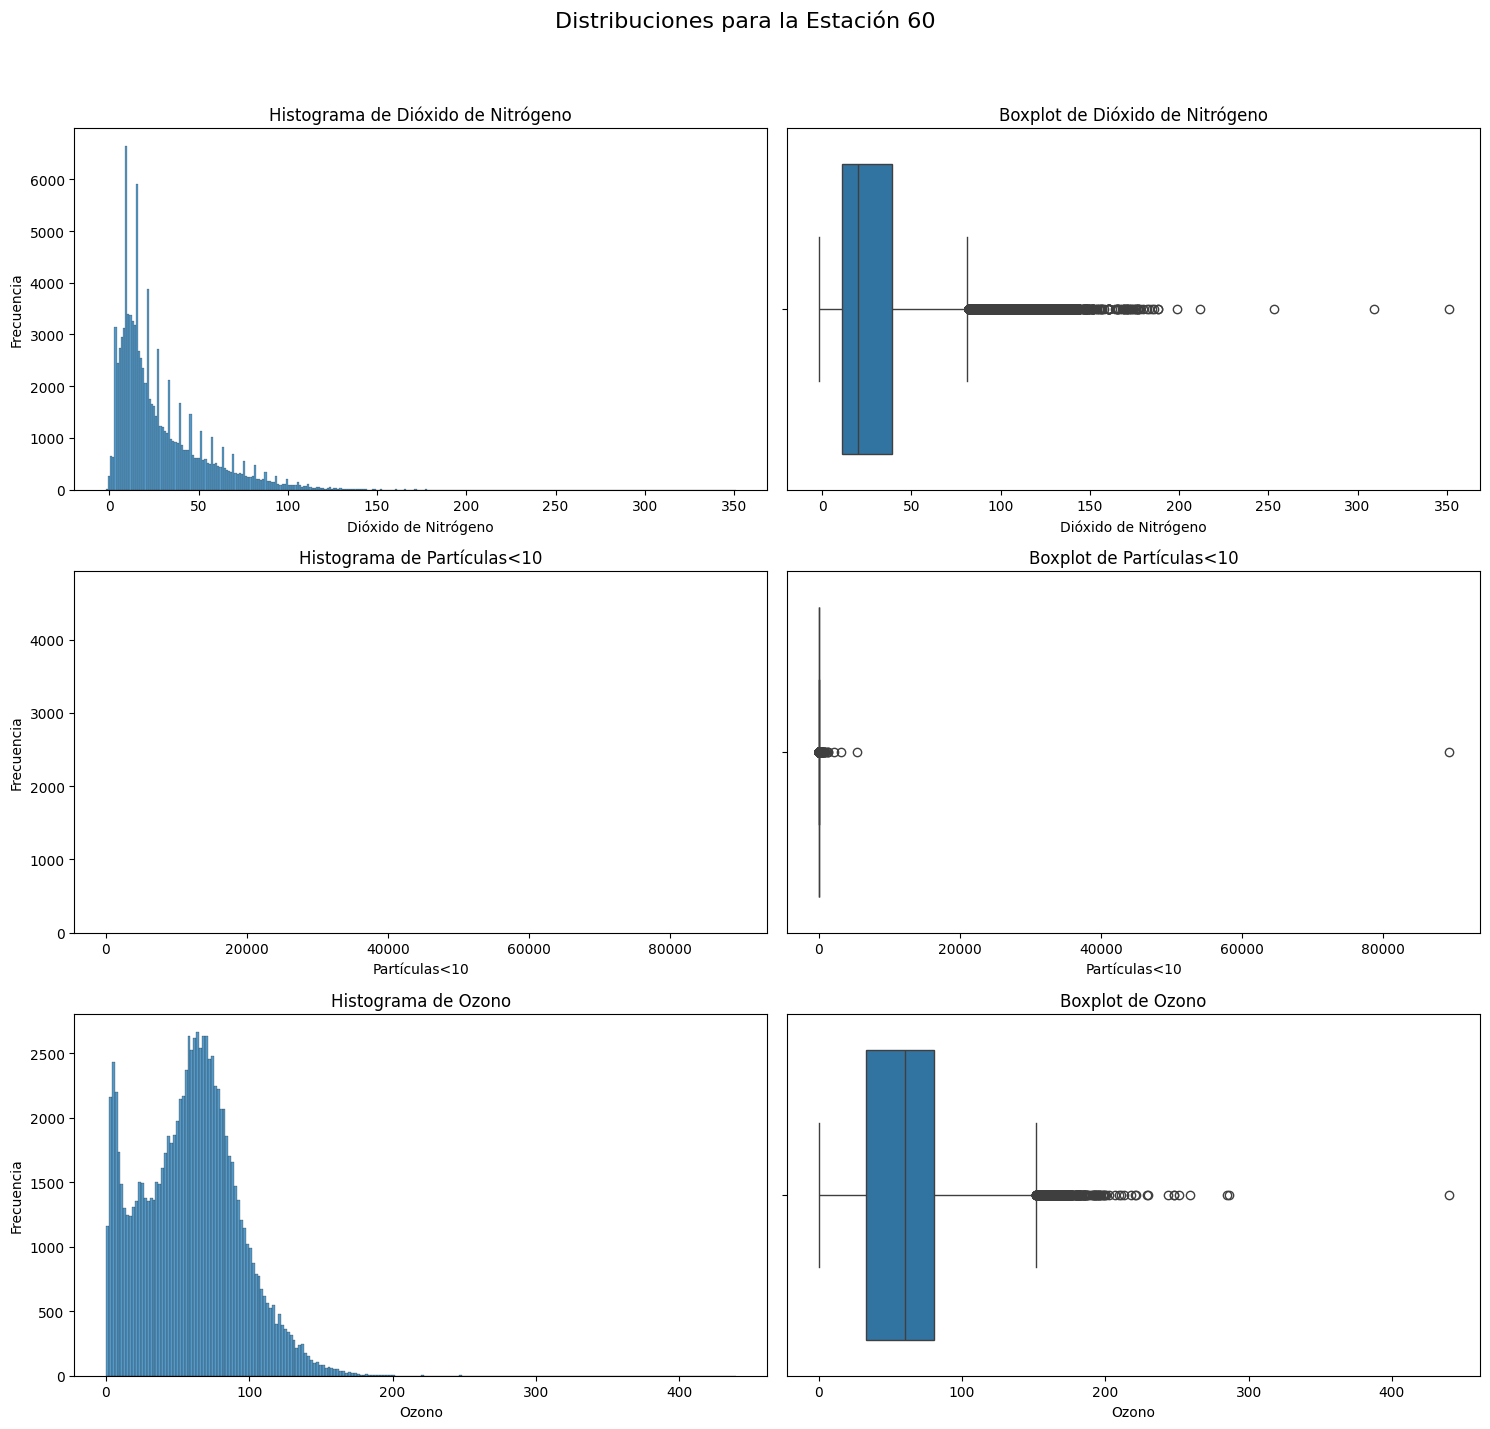

In [57]:
col_target = ["Dióxido de Azufre","Dióxido de Nitrógeno","Partículas<2.5","Partículas<10","Ozono"]
for estacion in df.Estación.unique():
    # Obtener las columnas presentes para la estación actual que están en col_target
    present_cols = [col for col in dic_contaminantes.get(estacion, []) if col in col_target]

    if present_cols:
        num_cols = len(present_cols)
        fig, axes = plt.subplots(nrows=num_cols, ncols=2, figsize=(15, 5 * num_cols))
        fig.suptitle(f'Distribuciones para la Estación {estacion}', fontsize=16)

        # Asegurarse de que axes sea siempre iterable, incluso si solo hay una fila
        if num_cols == 1:
            axes = [axes]

        for i, col in enumerate(present_cols):
            sns.histplot(x=col, data=df[df.Estación == estacion], ax=axes[i][0])
            axes[i][0].set_title(f'Histograma de {col}')
            axes[i][0].set_xlabel(col)
            axes[i][0].set_ylabel('Frecuencia')

            sns.boxplot(x=col, data=df[df.Estación == estacion], ax=axes[i][1])
            axes[i][1].set_title(f'Boxplot de {col}')
            axes[i][1].set_xlabel(col)

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()
    else:
        print(f"Advertencia: No se encontraron contaminantes objetivo para la Estación {estacion} en dic_contaminantes.")

In [69]:
col_clima = df.columns[19:27]

In [78]:
col_clima

Index(['Temperatura', 'PuntoRocio', 'TempHumeda', 'HumedadRelativa',
       'Precipitacion', 'Presion', 'VelViento', 'DirViento'],
      dtype='object')

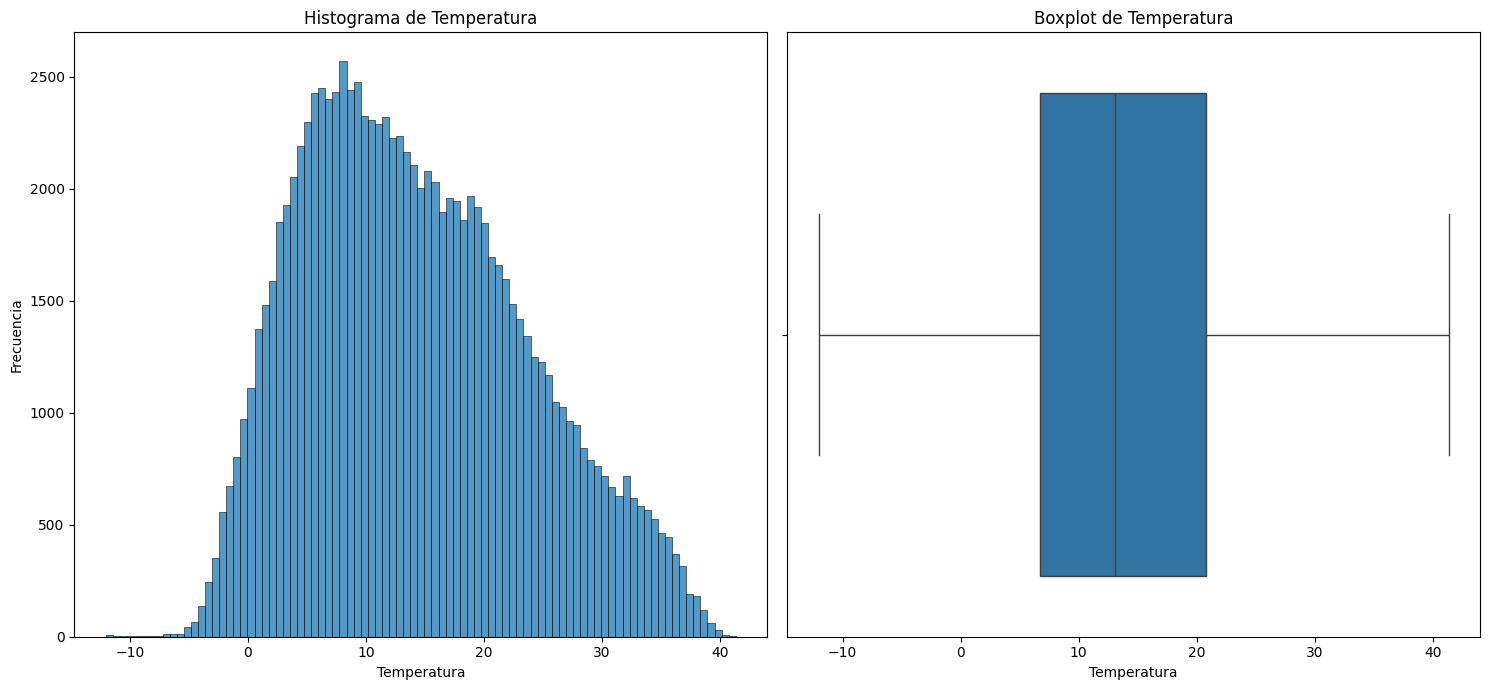

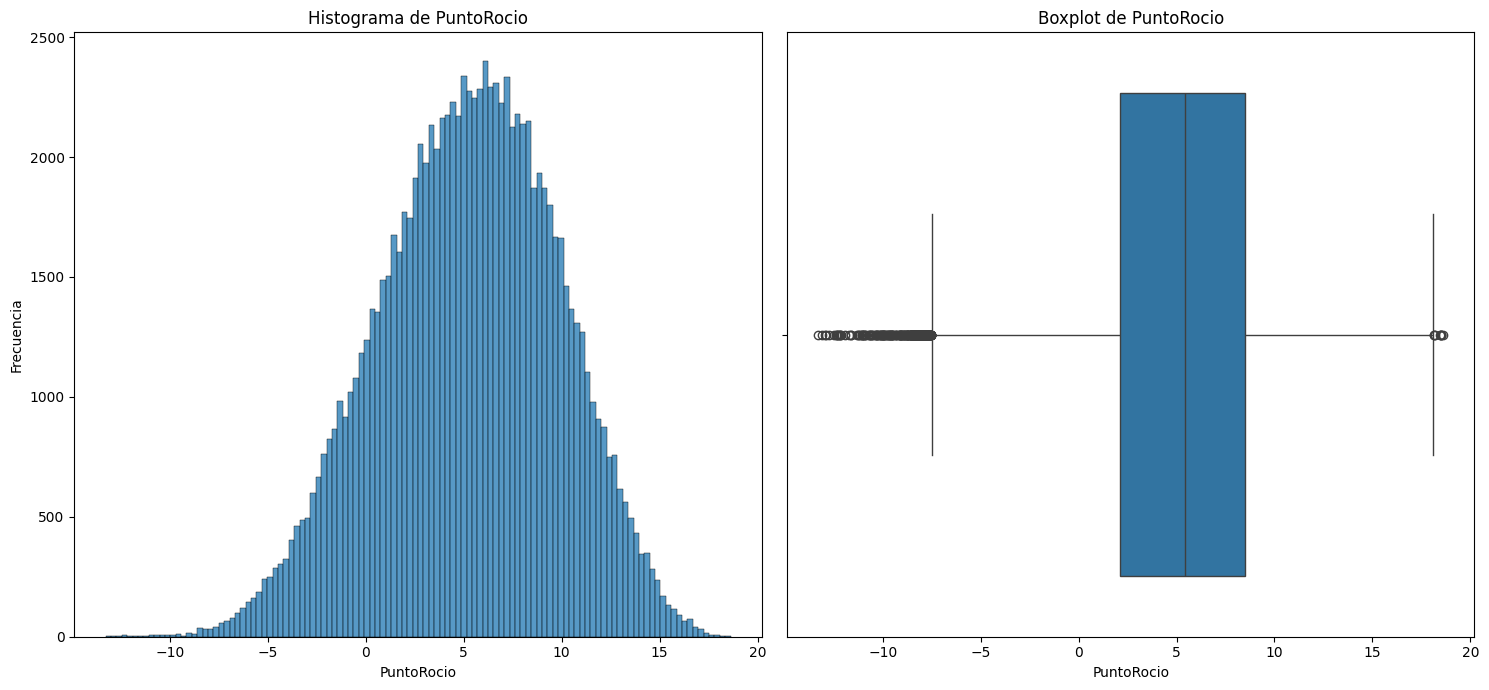

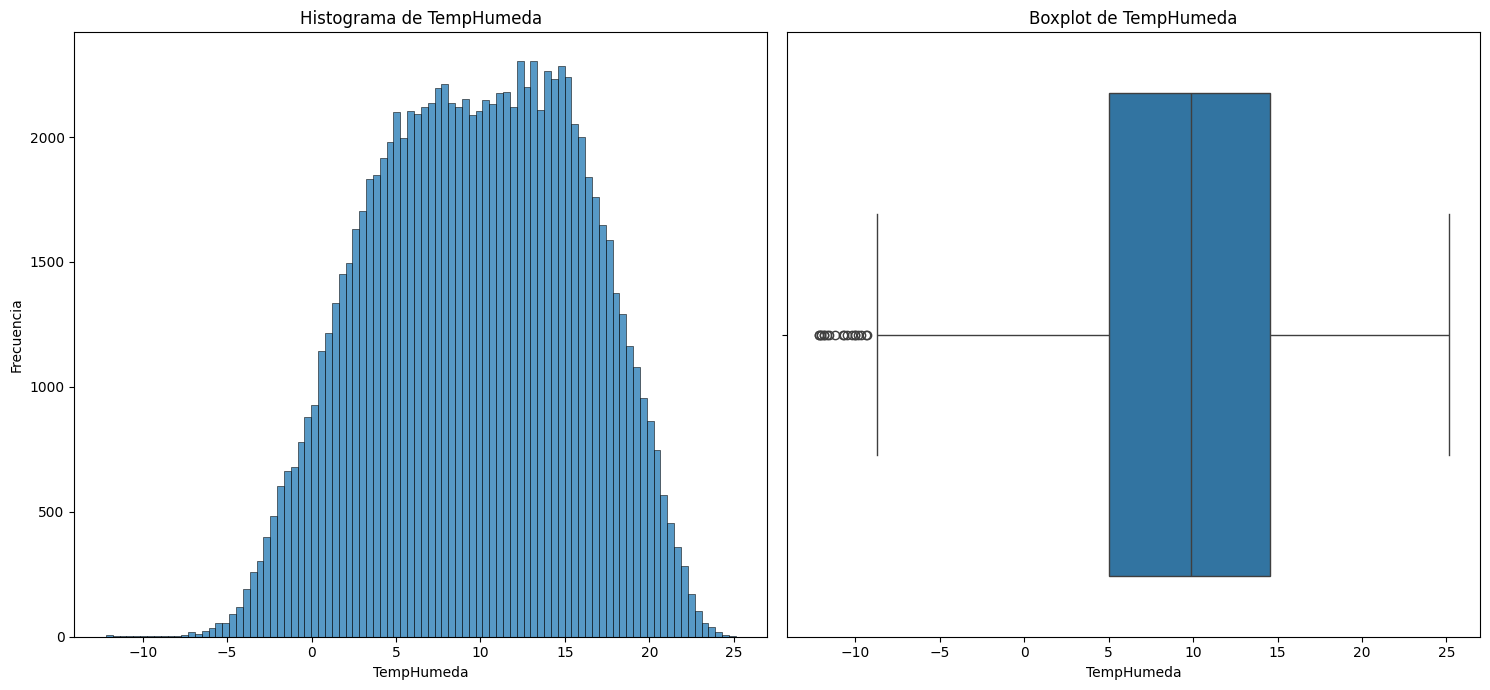

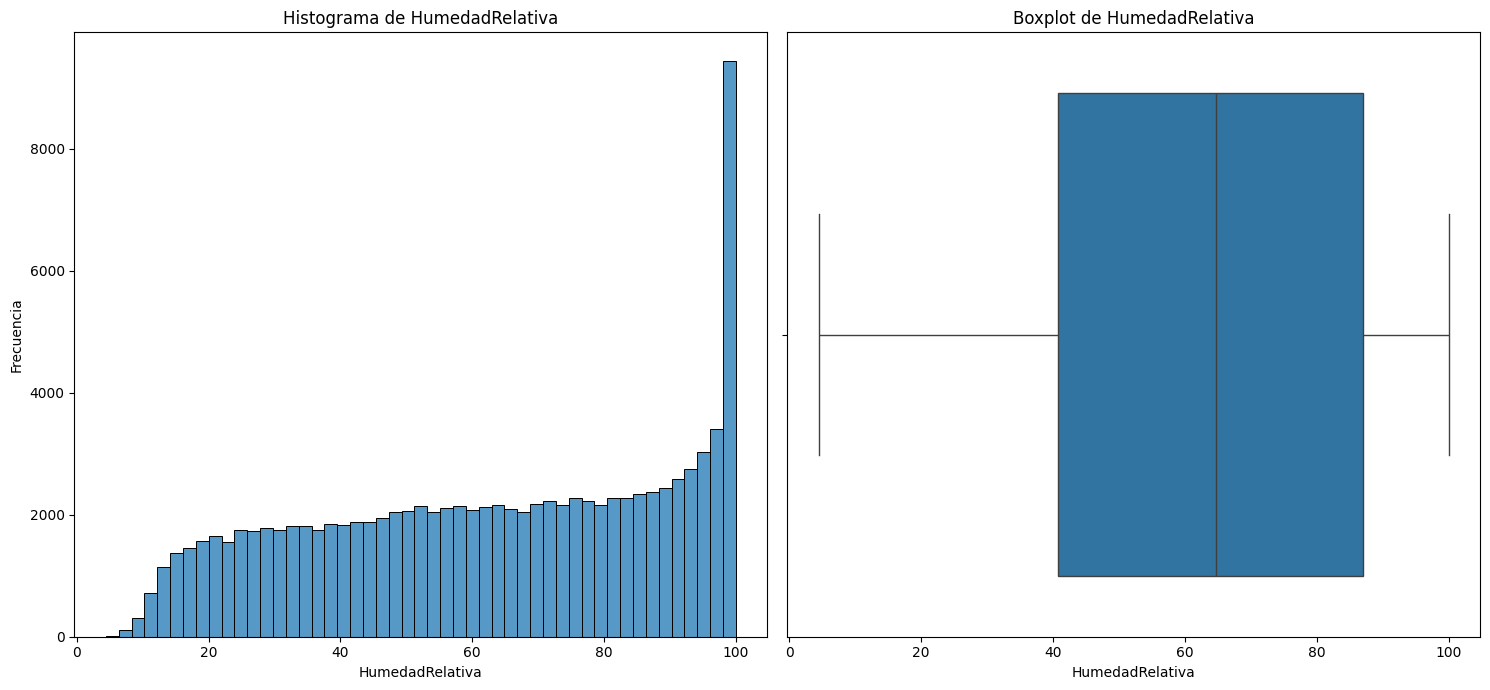

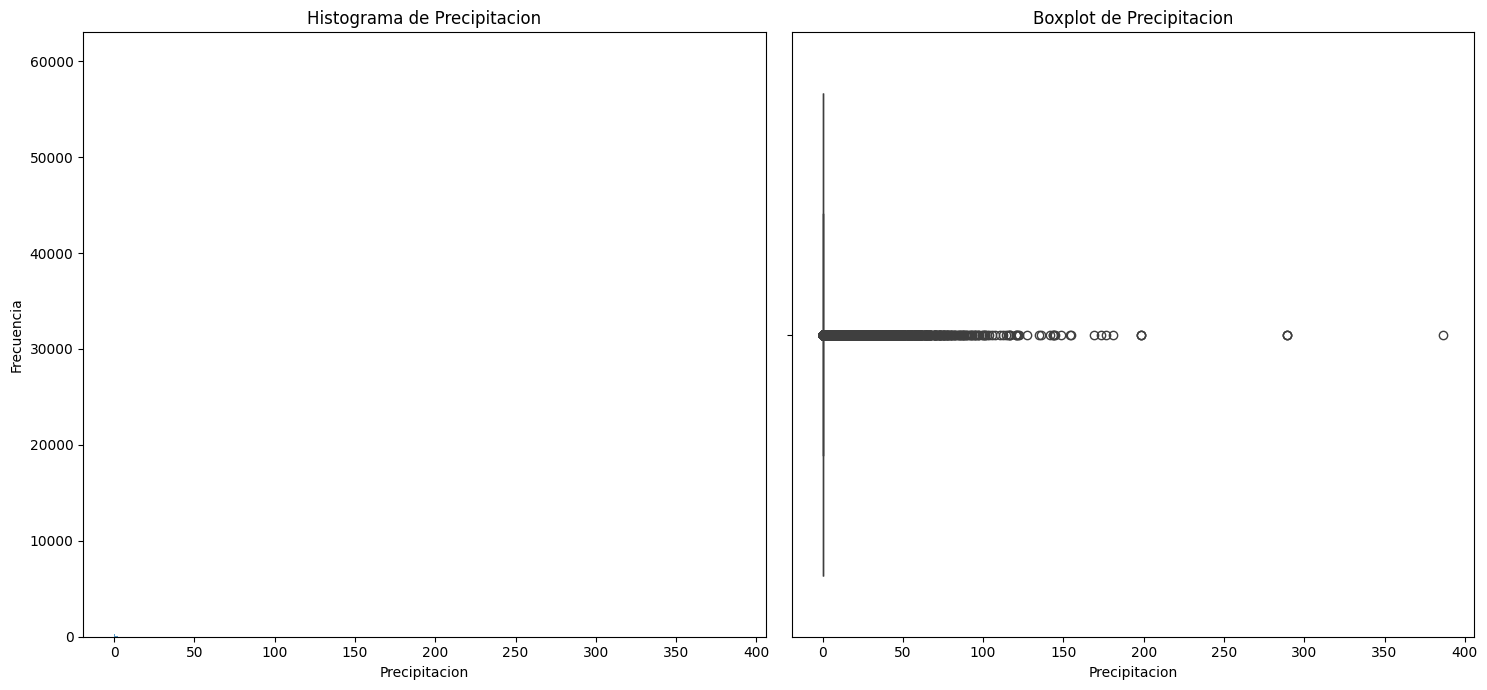

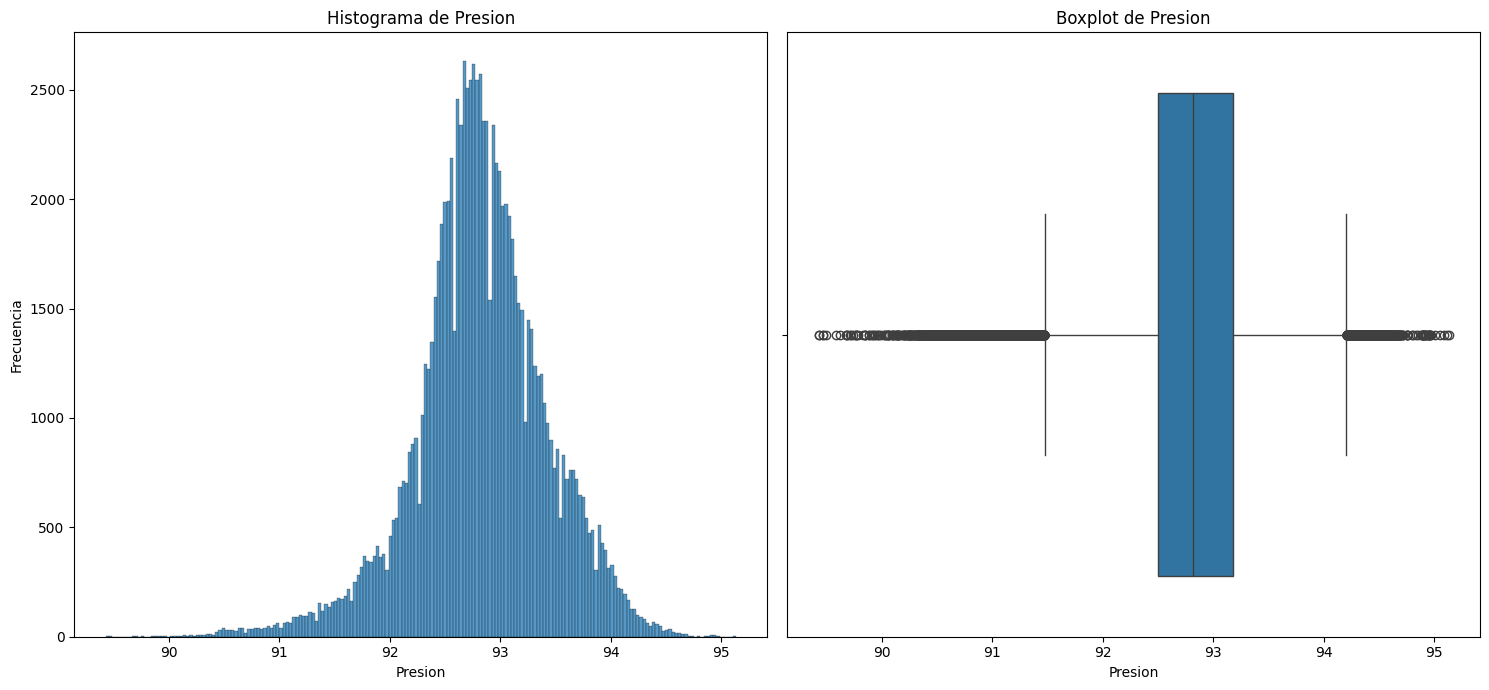

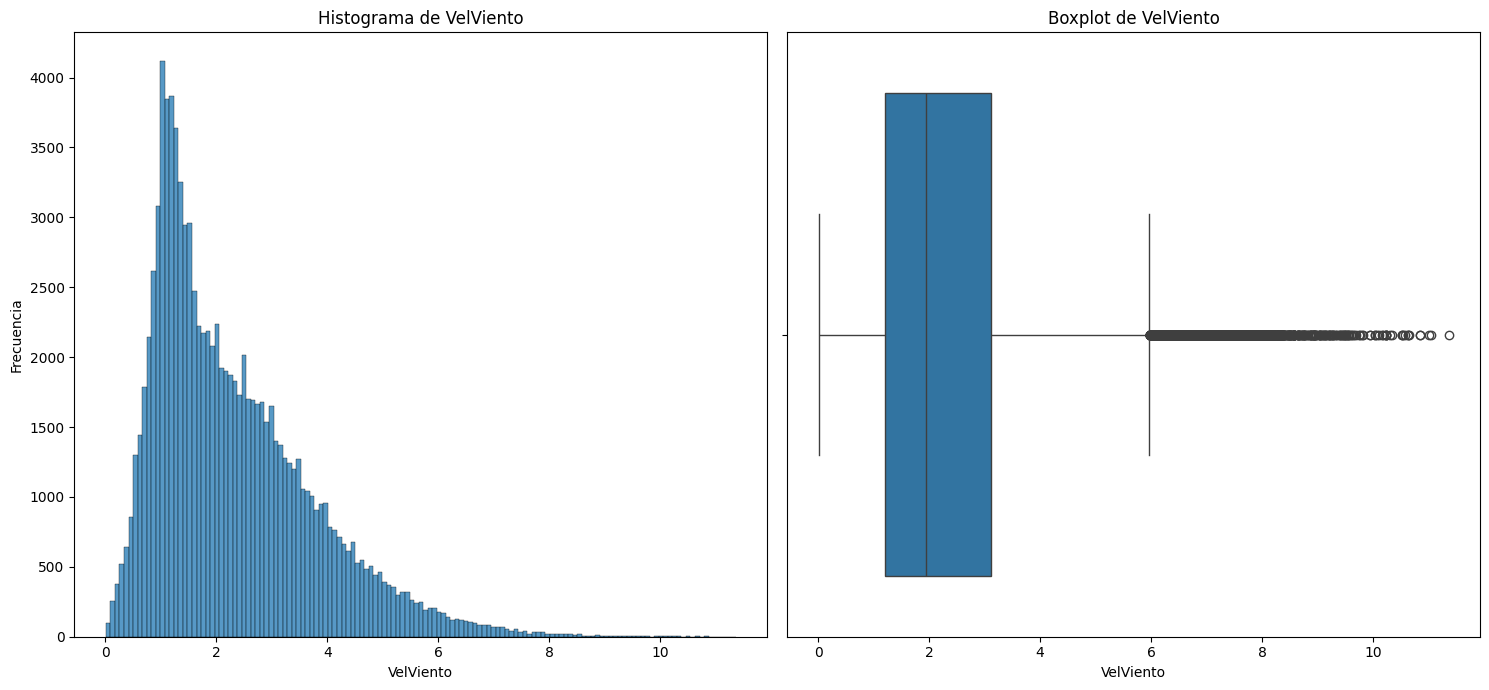

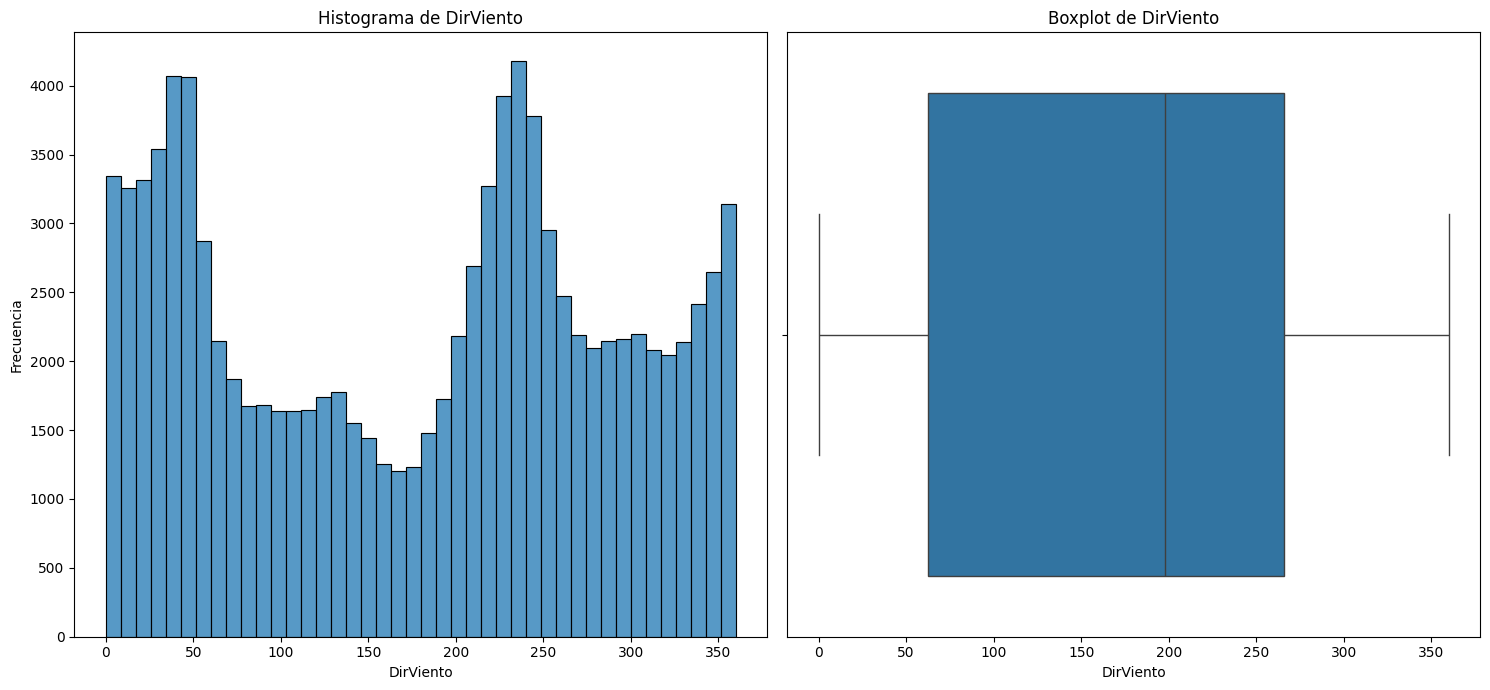

In [100]:
for column in col_clima:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7)) # Ajusta el tamaño vertical

    # Pasar solo el nombre de la columna al argumento 'x'
    sns.histplot(x=column, data=df[df.Estación == 4], ax=axes[0])
    axes[0].set_title(f'Histograma de {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frecuencia')

    sns.boxplot(x=column, data=df[df.Estación == 4], ax=axes[1])
    axes[1].set_title(f'Boxplot de {column}')
    axes[1].set_xlabel(column)

    plt.tight_layout()
    plt.show()

In [104]:
df[df.Estación==4]["Precipitacion"].max()

386.44

In [106]:
df[df.Estación==4]["Precipitacion"].mean()

1.2888325995557672

In [108]:
df[df.Estación==4]["Precipitacion"]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
100843    0.0
100844    0.0
100845    0.0
100846    0.0
100847    0.0
Name: Precipitacion, Length: 100848, dtype: float64

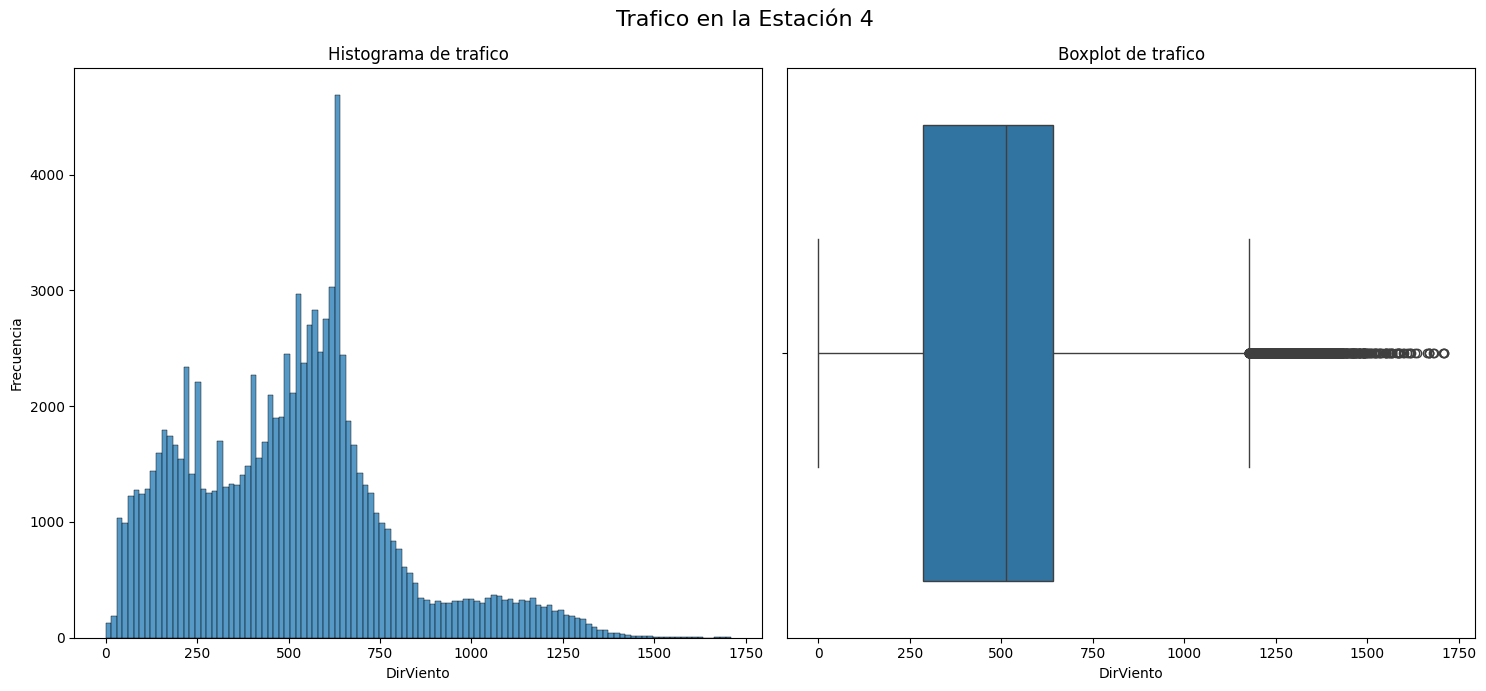

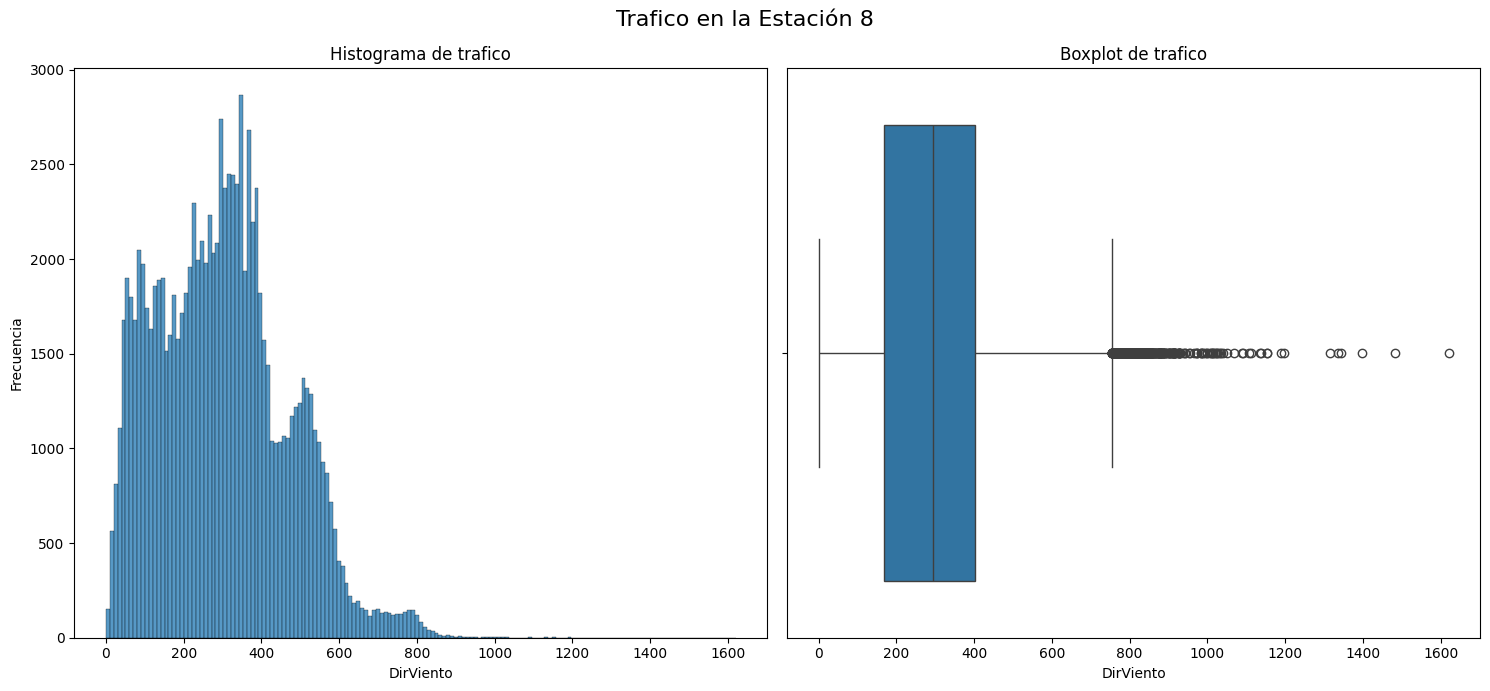

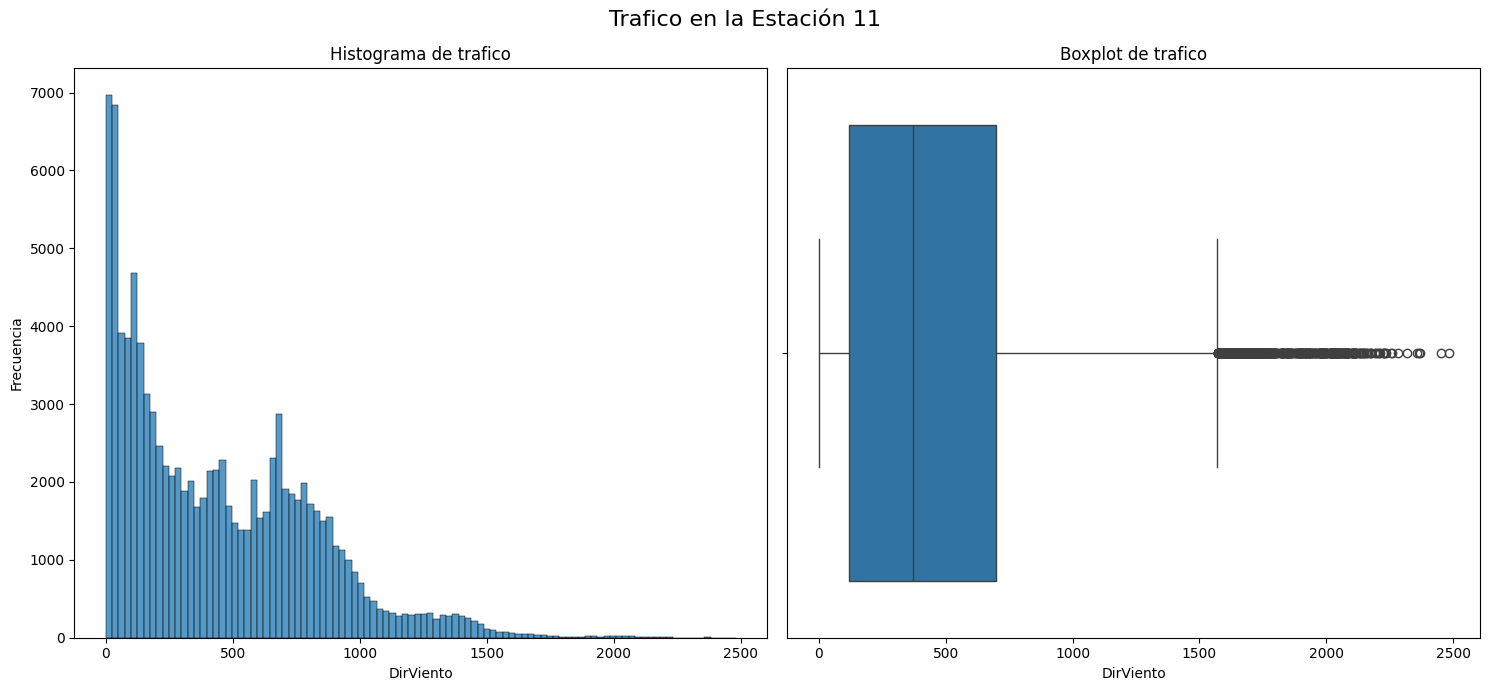

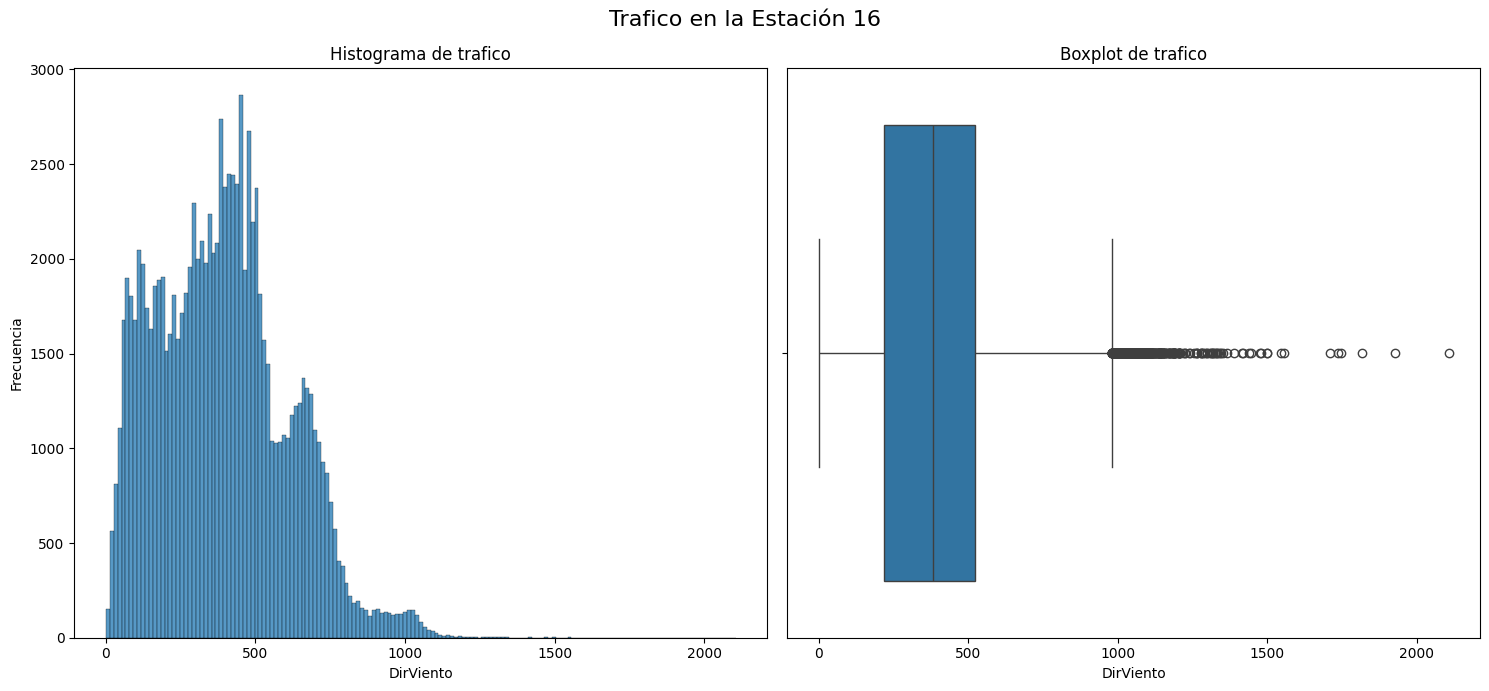

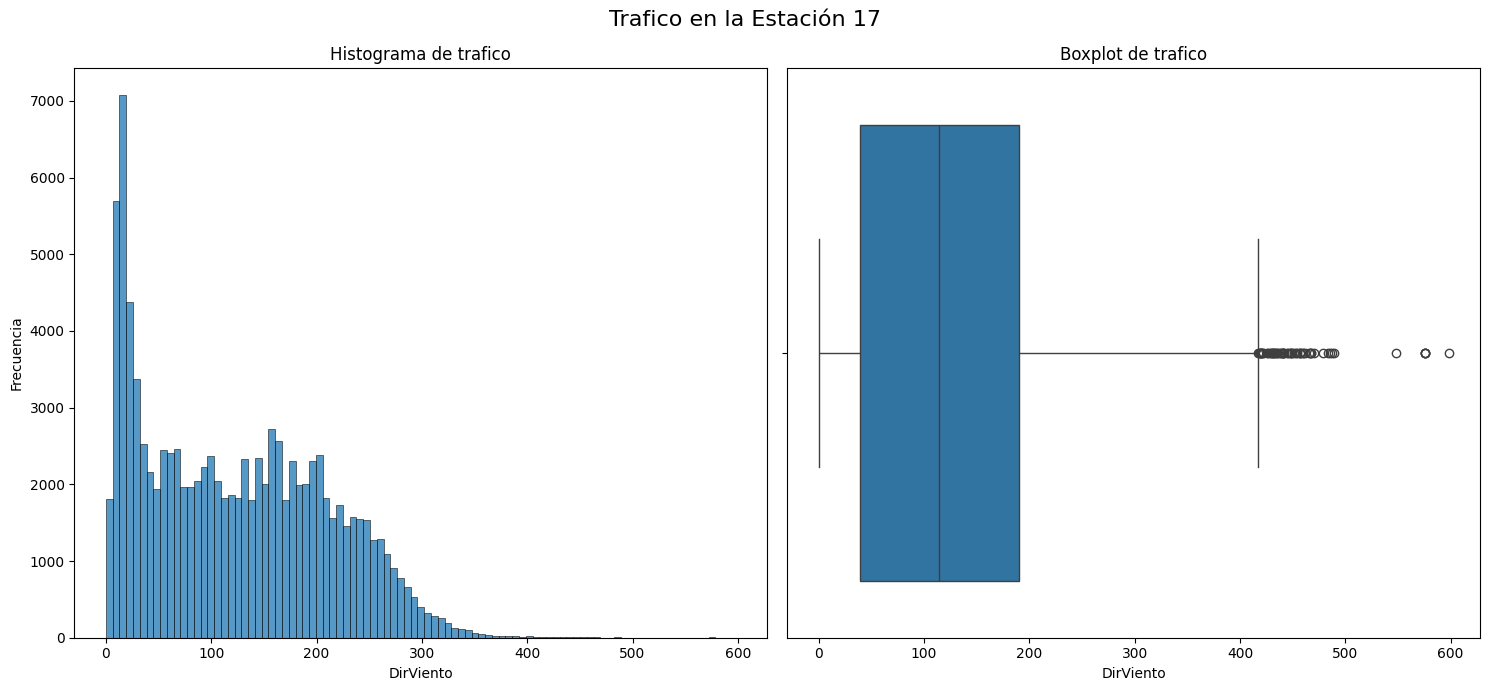

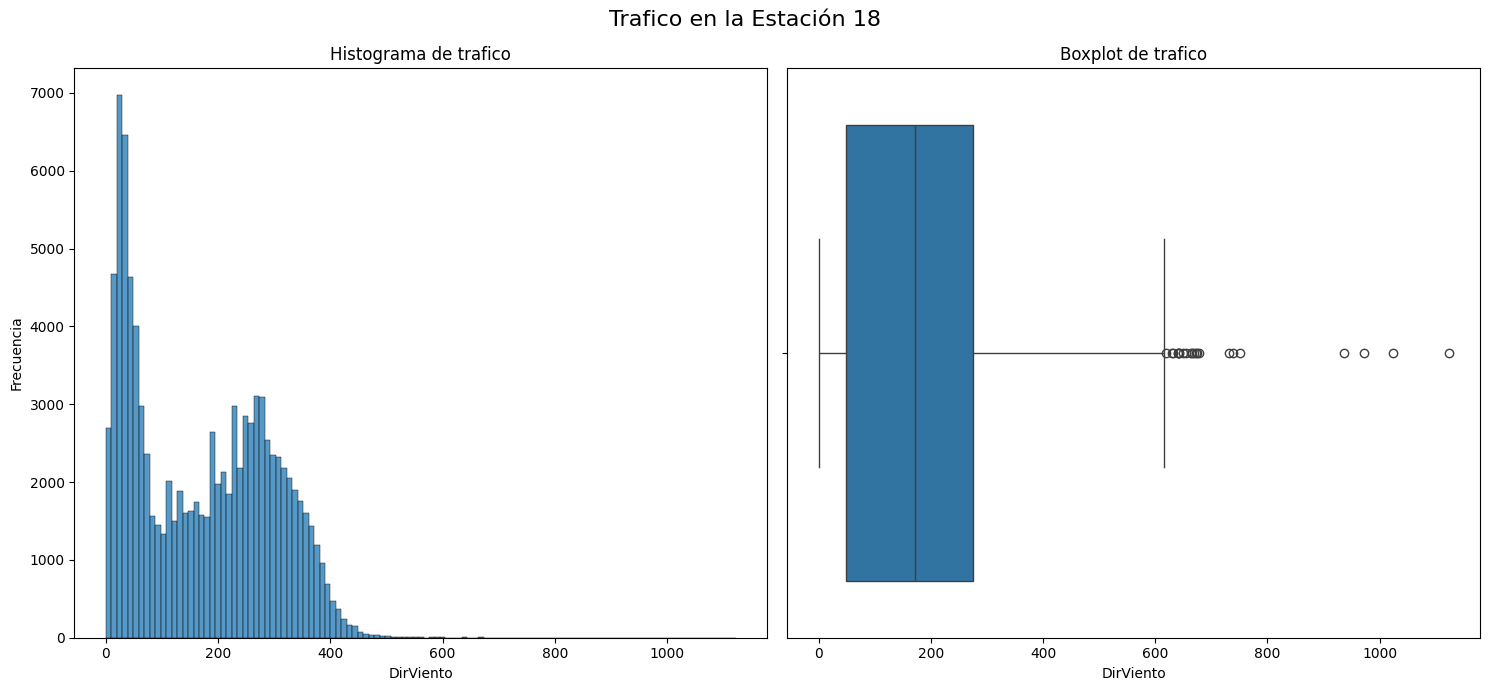

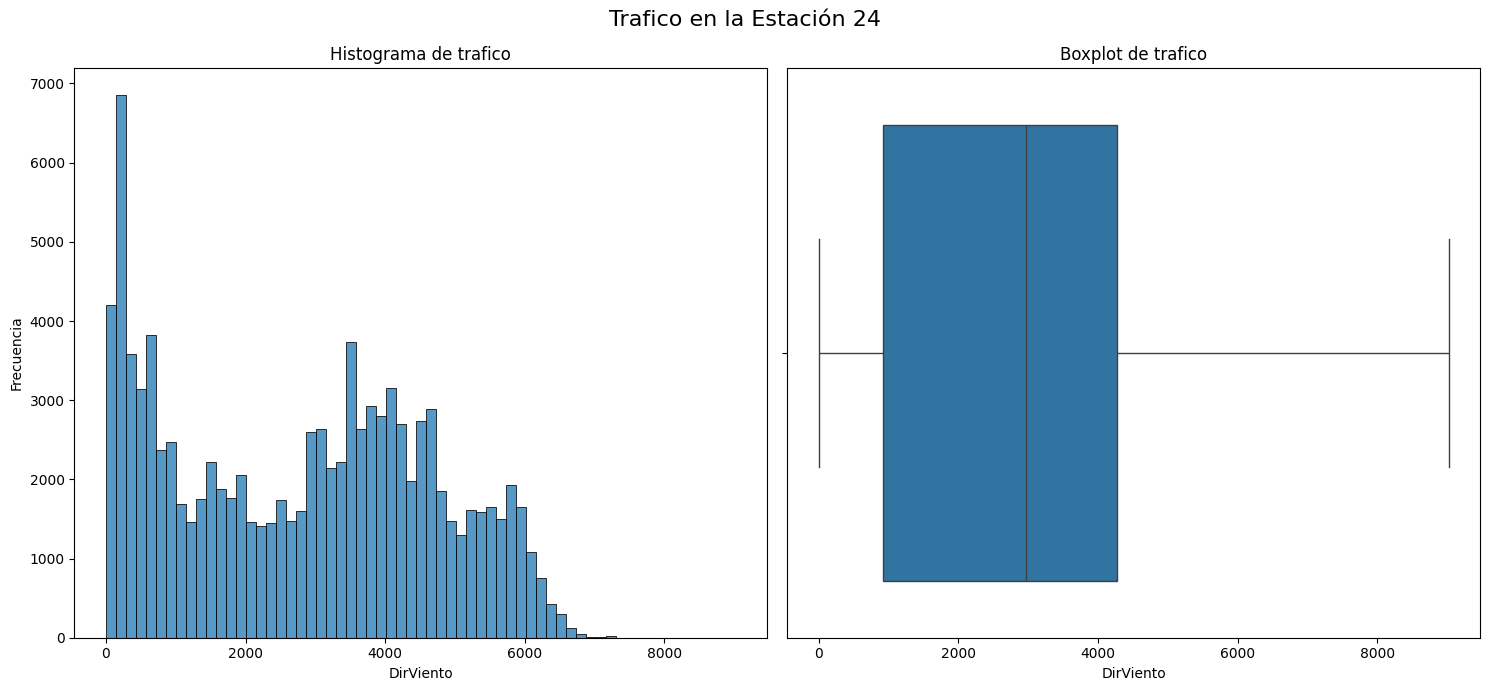

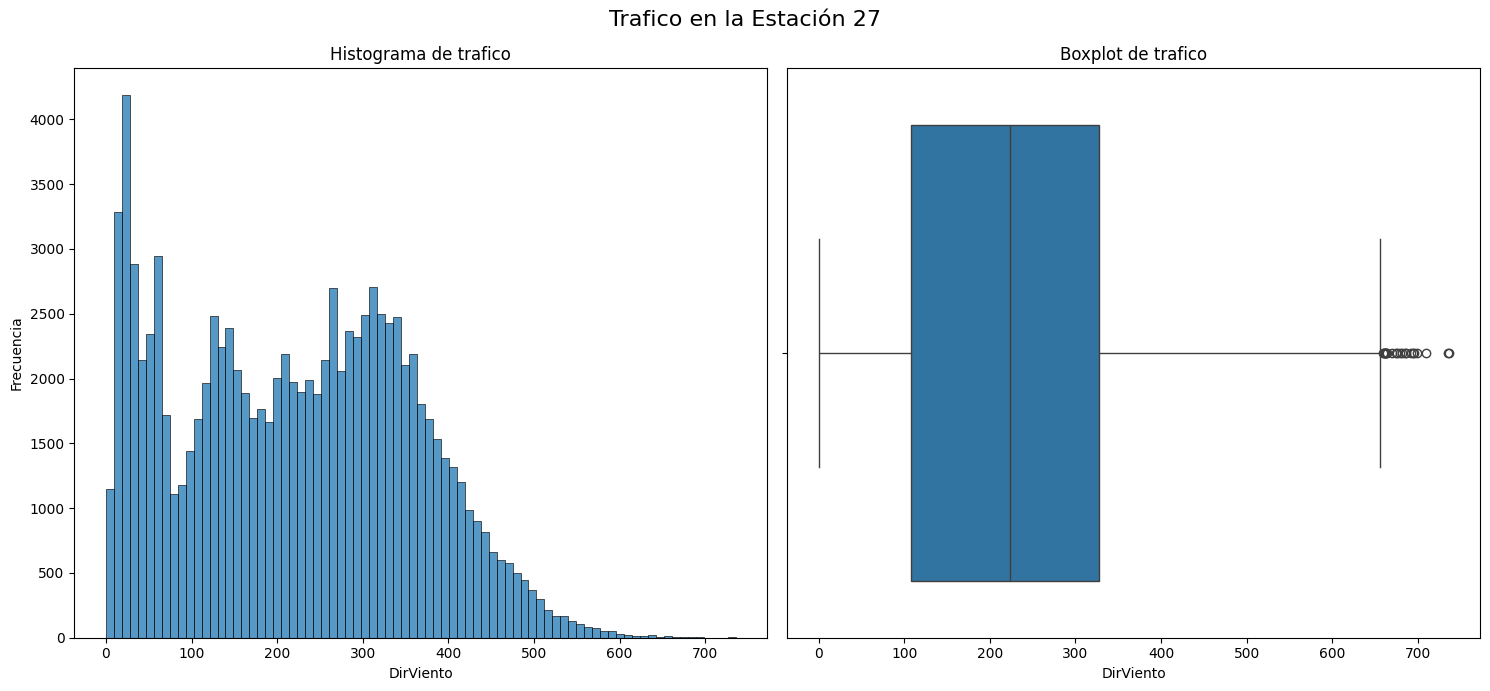

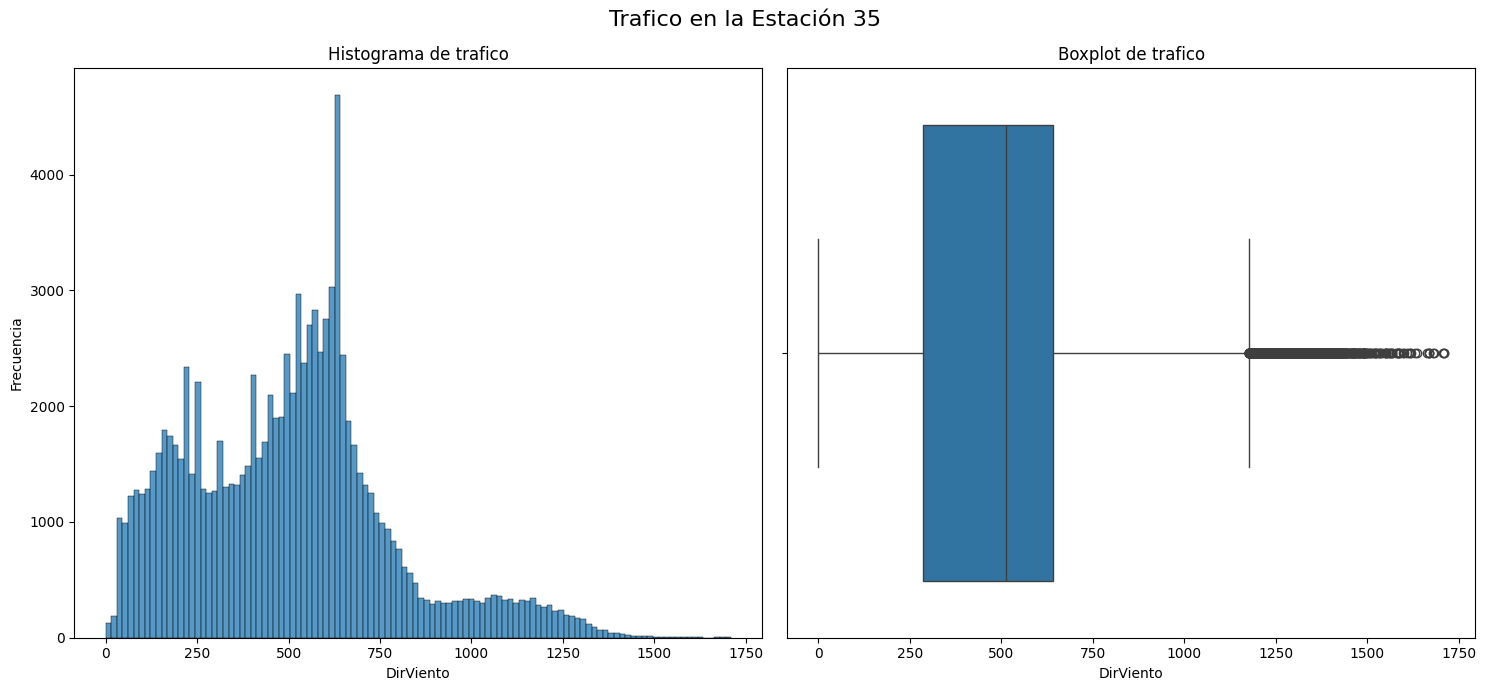

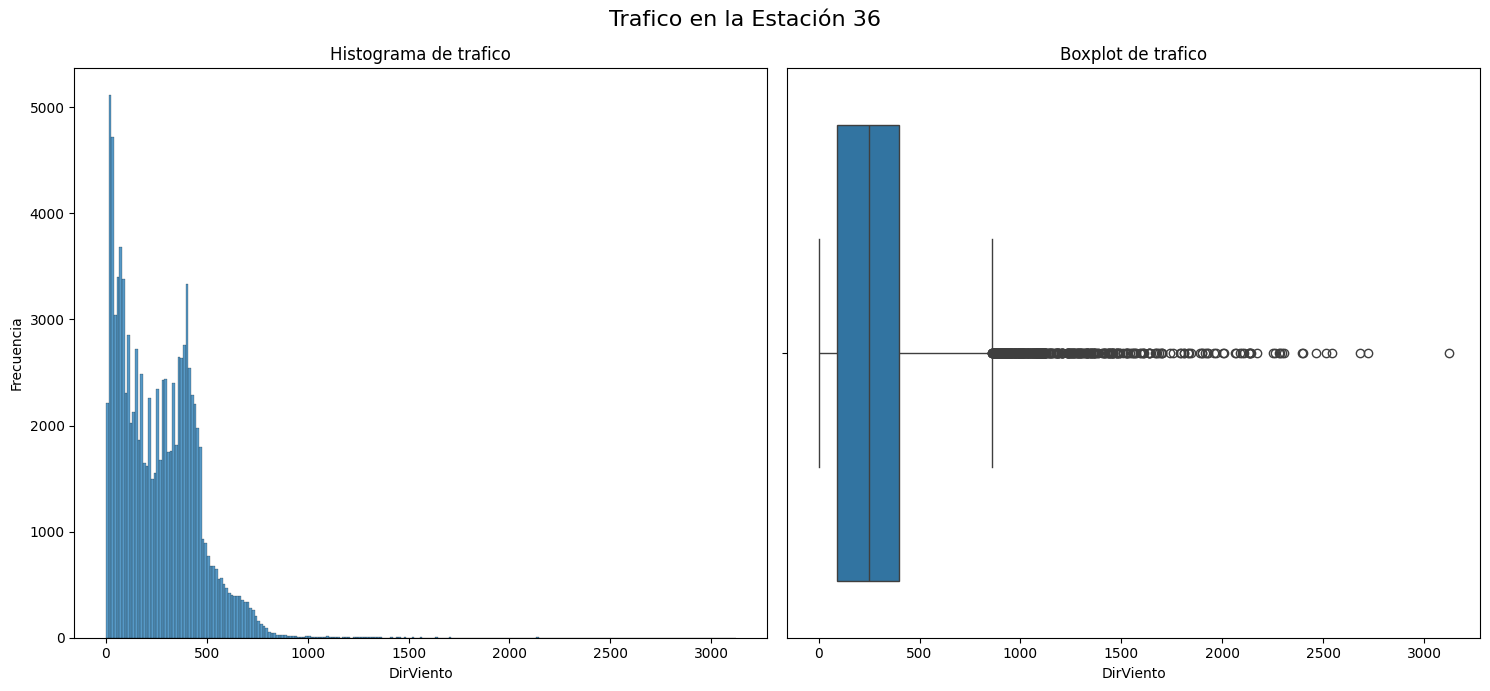

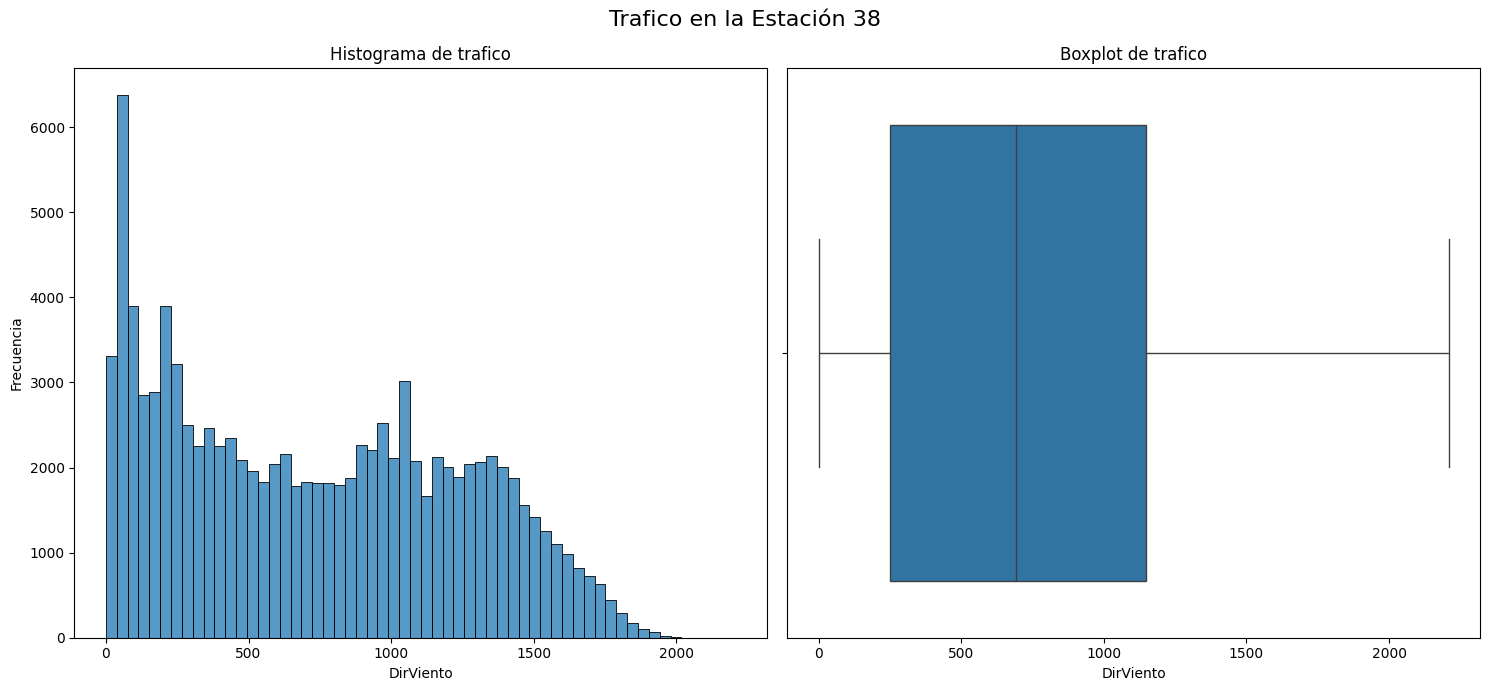

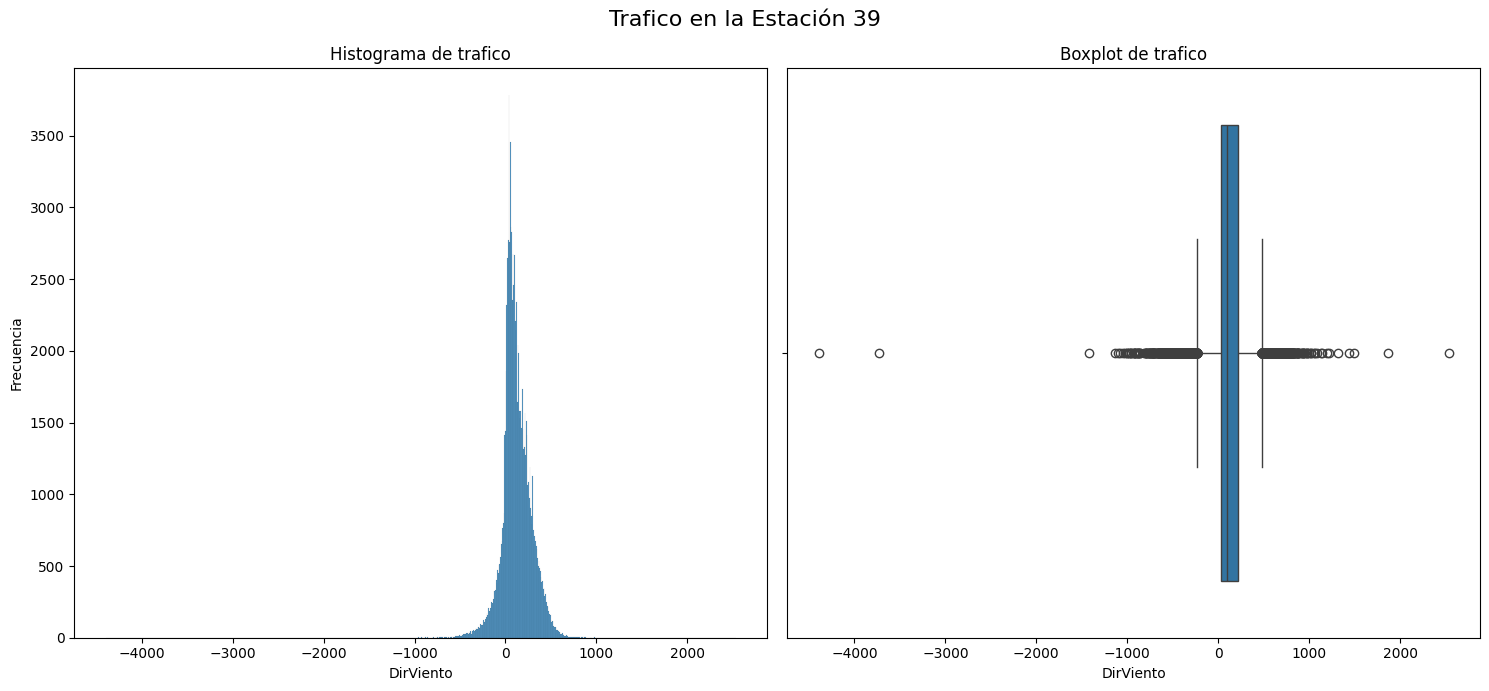

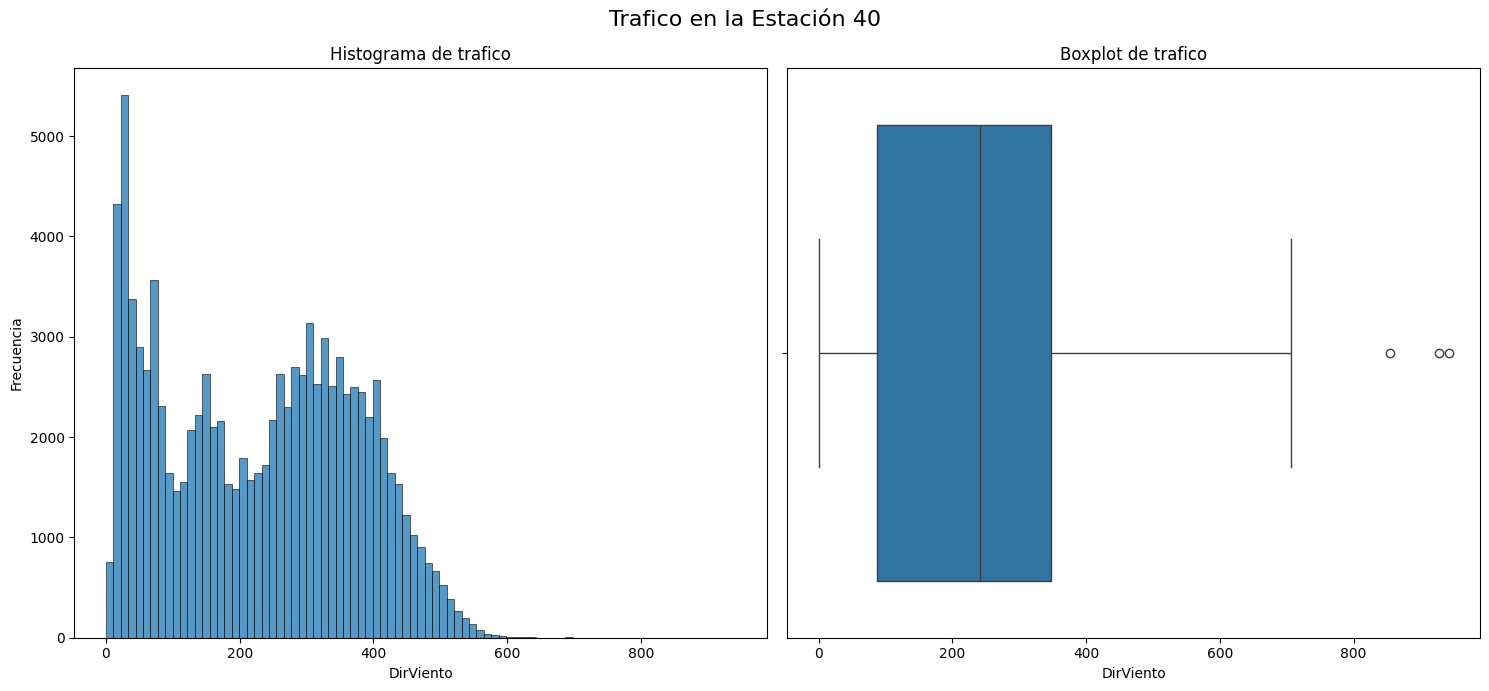

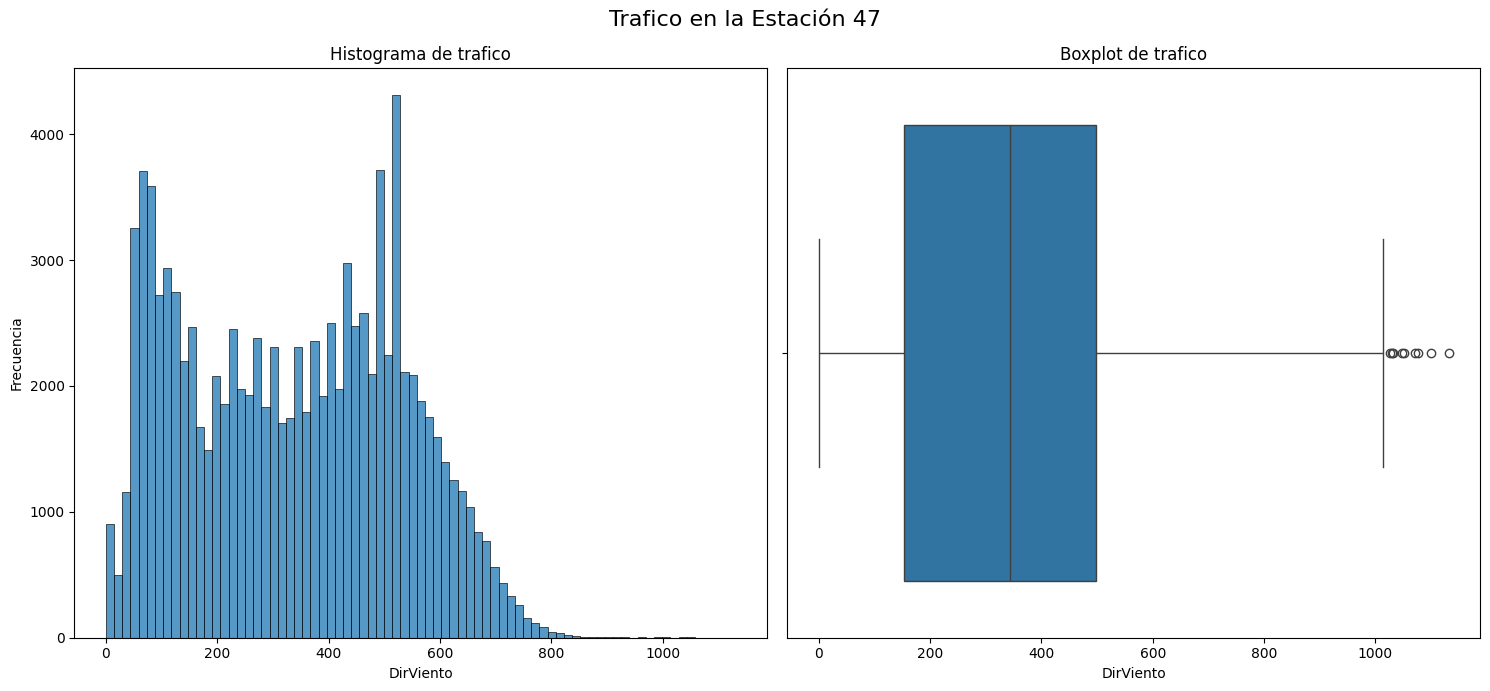

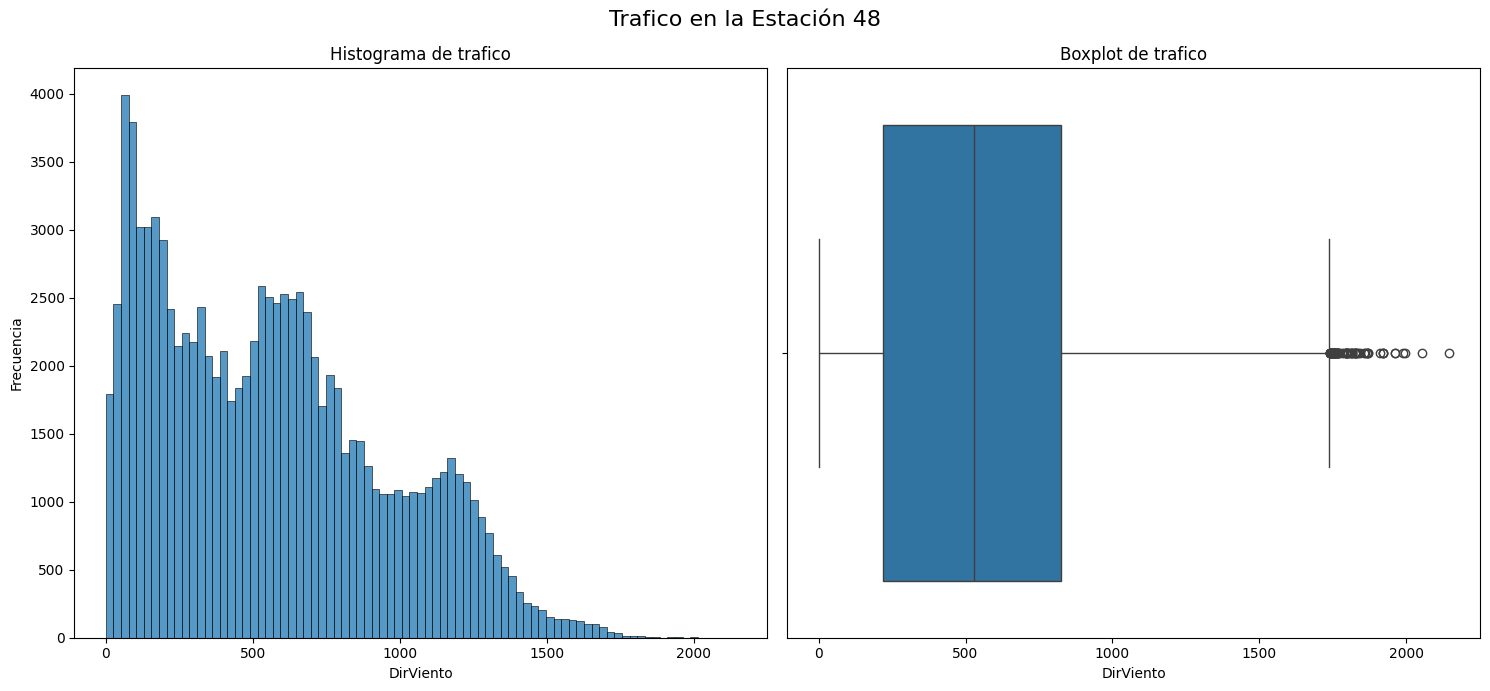

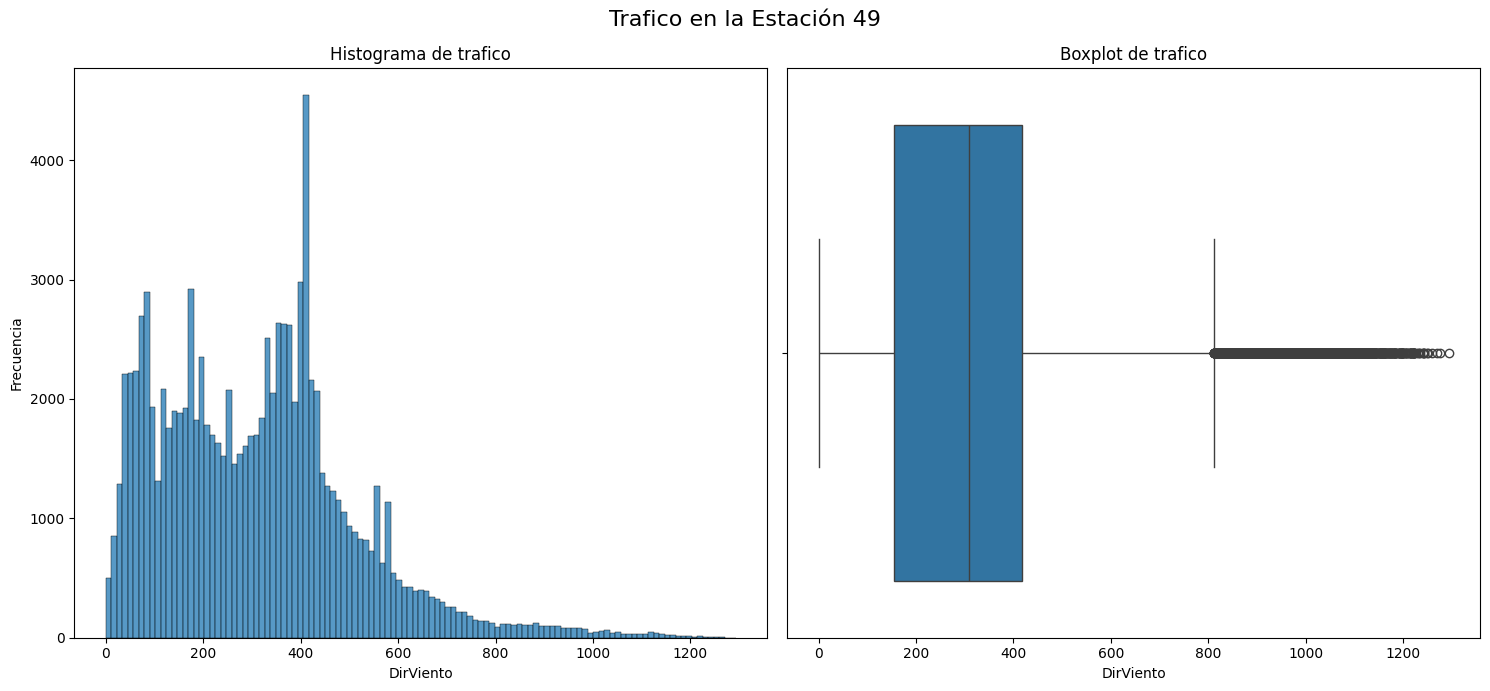

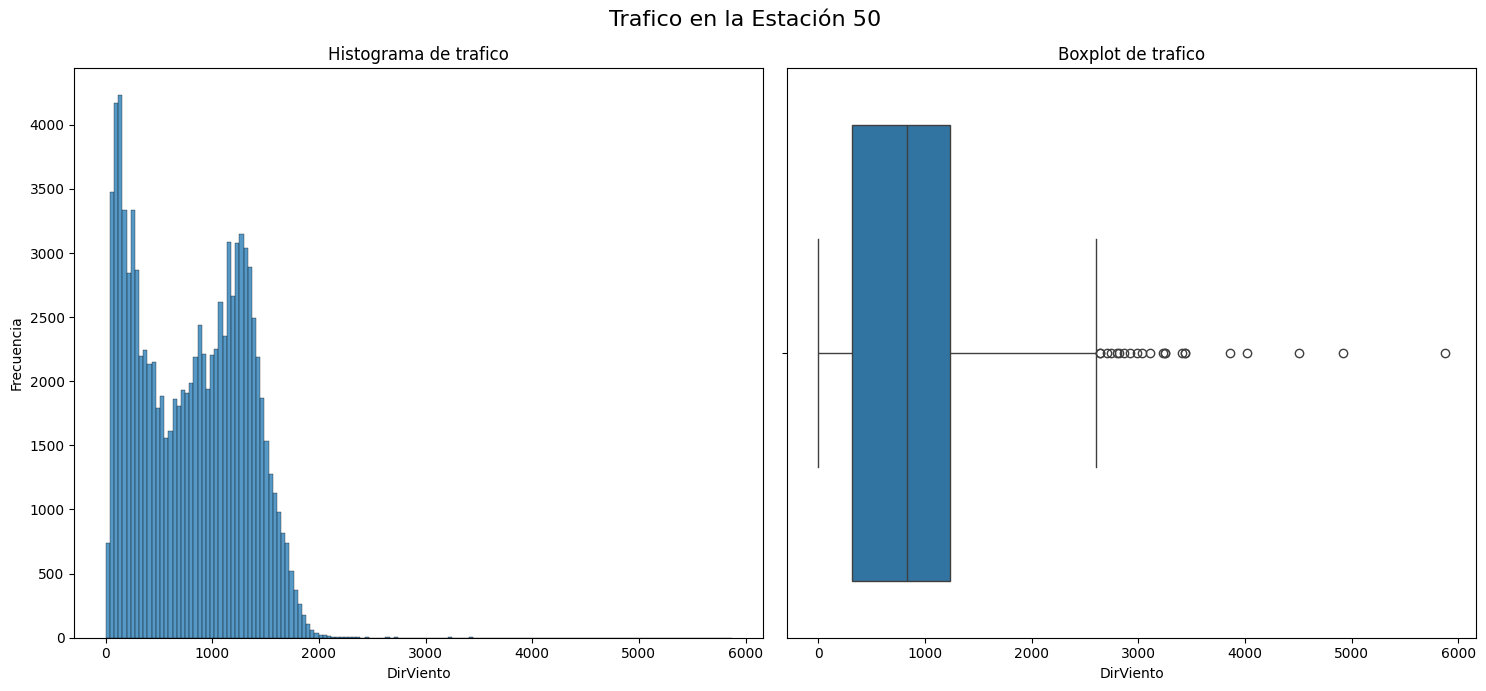

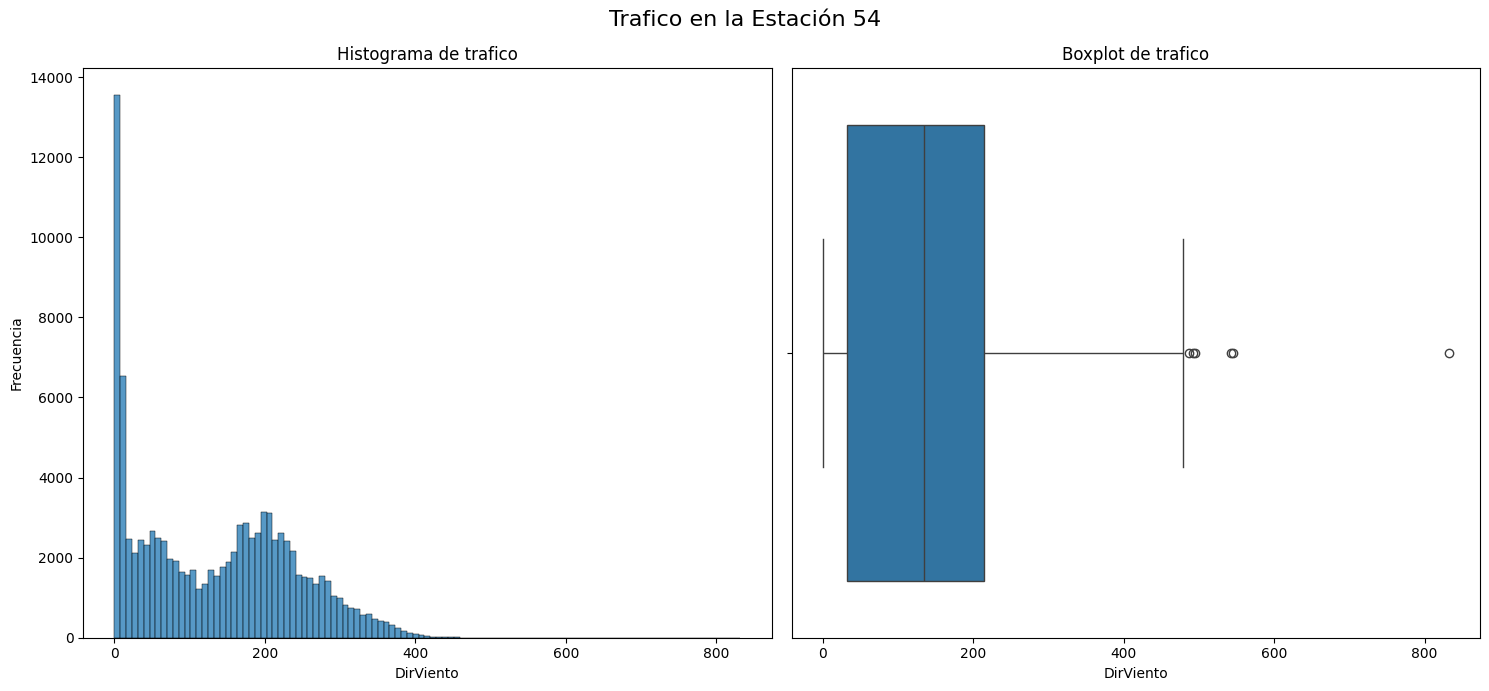

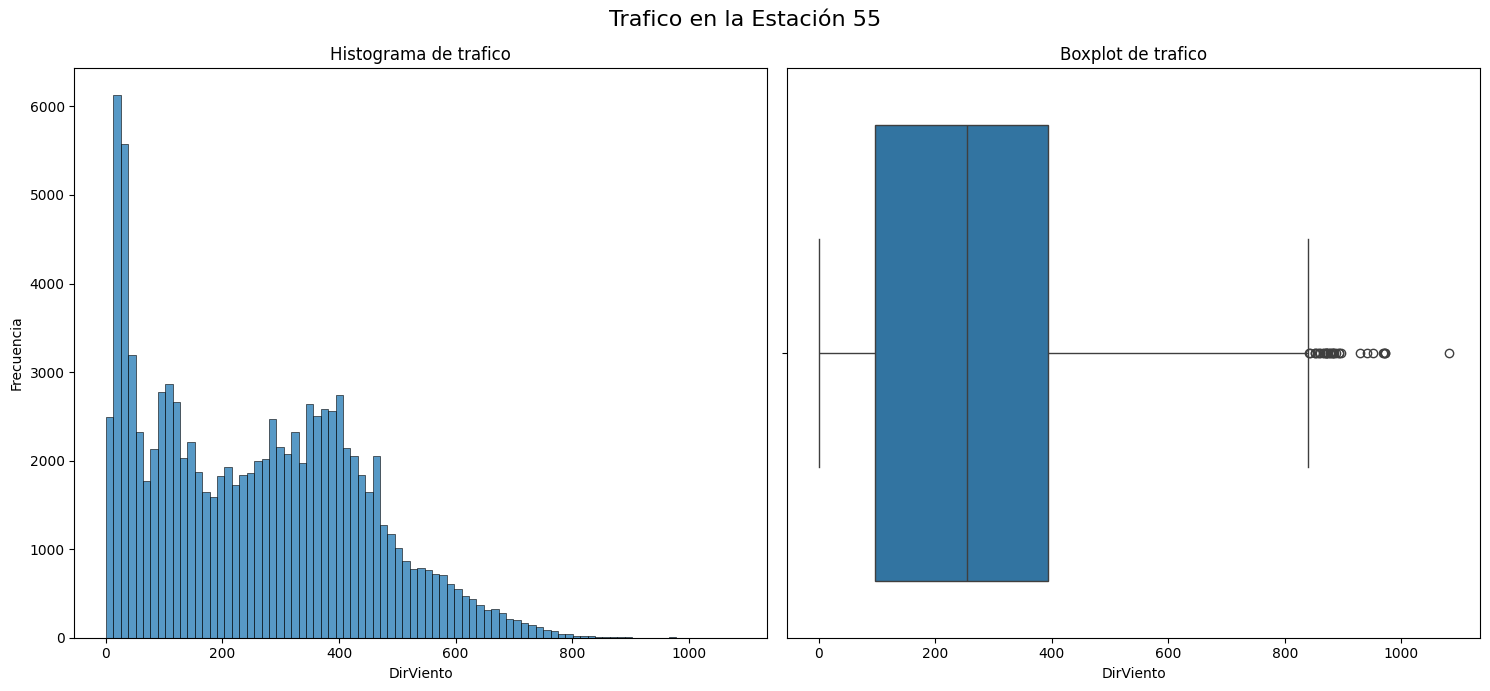

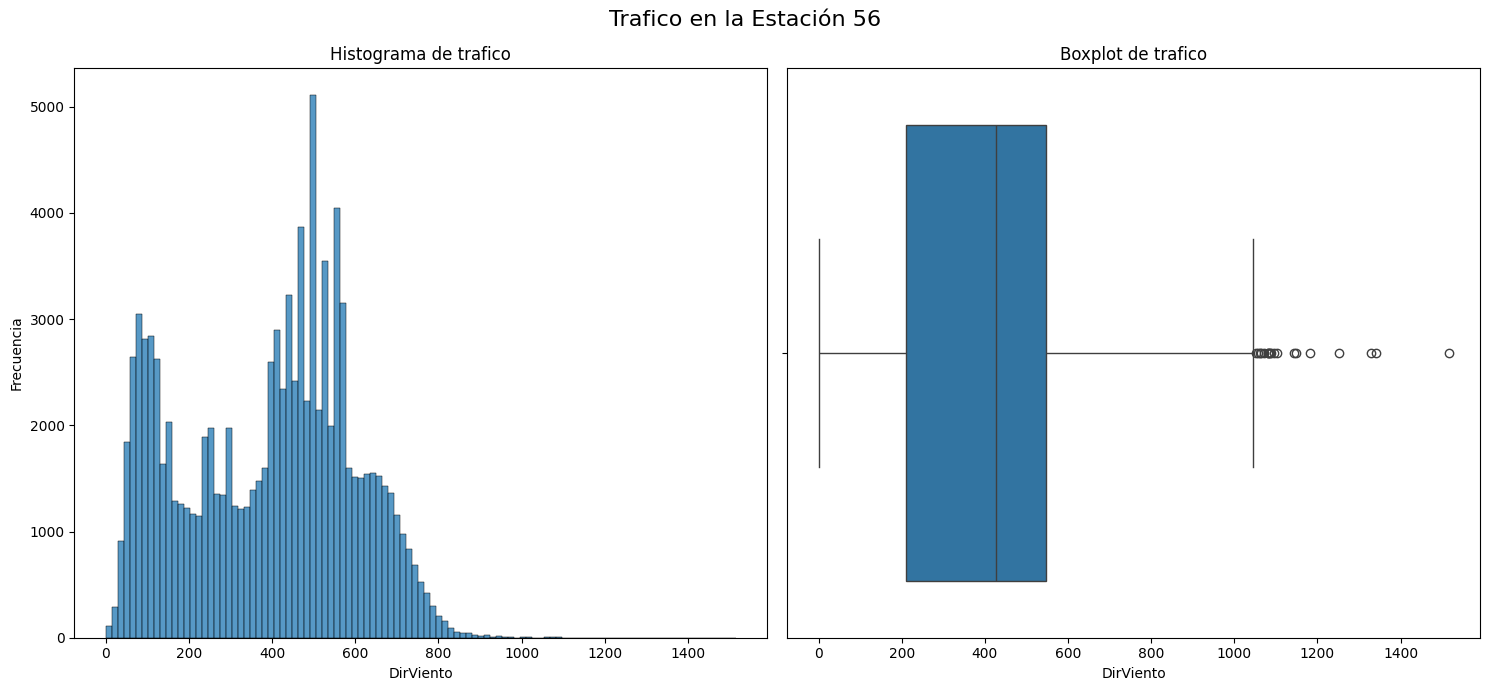

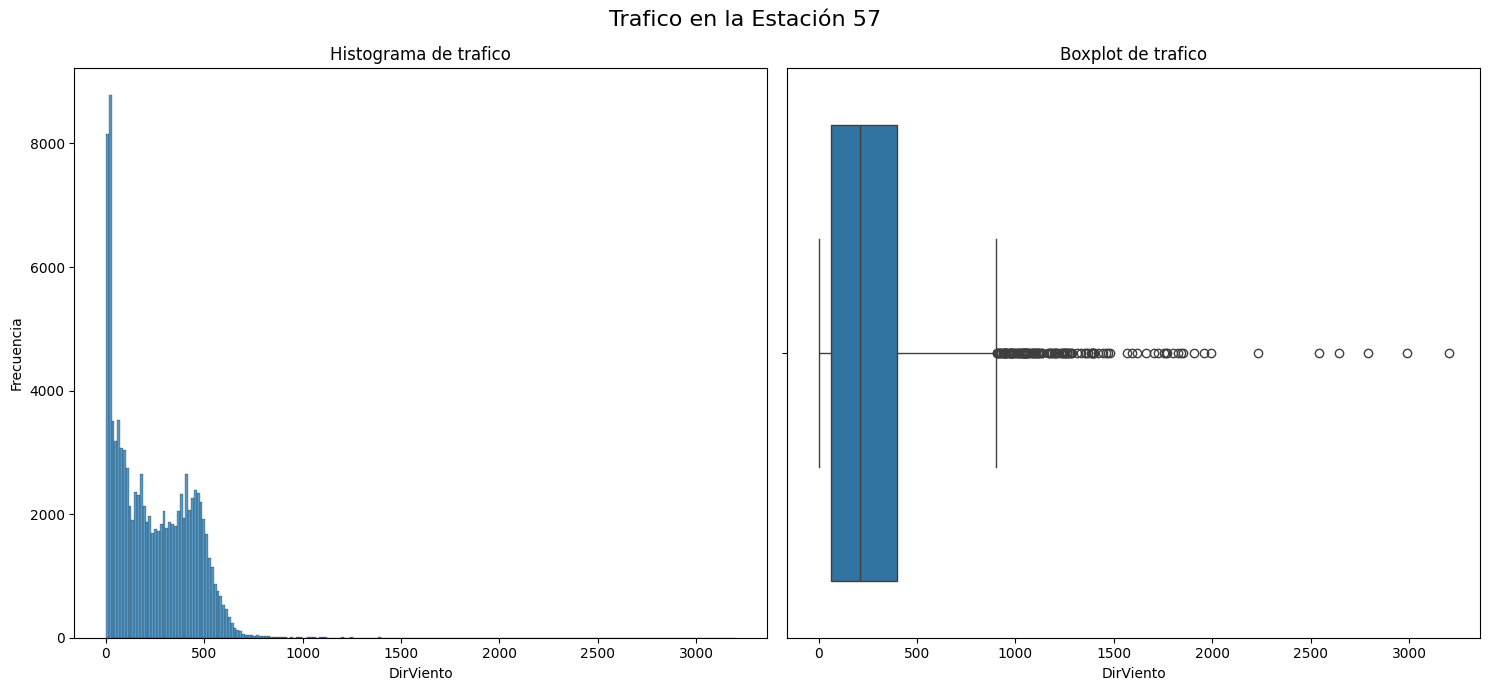

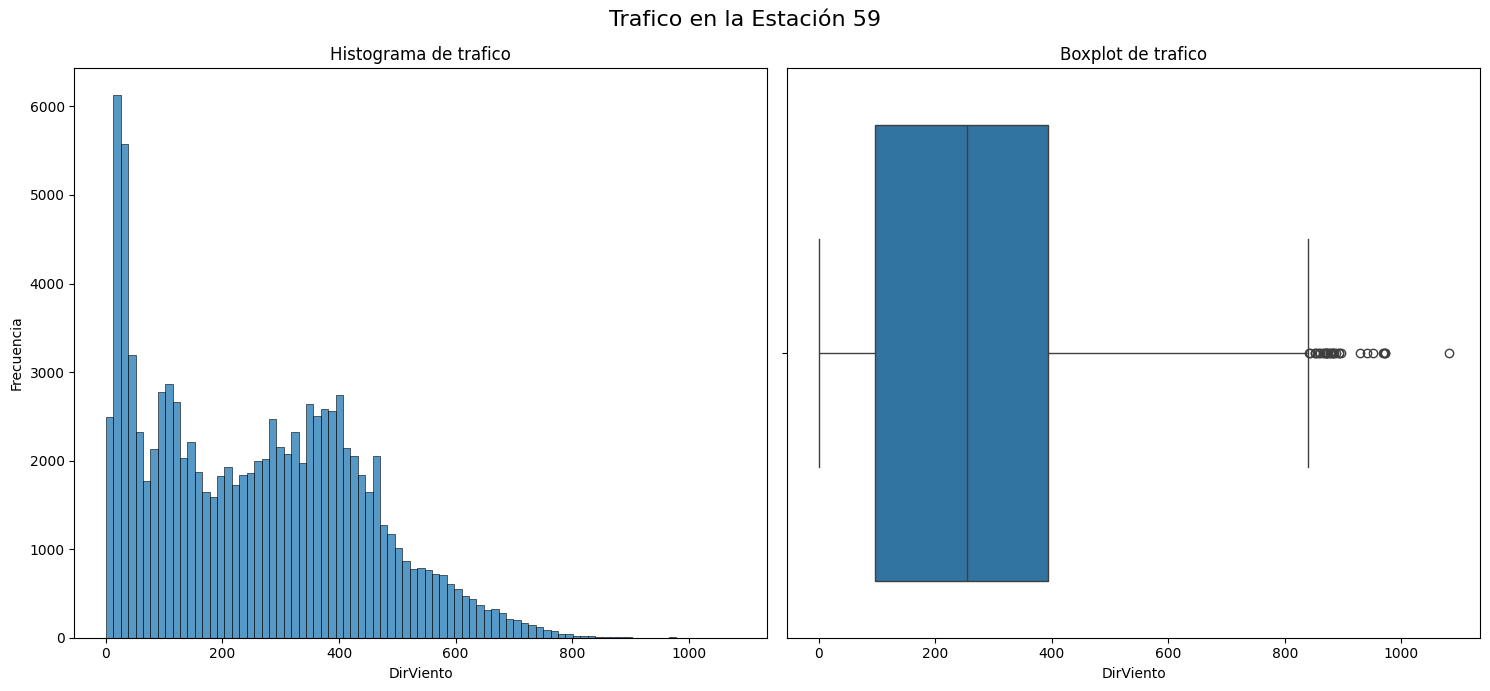

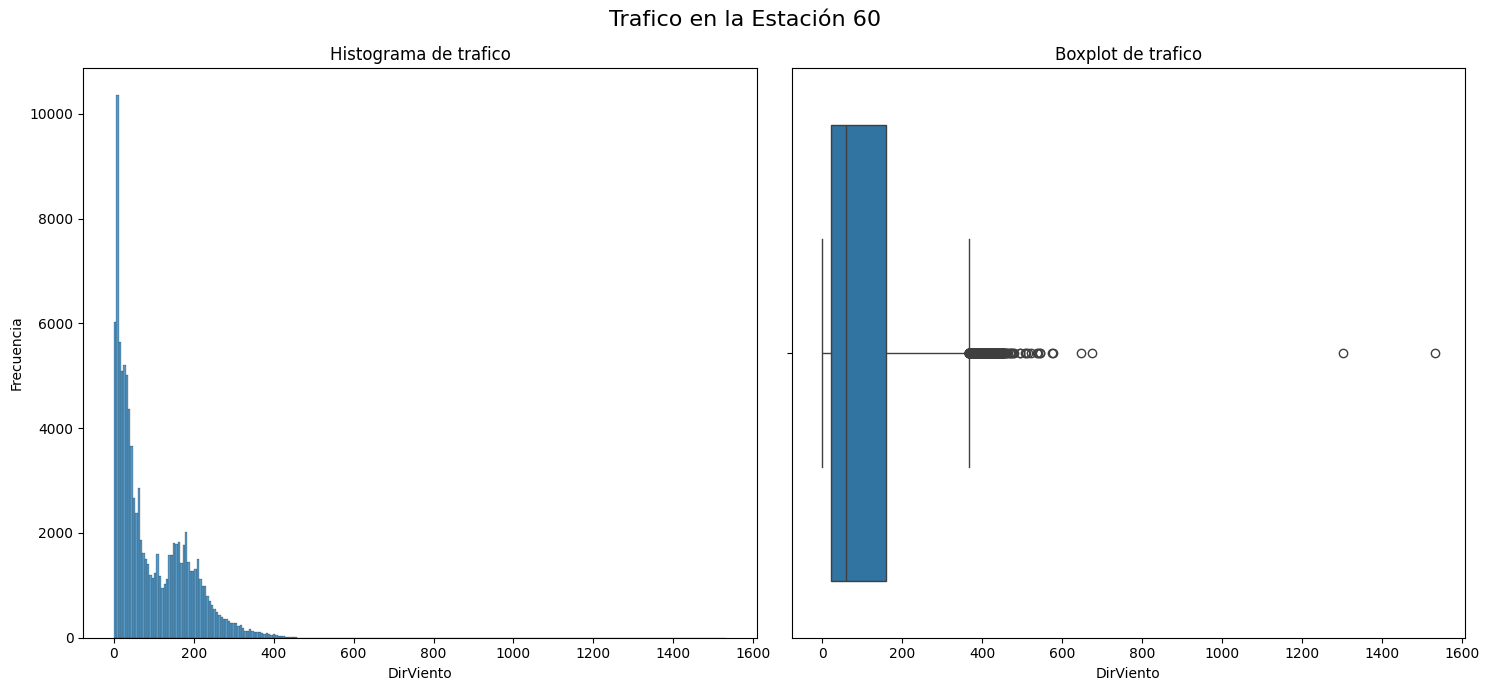

In [116]:
for estacion in df.Estación.unique():
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7)) 
    fig.suptitle(f'Trafico en la Estación {estacion}', fontsize=16)
    
    sns.histplot(x="Intensidad", data=df[df.Estación == estacion], ax=axes[0])
    axes[0].set_title(f'Histograma de trafico')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frecuencia')

    sns.boxplot(x="Intensidad", data=df[df.Estación == estacion], ax=axes[1])
    axes[1].set_title(f'Boxplot de trafico')
    axes[1].set_xlabel(column)

    plt.tight_layout()
    plt.show()